## Project Overview:
Pada era digital ini, perkembangan industri kuliner semakin pesat, khususnya di Indonesia, di mana kuliner menjadi bagian penting dari budaya dan kehidupan sehari-hari. Seiring bertambahnya variasi resep dan bahan, konsumen sering kali kesulitan menemukan resep yang sesuai dengan preferensi atau bahan yang mereka miliki (Dewi et al, 2022). Hal ini menimbulkan kebutuhan untuk menciptakan sistem rekomendasi resep yang dapat memberikan saran yang relevan dan sesuai dengan kebutuhan pengguna.

**Sistem Rekomendasi Bahan-Bahan Untuk Resep Makanan** ini dibangun menggunakan pendekatan Content-Based Filtering yang memanfaatkan informasi dari resep-resep sebelumnya untuk menyesuaikan preferensi pengguna. Selain itu, dengan kombinasi pendekatan Collaborative Filtering, sistem ini dapat menghasilkan rekomendasi hybrid yang memperhitungkan opini pengguna lain yang memiliki preferensi serupa melalui review dari setiap resep. Kombinasi ini bertujuan untuk memberikan rekomendasi yang tidak hanya relevan secara konten, tetapi juga sesuai dengan preferensi kolektif dari pengguna.

Sistem ini memiliki potensi besar dalam mempermudah pengguna dalam menembahan-bahan ukan resep yang diinginkan dengan mempertimbangkan beberapa opsi filter, seperti kategori masakan, bahan-bahan yang tersedia, atau masakan populer. Proyek ini tidak hanya penting untuk memberikan kemudahan bagi pengguna, tetapi juga membuka peluang inovasi dalam pengembangan aplikasi kuliner di Indonesia.

#### References:
Dewi, I. C., Indrianto, A. T. L., Soediro, M., Winarno, P. S., Minantyo, H., Sondak, M. R., ... & Leoparjo, F. (2022). Trend Bisnis Food and Beverages Menuju 2030.

## Business Understanding:
Dalam membangun sistem rekomendasi ini, penting untuk memahami tantangan dan peluang yang dapat dihadapi. Bagian ini mendefinisikan masalah utama, tujuan, dan pendekatan solusi yang digunakan.

#### Problem Statements
1. Bagaimana sistem dapat memberikan rekomendasi resep yang relevan berdasarkan bahan-bahan yang tersedia, kategori masakan, atau preferensi pengguna lainnya?
2. Bagaimana meningkatkan akurasi rekomendasi dengan memanfaatkan pendapat dan preferensi pengguna lain?

#### Goals
1. Mengembangkan sistem rekomendasi yang bahan-bahan untuk dapat menyarankan resep yang sesuai berdasarkan bahan yang ada, kategori tertentu, atau preferensi pribadi.
2. Menggabungkan pendekatan Content-Based dan Collaborative Filtering untuk meningkatkan kualitas rekomendasi dengan mempertimbangkan preferensi kolektif pengguna.

#### Pendekatan Solusi
1. Content-Based Filtering: Pendekatan ini digunakan untuk merekomendasikan resep berdasarkan karakteristik resep yang serupa dengan resep yang disukai oleh pengguna. 
2. Collaborative Filtering: Dengan memperhitungkan preferensi pengguna lain yang memiliki kesamaan, sistem akan memberikan rekomendasi berdasarkan kecenderungan pengguna kolektif.

install package yang diperlukan

In [2]:
!pip install pyforest
!pip install collection

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15900 sha256=af773f52b6673d22ecc1a1fd0c66efd83fa94ed5ed760f4d58726a4ee2d84547
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest
  Preparing metadata (setup.py) ... done
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5099 sha256=5dd9e5dd759396bacce825ebeaffa1005b9c017af16748a2a47a810eab172f59
  Stored in directory: /root/.cache/pip/wheels/a5/70/eb/1d28795e9384ab3b9be6359bdde9e1652f6e7dab9d26844f70
Successfully built collection


sekarang panggil library/package yang akan digunakan

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from collections.abc import Iterable
from pyforest import *
import re # regex
import warnings
warnings.filterwarnings("ignore")

Memanggil data

In [4]:
resep =  pd.read_csv('/kaggle/input/foodcom-recipes-and-reviews/recipes.csv')
ulasan = pd.read_csv('/kaggle/input/foodcom-recipes-and-reviews/reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Melihat data resep dan ulasan yang diambil dari situs web Food.com

In [5]:
resep

RecipeId                                              Name  \
0             38                 Low-Fat Berry Blue Frozen Dessert   
1             39                                           Biryani   
2             40                                     Best Lemonade   
3             41                    Carina's Tofu-Vegetable Kebabs   
4             42                                      Cabbage Soup   
...          ...                                               ...   
522512    541379                    Meg's Fresh Ginger Gingerbread   
522513    541380  Roast Prime Rib au Poivre with Mixed Peppercorns   
522514    541381                             Kirshwasser Ice Cream   
522515    541382          Quick & Easy Asian Cucumber Salmon Rolls   
522516    541383                           Spicy Baked Scotch Eggs   

          AuthorId      AuthorName CookTime PrepTime TotalTime  \
0             1533          Dancer    PT24H    PT45M  PT24H45M   
1             1567        elly9812    PT25M     PT4H   PT4H25M   
2             1566  Stephen Little     PT5M    PT30M     PT35M   
3             1586         Cyclopz    PT20M    PT24H  PT24H20M   
4             1538       Duckie067    PT30M    PT20M     PT50M   
...            ...             ...      ...      ...       ...   
522512  2002090414           rdsxc    PT35M     PT1H   PT1H35M   
522513      211566    Denver cooks     PT3H    PT30M   PT3H30M   
522514  2001131545     Jonathan F.     PT3H     PT1H      PT4H   
522515  2001004241       CLUBFOODY      NaN    PT15M     PT15M   
522516      188099    Chef LauraMD    PT25M    PT15M     PT40M   

               DatePublished  \
0       1999-08-09T21:46:00Z   
1       1999-08-29T13:12:00Z   
2       1999-09-05T19:52:00Z   
3       1999-09-03T14:54:00Z   
4       1999-09-19T06:19:00Z   
...                      ...   
522512  2020-12-22T15:27:00Z   
522513  2020-12-22T15:32:00Z   
522514  2020-12-22T15:33:00Z   
522515  2020-12-22T22:11:00Z   
522516  2020-12-22T22:12:00Z   

                                              Description  \
0       Make and share this Low-Fat Berry Blue Frozen ...   
1       Make and share this Biryani recipe from Food.com.   
2       This is from one of my  first Good House Keepi...   
3       This dish is best prepared a day in advance to...   
4       Make and share this Cabbage Soup recipe from F...   
...                                                   ...   
522512  Make and share this Meg's Fresh Ginger Gingerb...   
522513  White, black, green, and pink peppercorns add ...   
522514  Make and share this Kirshwasser Ice Cream reci...   
522515  Extremely quick and easy to make, these are gr...   
522516  Great way to have hard boiled eggs and crispy,...   

                                                   Images  ...  \
0       c("https://img.sndimg.com/food/image/upload/w_...  ...   
1       c("https://img.sndimg.com/food/image/upload/w_...  ...   
2       c("https://img.sndimg.com/food/image/upload/w_...  ...   
3       c("https://img.sndimg.com/food/image/upload/w_...  ...   
4       "https://img.sndimg.com/food/image/upload/w_55...  ...   
...                                                   ...  ...   
522512                                       character(0)  ...   
522513  "https://img.sndimg.com/food/image/upload/w_55...  ...   
522514                                       character(0)  ...   
522515  "https://img.sndimg.com/food/image/upload/w_55...  ...   
522516                                       character(0)  ...   

       SaturatedFatContent CholesterolContent SodiumContent  \
0                      1.3                8.0          29.8   
1                     16.6              372.8         368.4   
2                      0.0                0.0           1.8   
3                      3.8                0.0        1558.6   
4                      0.1                0.0         959.3   
...                    ...                ...           ...   
522512                

In [6]:
ulasan

ReviewId  RecipeId    AuthorId        AuthorName  Rating  \
0               2       992        2008         gayg msft       5   
1               7      4384        1634     Bill Hilbrich       4   
2               9      4523        2046  Gay Gilmore ckpt       2   
3              13      7435        1773     Malarkey Test       5   
4              14        44        2085        Tony Small       5   
...           ...       ...         ...               ...     ...   
1401977   2090339    139499  2002080368       terrylbiggs       2   
1401978   2090340    148484    41805321        rogerberry       5   
1401979   2090341    264191  2002901848    Reiketsukan 6.       5   
1401980   2090345    411791  2002901938            Sue M.       5   
1401981   2090347    352686  2002812127        dede25cory       5   

                                                    Review  \
0             better than any you can get at a restaurant!   
1        I cut back on the mayo, and made up the differ...   
2        i think i did something wrong because i could ...   
3        easily the best i have ever had.  juicy flavor...   
4                                       An excellent dish.   
...                                                    ...   
1401977  I was disappointed. I couldn't wait to make th...   
1401978  Nothing to drain. And I don’t heat up the liqu...   
1401979  Good base recipe for someone to start with. I ...   
1401980  Thank you so much for this amazing recipe! I l...   
1401981  I can't say enough about this recipe.... the b...   

                DateSubmitted          DateModified  
0        2000-01-25T21:44:00Z  2000-01-25T21:44:00Z  
1        2001-10-17T16:49:59Z  2001-10-17T16:49:59Z  
2        2000-02-25T09:00:00Z  2000-02-25T09:00:00Z  
3        2000-03-13T21:15:00Z  2000-03-13T21:15:00Z  
4        2000-03-28T12:51:00Z  2000-03-28T12:51:00Z  
...                       ...                   ...  
1401977  2020-12-27T23:57:54Z  2020-12-27T23:57:54Z  
1401978  2020-12-28T00:44:42Z  2020-12-28T00:44:42Z  
1401979  2020-12-28T01:04:43Z  2020-12-28T01:04:43Z  
1401980  2020-12-28T03:07:10Z  2020-12-28T03:07:10Z  
1401981  2020-12-28T03:23:48Z  2020-12-28T03:23:48Z  

[1401982 rows x 8 columns]

Membuat fungsi yang mengembalikan informasi-informasi kualitas data pada dataframe `resep` dan `ulasan`

In [7]:
def data_summary(df, df_name="DataFrame"):
    """
    Menampilkan ringkasan informasi dan kondisi dari DataFrame, termasuk jumlah data, bentuk, 
    informasi kolom, nilai deskriptif, nilai kosong, dan nilai unik.
    
    Args:
        df (pd.DataFrame): DataFrame yang akan dianalisis.
        df_name (str): Nama dari DataFrame yang akan ditampilkan dalam output. Default adalah "DataFrame".
    
    Returns:
        None
    """
    
    print(f"\n{'='*40}")
    print(f"Ringkasan untuk {df_name}")
    print(f"{'='*40}\n")
    
    print("Jumlah data:")
    print(df.shape[0], "baris,", df.shape[1], "kolom\n")
    
    print("Informasi kolom:")
    print(df.info(), "\n")
    
    print("Deskripsi Statistik:")
    print(df.describe().T, "\n")
    
    print("Jumlah nilai kosong (NaN) per kolom:")
    print(df.isnull().sum(), "\n")
    
    print("Jumlah nilai unik per kolom:")
    unique_counts = df.nunique()
    print(unique_counts, "\n")

In [8]:
data_summary(resep, "Resep")


Ringkasan untuk Resep

Jumlah data:
522517 baris, 28 kolom

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 

In [9]:
data_summary(ulasan, "Ulasan")


Ringkasan untuk Ulasan

Jumlah data:
1401982 baris, 8 kolom

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB
None 

Deskripsi Statistik:
              count          mean           std     min        25%       50%  \
ReviewId  1401982.0  8.179739e+05  5.280821e+05     2.0  374386.25  771780.5   
RecipeId  1401982.0  1.526412e+05  1.301112e+05    38.0   47038.75  109327.0   
AuthorId  1401982.0  1.558638e+08  5.305

## Data Understanding

#### DataFrame `resep`

| Kolom                       | Deskripsi                                                                                     |
|-----------------------------|-----------------------------------------------------------------------------------------------|
| `RecipeId`                  | ID unik untuk setiap resep.                                                                  |
| `Name`                      | Nama atau judul resep.                                                                       |
| `AuthorId`                  | ID unik dari penulis atau pembuat resep.                                                     |
| `AuthorName`                | Nama dari penulis atau pembuat resep.                                                        |
| `CookTime`                  | Waktu yang dibutuhkan untuk memasak resep.                                                   |
| `PrepTime`                  | Waktu yang dibutuhkan untuk persiapan resep.                                                 |
| `TotalTime`                 | Total waktu yang dibutuhkan untuk resep (persiapan + memasak).                               |
| `DatePublished`             | Tanggal resep dipublikasikan.                                                                |
| `Description`               | Deskripsi singkat tentang resep.                                                             |
| `Images`                    | Link atau path gambar terkait resep.                                                         |
| `RecipeCategory`            | Kategori atau jenis makanan resep tersebut.                                                  |
| `Keywords`                  | Kata kunci yang terkait dengan resep untuk memudahkan pencarian.                             |
| `RecipeIngredientQuantities`| Jumlah atau kuantitas bahan yang diperlukan dalam resep.                                     |
| `RecipeIngredientParts`     | Daftar bahan-bahan yang diperlukan dalam resep.                                              |
| `AggregatedRating`          | Rating rata-rata dari pengguna untuk resep ini.                                              |
| `ReviewCount`               | Jumlah ulasan yang diterima resep ini.                                                       |
| `Calories`                  | Jumlah kalori dalam resep ini.                                                               |
| `FatContent`                | Kandungan lemak dalam resep (dalam gram).                                                    |
| `SaturatedFatContent`       | Kandungan lemak jenuh dalam resep (dalam gram).                                              |
| `CholesterolContent`        | Kandungan kolesterol dalam resep (dalam miligram).                                           |
| `SodiumContent`             | Kandungan natrium dalam resep (dalam miligram).                                              |
| `CarbohydrateContent`       | Kandungan karbohidrat dalam resep (dalam gram).                                              |
| `FiberContent`              | Kandungan serat dalam resep (dalam gram).                                                    |
| `SugarContent`              | Kandungan gula dalam resep (dalam gram).                                                     |
| `ProteinContent`            | Kandungan protein dalam resep (dalam gram).                                                  |
| `RecipeServings`            | Jumlah porsi yang dihasilkan oleh resep ini.                      ertentu.                    |
| `RecipeInstructions`        | Langkah-langkah atau instruksi untuk membuat resep.                                          |

#### DataFrame `ulasan`

| Kolom            | Deskripsi                                                                                               |
|------------------|---------------------------------------------------------------------------------------------------------|
| `ReviewId`       | ID unik untuk setiap ulasan.                                                                            |
| `RecipeId`       | ID unik resep yang diulas.                                                                              |
| `AuthorId`       | ID unik dari penulis ulasan.                                                                            |
| `AuthorName`     | Nama dari penulis ulasan.                                                                               |
| `Rating`         | Rating yang diberikan oleh penulis ulasan untuk resep ini.                                              |
| `Review`         | Teks ulasan dari penulis mengenai resep.                                                                |
| `DateSubmitted`  | Tanggal ketika ulasan disubmit.                                                                         |
| `DateModified`   | Tanggal terakhir ulasan diubah atau diperbarui.                                                         |

In [10]:
resep.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

## Data Understanding

Metadata yang digunakan pada proyek sistem rekomendasi resep makanan diambil dari situs web Food.com lalu disimpan pada kaggle berikut ini:
https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews

Terdapat dua dataset yang disediakan yaitu `resep` dan `ulasan`. `resep` berisikan informasi detail setiap resep makanan seperti waktu, bahan-bahan, nutrisi, kalori, tahapan, dan lain-lain. Data mengenai resep ini mengandung 522,517 baris data dan memiliki 312 kategori resep makanan yang berebeda.

Sedangkan `ulasan` berisikan informasi ulasan pelanggan dalam resep makanan yang mereka pilih seperti nama pembua resep, rating, teks_review, dan lain-lain.

Berikut merupakan variabel-variabel yang digunakan:

#### DataFrame `resep`

| Kolom                       | Deskripsi                                                                                     |
|-----------------------------|-----------------------------------------------------------------------------------------------|
| `RecipeId`                  | ID unik untuk setiap resep.                                                                  |
| `Name`                      | Nama atau judul resep.                                                                       |
| `AuthorId`                  | ID unik dari penulis atau pembuat resep.                                                     |
| `AuthorName`                | Nama dari penulis atau pembuat resep.                                                        |
| `CookTime`                  | Waktu yang dibutuhkan untuk memasak resep.                                                   |
| `PrepTime`                  | Waktu yang dibutuhkan untuk persiapan resep.                                                 |
| `TotalTime`                 | Total waktu yang dibutuhkan untuk resep (persiapan + memasak).                               |
| `DatePublished`             | Tanggal resep dipublikasikan.                                                                |
| `Description`               | Deskripsi singkat tentang resep.                                                             |
| `Images`                    | Link atau path gambar terkait resep.                                                         |
| `RecipeCategory`            | Kategori atau jenis makanan resep tersebut.                                                  |
| `Keywords`                  | Kata kunci yang terkait dengan resep untuk memudahkan pencarian.                             |
| `RecipeIngredientQuantities`| Jumlah atau kuantitas bahan yang diperlukan dalam resep.                                     |
| `RecipeIngredientParts`     | Daftar bahan-bahan yang diperlukan dalam resep.                                              |
| `AggregatedRating`          | Rating rata-rata dari pengguna untuk resep ini.                                              |
| `ReviewCount`               | Jumlah ulasan yang diterima resep ini.                                                       |
| `Calories`                  | Jumlah kalori dalam resep ini.                                                               |
| `FatContent`                | Kandungan lemak dalam resep (dalam gram).                                                    |
| `SaturatedFatContent`       | Kandungan lemak jenuh dalam resep (dalam gram).                                              |
| `CholesterolContent`        | Kandungan kolesterol dalam resep (dalam miligram).                                           |
| `SodiumContent`             | Kandungan natrium dalam resep (dalam miligram).                                              |
| `CarbohydrateContent`       | Kandungan karbohidrat dalam resep (dalam gram).                                              |
| `FiberContent`              | Kandungan serat dalam resep (dalam gram).                                                    |
| `SugarContent`              | Kandungan gula dalam resep (dalam gram).                                                     |
| `ProteinContent`            | Kandungan protein dalam resep (dalam gram).                                                  |
| `RecipeServings`            | Jumlah porsi yang dihasilkan oleh resep ini.              ukuran tertentu.                    |
| `RecipeInstructions`        | Langkah-langkah atau instruksi untuk membuat resep.                                          |

#### DataFrame `ulasan`

| Kolom            | Deskripsi                                                                                               |
|------------------|---------------------------------------------------------------------------------------------------------|
| `ReviewId`       | ID unik untuk setiap ulasan.                                                                            |
| `RecipeId`       | ID unik resep yang diulas.                                                                              |
| `AuthorId`       | ID unik dari penulis ulasan.                                                                            |
| `AuthorName`     | Nama dari penulis ulasan.                                                                               |
| `Rating`         | Rating yang diberikan oleh penulis ulasan untuk resep ini.                                              |
| `Review`         | Teks ulasan dari penulis mengenai resep.                                                                |
| `DateSubmitted`  | Tanggal ketika ulasan disubmit.                                                                         |
| `DateModified`   | Tanggal terakhir ulasan diubah atau diperbarui.                                                         |


Sekarang saya hanya ingin menggunakan variabel yang berguna untuk membuat rekomendasi artinya variabel waktu itu tidak berpengaruh untuk saat ini, kecuali waktu yang berkaitan dengan resep

In [11]:
resep.shape

(522517, 28)

In [12]:
resep = resep[['RecipeId', 'Name', 'AuthorId', 'AuthorName', 
                   'CookTime', 'PrepTime', 'TotalTime', 'Description', 'Images', 
                   'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 
                   'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
                   'SaturatedFatContent', 'CholesterolContent', 'SodiumContent','CarbohydrateContent', 
                   'FiberContent', 'SugarContent', 'ProteinContent','RecipeServings', 'RecipeInstructions']]

In [13]:
ulasan.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')

In [14]:
resep.shape

(522517, 26)

#### Exploratory Data Analysis

#### Univariate Analysis

Distribusi waktu memasak

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

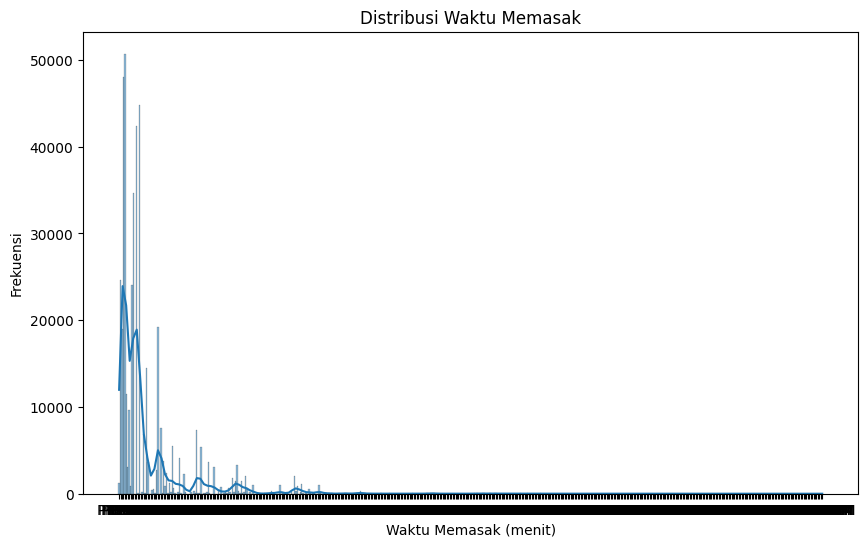

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(resep['CookTime'], bins=30, kde=True)
plt.title('Distribusi Waktu Memasak')
plt.xlabel('Waktu Memasak (menit)')
plt.ylabel('Frekuensi')
plt.show()

Persebaran data kalori

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

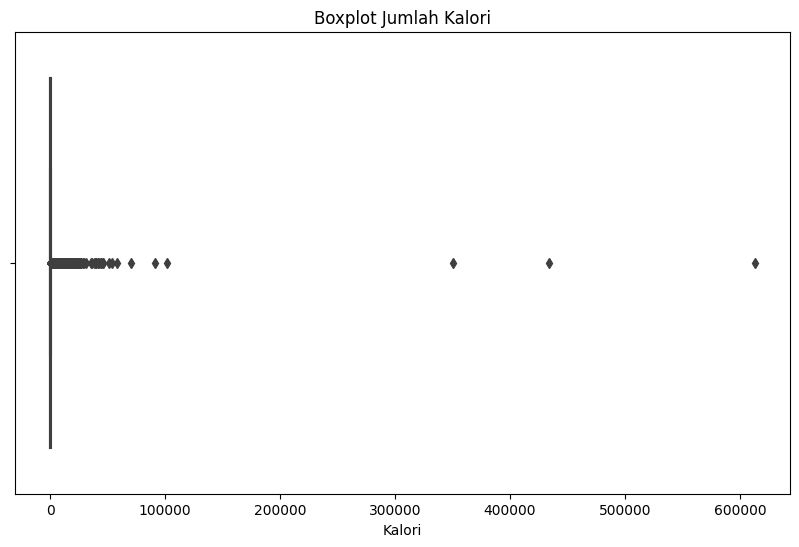

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=resep['Calories'])
plt.title('Boxplot Jumlah Kalori')
plt.xlabel('Kalori')
plt.show()

Distribusi rating

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

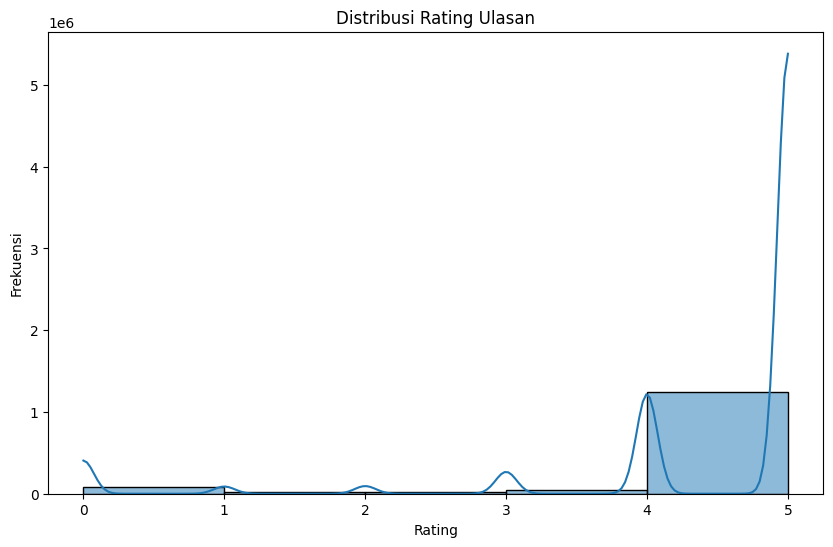

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(ulasan['Rating'], bins=5, kde=True)
plt.title('Distribusi Rating Ulasan')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

Jumlah ulasan yang diterima penulis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

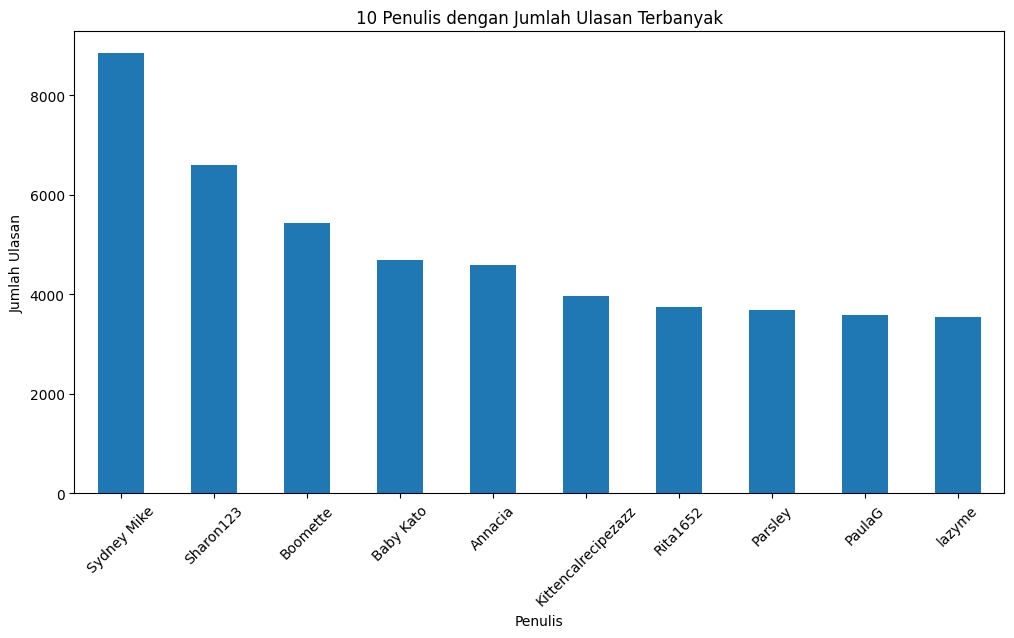

In [18]:
plt.figure(figsize=(12, 6))
ulasan['AuthorName'].value_counts().head(10).plot(kind='bar')
plt.title('10 Penulis dengan Jumlah Ulasan Terbanyak')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.show()

Waktu memasak kebanyakan ada di sekitar 10 menit sampai 30 menit, sedangkan kalori sepertinya persebarannya terlalu luas, untuk rating rata-rata pengguna memberikan nilai 4 sampai 5. Penulis `Sydney Mike` memiliki jumlah ulasan yang paling banyak menunjukkan bahwa beliau seorang yang popular baik dari segi baik atau hal lainnya.

#### Multivariate analysis

Hubungan antara waktu masak dengan kalori

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

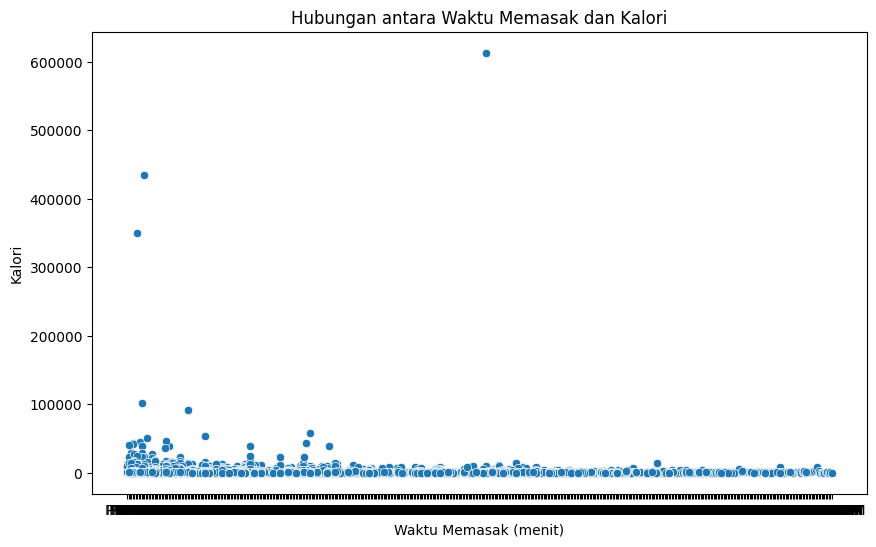

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CookTime', y='Calories', data=resep)
plt.title('Hubungan antara Waktu Memasak dan Kalori')
plt.xlabel('Waktu Memasak (menit)')
plt.ylabel('Kalori')
plt.show()

rata-rata kalori untuk kategori resep

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

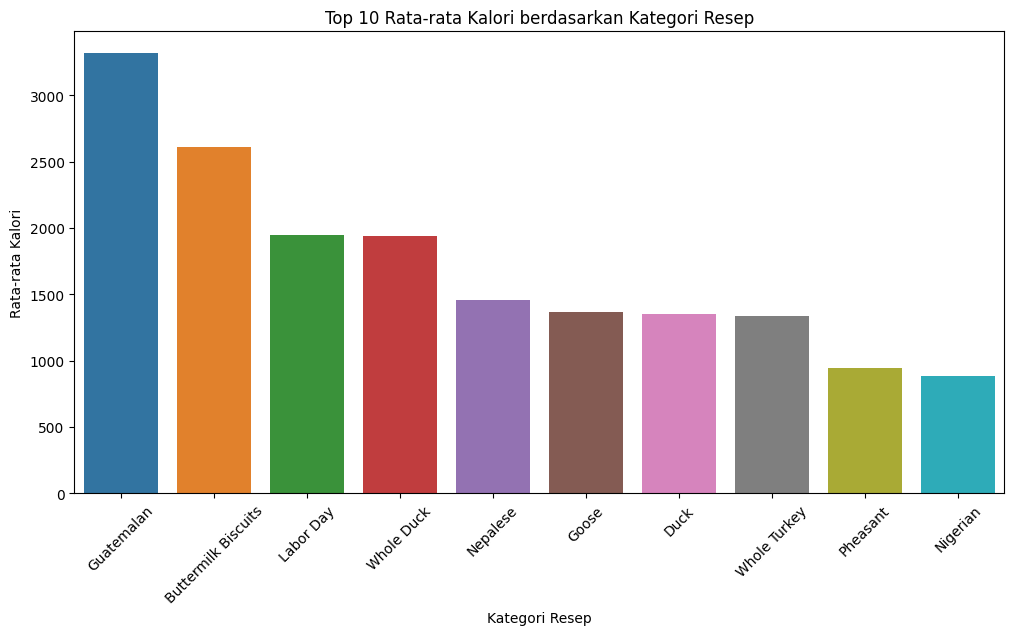

In [20]:
rata_rata_kalori = resep.groupby('RecipeCategory')['Calories'].mean().reset_index()

top_10_kategori = rata_rata_kalori.sort_values(by='Calories', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='RecipeCategory', y='Calories', data=top_10_kategori, estimator='mean')
plt.title('Top 10 Rata-rata Kalori berdasarkan Kategori Resep')
plt.xticks(rotation=45)
plt.ylabel('Rata-rata Kalori')
plt.xlabel('Kategori Resep')
plt.show()

Berdasarkan visualisasi yang dibuat menggunakan data resep dan ulasan ditemukan bahwa persebaran data point untuk resep yang memiliki kalori banyak itu rata-rata dimasak pada rentang 10 sampai 30 menit. Selain itu kategori yang memiliki rata-rata jumlah kalori paling banyak yaitu Guatemalan, Buttermilk Biscuits, dan Labor Day. Artinya makanan berlemak yang merupakan tentu saja makanan berat.

## Data Preprocessing
#### Data Cleaning

impute missing value dengan nan

In [21]:
def hitung_null(df, kolom):
    return df[kolom].isnull().sum()

def ganti_nan(df, kolom):
    df[kolom] = df[kolom].fillna('NA')
    return df

impute terhadap variabel CookTime, supaya bisa diproses oleh model nanti dan tidak menerima error.

In [22]:
hitung_null(resep, kolom='CookTime')

82545

In [23]:
ganti_nan(resep, kolom='CookTime')

RecipeId                                              Name  \
0             38                 Low-Fat Berry Blue Frozen Dessert   
1             39                                           Biryani   
2             40                                     Best Lemonade   
3             41                    Carina's Tofu-Vegetable Kebabs   
4             42                                      Cabbage Soup   
...          ...                                               ...   
522512    541379                    Meg's Fresh Ginger Gingerbread   
522513    541380  Roast Prime Rib au Poivre with Mixed Peppercorns   
522514    541381                             Kirshwasser Ice Cream   
522515    541382          Quick & Easy Asian Cucumber Salmon Rolls   
522516    541383                           Spicy Baked Scotch Eggs   

          AuthorId      AuthorName CookTime PrepTime TotalTime  \
0             1533          Dancer    PT24H    PT45M  PT24H45M   
1             1567        elly9812    PT25M     PT4H   PT4H25M   
2             1566  Stephen Little     PT5M    PT30M     PT35M   
3             1586         Cyclopz    PT20M    PT24H  PT24H20M   
4             1538       Duckie067    PT30M    PT20M     PT50M   
...            ...             ...      ...      ...       ...   
522512  2002090414           rdsxc    PT35M     PT1H   PT1H35M   
522513      211566    Denver cooks     PT3H    PT30M   PT3H30M   
522514  2001131545     Jonathan F.     PT3H     PT1H      PT4H   
522515  2001004241       CLUBFOODY       NA    PT15M     PT15M   
522516      188099    Chef LauraMD    PT25M    PT15M     PT40M   

                                              Description  \
0       Make and share this Low-Fat Berry Blue Frozen ...   
1       Make and share this Biryani recipe from Food.com.   
2       This is from one of my  first Good House Keepi...   
3       This dish is best prepared a day in advance to...   
4       Make and share this Cabbage Soup recipe from F...   
...                                                   ...   
522512  Make and share this Meg's Fresh Ginger Gingerb...   
522513  White, black, green, and pink peppercorns add ...   
522514  Make and share this Kirshwasser Ice Cream reci...   
522515  Extremely quick and easy to make, these are gr...   
522516  Great way to have hard boiled eggs and crispy,...   

                                                   Images   RecipeCategory  \
0       c("https://img.sndimg.com/food/image/upload/w_...  Frozen Desserts   
1       c("https://img.sndimg.com/food/image/upload/w_...   Chicken Breast   
2       c("https://img.sndimg.com/food/image/upload/w_...        Beverages   
3       c("https://img.sndimg.com/food/image/upload/w_...         Soy/Tofu   
4       "https://img.sndimg.com/food/image/upload/w_55...        Vegetable   
...                                                   ...              ...   
522512                                       character(0)          Dessert   
522513  "https://img.sndimg.com/food/image/upload/w_55...   Very Low Carbs   
522514                                       character(0)        Ice Cream   
522515  "https://img.sndimg.com/food/image/upload/w_55...         Canadian   
522516                                       character(0)        Breakfast   

        ... FatContent SaturatedFatContent CholesterolContent  SodiumContent  \
0       ...        2.5                 1.3                8.0           29.8   
1       ...       58.8                16.6              372.8          368.4   
2       ...        0.2                 0.0                0.0            1.8   
3       ...       24.0                 3.8                0.0         1558.6   
4       ...        0.4                 0.1                0.0          959.3   
...     ...        ...                 ...                ...            ...   
522512  ...       12.5                 7.6               54.4          278.2   
522513  ...      172.4                71.4              433.8   

In [24]:
hitung_null(resep, kolom='CookTime')

0

#### Data Cleaning Untuk Content Based Filtering

imputation missing value terhadap `Review` pada dataframe `ulasan` namun perlu menghapus kolom waktu yang tidak diperlukan terlebih dahulu

In [25]:
ulasan = ulasan[['ReviewId','RecipeId','AuthorId','AuthorName','Rating','Review']]

In [26]:
ulasan.shape

(1401982, 6)

In [27]:
hitung_null(ulasan, kolom='Review')

214

mengganti nilai 214 baris data yang NaN pada variabel `Review` karena nanti digunakan

In [28]:
ganti_nan(ulasan, kolom='Review')

ReviewId  RecipeId    AuthorId        AuthorName  Rating  \
0               2       992        2008         gayg msft       5   
1               7      4384        1634     Bill Hilbrich       4   
2               9      4523        2046  Gay Gilmore ckpt       2   
3              13      7435        1773     Malarkey Test       5   
4              14        44        2085        Tony Small       5   
...           ...       ...         ...               ...     ...   
1401977   2090339    139499  2002080368       terrylbiggs       2   
1401978   2090340    148484    41805321        rogerberry       5   
1401979   2090341    264191  2002901848    Reiketsukan 6.       5   
1401980   2090345    411791  2002901938            Sue M.       5   
1401981   2090347    352686  2002812127        dede25cory       5   

                                                    Review  
0             better than any you can get at a restaurant!  
1        I cut back on the mayo, and made up the differ...  
2        i think i did something wrong because i could ...  
3        easily the best i have ever had.  juicy flavor...  
4                                       An excellent dish.  
...                                                    ...  
1401977  I was disappointed. I couldn't wait to make th...  
1401978  Nothing to drain. And I don’t heat up the liqu...  
1401979  Good base recipe for someone to start with. I ...  
1401980  Thank you so much for this amazing recipe! I l...  
1401981  I can't say enough about this recipe.... the b...  

[1401982 rows x 6 columns]

In [29]:
hitung_null(ulasan, kolom='Review')

0

Dapat diperhatikan bahwa variabel waktu yang berkaitan dengan memasak itu ada string seprti PT, H, dll. Maka kita perlu hapus PT nya karena kita hanya perlu jam, dll

In [30]:
resep.CookTime = resep.CookTime.str.replace('PT', '')
resep.PrepTime = resep.PrepTime.str.replace('PT', '')
resep.TotalTime = resep.TotalTime.str.replace('PT', '')

In [31]:
resep['CookTime'].head(5)

0    24H
1    25M
2     5M
3    20M
4    30M
Name: CookTime, dtype: object

Dari sini datanya sudah mudah dibaca karena H artinya Jam dan M artinya menit

In [32]:
resep.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions'],
      dtype='object')

Mari kita lihat bentuk atau nilai dari setiap data untuk mengetahui apakah perlu diperbaiki atau tidak

In [33]:
resep['RecipeInstructions'].head()

0    c("Toss 2 cups berries with sugar.", "Let stan...
1    c("Soak saffron in warm milk for 5 minutes and...
2    c("Into a 1 quart Jar with tight fitting lid, ...
3    c("Drain the tofu, carefully squeezing out exc...
4    c("Mix everything together and bring to a boil...
Name: RecipeInstructions, dtype: object

In [34]:
resep['RecipeInstructions'][0]

'c("Toss 2 cups berries with sugar.", "Let stand for 45 minutes, stirring occasionally.", "Transfer berry-sugar mixture to food processor.", "Add yogurt and process until smooth.", "Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers\' directions). Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again.", "Return to pan and freeze until edges are solid.", "Transfer to processor and blend until smooth again.", \n"Fold in remaining 2 cups of blueberries.", "Pour into plastic mold and freeze overnight. Let soften slightly to serve.")'

terdapat huruf seperti "c" dan tanda kurung dan tutup kurung yang tidak seharunysnya ada, dan juga ada tanda kutip setiap kalimatnya. Maka dari itu untuk variabel `RecipeInstructions` ini kita bikin solusi dengan membersihkannya

In [35]:
def reformatRecipe(recipe_series):
    return recipe_series.apply(lambda i: i.replace("\n", "")
                                        .replace('c("', '')
                                        .replace('")', '')
                                        .replace('". "', '. '))

terapkan dan periksa

In [36]:
resep['RecipeInstructions'] = reformatRecipe(resep['RecipeInstructions'])
resep['RecipeInstructions'][0]

'Toss 2 cups berries with sugar.", "Let stand for 45 minutes, stirring occasionally.", "Transfer berry-sugar mixture to food processor.", "Add yogurt and process until smooth.", "Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers\' directions). Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again.", "Return to pan and freeze until edges are solid.", "Transfer to processor and blend until smooth again.", "Fold in remaining 2 cups of blueberries.", "Pour into plastic mold and freeze overnight. Let soften slightly to serve.'

Lalu kita lanjut periksa variabel lainnya pada `resep`

In [37]:
resep['Images'][0]

'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg", \n"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg")'

In [38]:
resep['Keywords'][0]

'c("Dessert", "Low Protein", "Low Cholesterol", "Healthy", "Free Of...", "Summer", "Weeknight", "Freezer", "Easy")'

In [39]:
resep['RecipeIngredientParts'][0]

'c("blueberries", "granulated sugar", "vanilla yogurt", "lemon juice")'

In [40]:
resep['RecipeIngredientQuantities'][0]

'c("4", "1/4", "1", "1")'

Terdapat beberapa hal yang perllu dibersihakan, mulai dari adanya tanda kurung, tanda kutip, dan penggunaan c, adanya simbol "/" "\n", NA harusnya menjadi string "NA", dll. Maka kita langsung saja handle terhadap tiap variabel pada `resep` tersebut.

In [41]:
def reformatKolom(variabel):
    def proses_item(i):
        if isinstance(i, str):
            i = i.replace("NA", '"NA"')
            i = i.replace("character(0)", 'c("character(0)")')
            i = i.replace("\n", "")
            if i.startswith('"http'):
                return [[i[1:-1]]]
            else:
                return i[3:-2].split('", "')
        else:
            return []
    
    return variabel.apply(proses_item)

In [42]:
resep['Images'] = reformatKolom(resep['Images'])
resep['Keywords'] = reformatKolom(resep['Keywords'])
resep['RecipeIngredientParts'] = reformatKolom(resep['RecipeIngredientParts'])
resep['RecipeIngredientQuantities'] = reformatKolom(resep['RecipeIngredientQuantities'])

In [43]:
resep['Images'][0]

['https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg',
 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg',
 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg',
 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg',
 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg',
 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg']

In [44]:
resep['Keywords'][0]

['Dessert',
 'Low Protein',
 'Low Cholesterol',
 'Healthy',
 'Free Of...',
 'Summer',
 'Weeknight',
 'Freezer',
 'Easy']

In [45]:
resep['RecipeIngredientParts'][0]

['blueberries', 'granulated sugar', 'vanilla yogurt', 'lemon juice']

In [46]:
resep['RecipeIngredientQuantities'][0]

['4', '1/4', '1', '1']

Kita sudah berhasil membersihkannya dan dari sini kita bisa tahu bahwa untuk untuk RecipeIngredientParts dan Quantities itu berkaitan untuk lokasi arraynya, artinya kalau blueberries disitu ada 4 biji, dst.

In [47]:
ulasan.head()

ReviewId  RecipeId  AuthorId        AuthorName  Rating  \
0         2       992      2008         gayg msft       5   
1         7      4384      1634     Bill Hilbrich       4   
2         9      4523      2046  Gay Gilmore ckpt       2   
3        13      7435      1773     Malarkey Test       5   
4        14        44      2085        Tony Small       5   

                                              Review  
0       better than any you can get at a restaurant!  
1  I cut back on the mayo, and made up the differ...  
2  i think i did something wrong because i could ...  
3  easily the best i have ever had.  juicy flavor...  
4                                 An excellent dish.

In [48]:
jumlahR = ulasan.shape[0]
jumlahA = len(np.unique(ulasan.AuthorId))
totalResep = len(np.unique(ulasan.RecipeId))

print(f"Total jumlah rating ada {jumlahR}, Total jumlah penulis resep yaitu {jumlahA}, dan Total jumlah resep adalah {totalResep}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total jumlah rating ada 1401982, Total jumlah penulis resep yaitu 271907, dan Total jumlah resep adalah 271678


In [49]:
resep.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions'],
      dtype='object')

Karena keterbatasan sumber daya yang saya gunakan, disini saya akan menggunakan sekitar 10% dari data resep yang ada sebagai sampel sekitar 27.000+ resep yang berbeda.

In [50]:
sepuluh = round(0.1*len(np.unique(ulasan.RecipeId)))
sepuluh

<IPython.core.display.Javascript object>

27168

Namun sebelum itu sebaiknya mengambil 5% resep tidak secara random terlebih dahulu, melainkan berdasarkan popularitas melalui jumlah rating dari seluruh resep.

In [51]:
jumlahRating = ulasan.groupby('RecipeId')['Rating'].count()
jumlahRating.sort_values(ascending=False, inplace=True)

In [52]:
jumlahRating.head()

RecipeId
45809    2892
2886     2182
27208    1614
89204    1584
39087    1491
Name: Rating, dtype: int64

Membuat dataframe baru untuk 10% sampel data dengan rating resep terbanyak.

In [53]:
resep1 = resep.iloc[:sepuluh]

In [54]:
resep1.shape

(27168, 26)

Selanjutnya menggabungkan berdasarkan id dari resep

In [55]:
resepPopuler = resep1.merge(jumlahRating, on='RecipeId')
resepPopuler.shape

(21112, 27)

Karena akan menggunakan beberapa variabel maka kita perlu menghapus baris yang memilki nilai null dan simpan dalam variabel baru.

In [56]:
cbf_populer = resepPopuler
cbf_populer.dropna(subset=['Name',
                           'RecipeId',
                           'Description',
                           'Keywords'], inplace=True)

In [57]:
cbf_populer.head()

RecipeId                               Name  AuthorId      AuthorName  \
0        38  Low-Fat Berry Blue Frozen Dessert      1533          Dancer   
1        39                            Biryani      1567        elly9812   
2        40                      Best Lemonade      1566  Stephen Little   
3        41     Carina's Tofu-Vegetable Kebabs      1586         Cyclopz   
4        42                       Cabbage Soup      1538       Duckie067   

  CookTime PrepTime TotalTime  \
0      24H      45M    24H45M   
1      25M       4H     4H25M   
2       5M      30M       35M   
3      20M      24H    24H20M   
4      30M      20M       50M   

                                         Description  \
0  Make and share this Low-Fat Berry Blue Frozen ...   
1  Make and share this Biryani recipe from Food.com.   
2  This is from one of my  first Good House Keepi...   
3  This dish is best prepared a day in advance to...   
4  Make and share this Cabbage Soup recipe from F...   

                                              Images   RecipeCategory  ...  \
0  [https://img.sndimg.com/food/image/upload/w_55...  Frozen Desserts  ...   
1  [https://img.sndimg.com/food/image/upload/w_55...   Chicken Breast  ...   
2  [https://img.sndimg.com/food/image/upload/w_55...        Beverages  ...   
3  [https://img.sndimg.com/food/image/upload/w_55...         Soy/Tofu  ...   
4  [[https://img.sndimg.com/food/image/upload/w_5...        Vegetable  ...   

  SaturatedFatContent CholesterolContent SodiumContent  CarbohydrateContent  \
0                 1.3                8.0          29.8                 37.1   
1                16.6              372.8         368.4                 84.4   
2                 0.0                0.0           1.8                 81.5   
3                 3.8                0.0        1558.6                 64.2   
4                 0.1                0.0         959.3                 25.1   

   FiberContent  SugarContent  ProteinContent  RecipeServings  \
0           3.6          30.2             3.2             4.0   
1           9.0          20.4            63.4             6.0   
2           0.4          77.2             0.3             4.0   
3          17.3          32.1            29.3             2.0   
4           4.8          17.7             4.3             4.0   

                                  RecipeInstructions  Rating  
0  Toss 2 cups berries with sugar.", "Let stand f...       4  
1  Soak saffron in warm milk for 5 minutes and pu...       1  
2  Into a 1 quart Jar with tight fitting lid, put...       9  
3  Drain the tofu, carefully squeezing out excess...       2  
4  Mix everything together and bring to a boil.",...       9  

[5 rows x 27 columns]

In [58]:
cbf_populer.shape

(21109, 27)

Tujuan kita adalah membuat variabel yang berisikan teks mengenai Bahan, Kategori, Keyword, dan lama resep dimasak pada suatu resep terhadap variabel `Resep`. Maka dari itu untuk variabel tersebut nanti kita akan tambahkan secara bertahap. Tapi untuk Keywords harus dijadikan string terlebih dahulu

Sebelum menambahkan keyword, kita harus ubah dia menjadi string yang awalnya list

In [60]:
cbf_populer['Keywords'][0]

['Dessert',
 'Low Protein',
 'Low Cholesterol',
 'Healthy',
 'Free Of...',
 'Summer',
 'Weeknight',
 'Freezer',
 'Easy']

In [61]:
def ubah_list(kolom):
    return f" {' '.join(kolom)} "

In [62]:
cbf_populer.Keywords = cbf_populer.Keywords.apply(ubah_list)

In [65]:
cbf_populer = cbf_populer.reset_index()

Memeriksa adanya duplikat pada data. Namun karena ada yang bertipe list, jadi mungkin satu satu yang diperiksa

In [66]:
cbf_populer.columns

Index(['index', 'RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime',
       'PrepTime', 'TotalTime', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions', 'Rating'],
      dtype='object')

In [67]:
cbf_populer['RecipeId'].duplicated().value_counts()

RecipeId
False    21109
Name: count, dtype: int64

In [68]:
cbf_populer['Name'].duplicated().value_counts()

Name
False    19753
True      1356
Name: count, dtype: int64

In [69]:
cbf_populer['Name'].value_counts()

Name
Banana Bread                  13
Broccoli Salad                12
Sweet Potato Casserole         9
Shepherd's Pie                 8
Chicken Enchiladas             8
                              ..
pineapple and cheese ball      1
Pretty Honey Butter            1
lemon parsley chicken rice     1
Mole con chica pollo           1
Cheese and Egg Soup            1
Name: count, Length: 19753, dtype: int64

Untuk id tidak ada duplikat, namun untuk nama ada duplikat artinya ada kesamaan string atau nama resep yang sama namun bisa jadi berbeda author, dll.

Namun sepertinya tidak masalah untuk saat ini, karena meskipun resepnya sama mungkin saja bahan dan atribut lainnya berbeda.

In [70]:
cbf_rekomendasi1 = cbf_populer.copy()

In [71]:
cbf_rekomendasi1['Resep'] = cbf_rekomendasi1['RecipeCategory']
cbf_rekomendasi1['Resep'] = cbf_rekomendasi1['Resep'].fillna('')

# Untuk bahan kita ubah jadi string
cbf_rekomendasi1['Bahan-Bahan'] = cbf_rekomendasi1['RecipeIngredientParts'].apply(ubah_list)

cbf_rekomendasi1['Resep'] = cbf_rekomendasi1['Resep'] + cbf_rekomendasi1['Bahan-Bahan']

cbf_rekomendasi1['Resep'] = cbf_rekomendasi1['Resep'] + cbf_rekomendasi1['TotalTime']

cbf_rekomendasi1['Resep'] = cbf_rekomendasi1['Resep'].fillna('')

In [72]:
cbf_rekomendasi1['Resep'][0]

'Frozen Desserts blueberries granulated sugar vanilla yogurt lemon juice 24H45M'

Membuat dan Menerapkan Count Vectorizer terhadap data Resep yaitu dengan mengubah kata yang sudah di tokeenize menjadi vector representation supaya komputer dapat memahaminya

In [73]:
model_tfidf = TfidfVectorizer(analyzer='word',
                              ngram_range=(1, 2),
                              min_df=0,
                              stop_words='english')

tfidf = model_tfidf.fit_transform(cbf_rekomendasi1['Resep'])

<IPython.core.display.Javascript object>

#### Data Cleaning Untuk Collaborative Filtering

Membuat dataframe baru dengan menggabungkan data ulasan dan resep berdasarkan RecipeId, mengambil kolom penting seperti RecipeCategory, Rating, AuthorId, dan RecipeId, lalu menangani nilai kosong pada Rating dengan mengisinya menggunakan rata-rata rating.

In [ ]:
data2 = ulasan[ulasan['RecipeId'].isin(resep1['RecipeId'])]
data2 = data2.merge(resep1[['RecipeId', 'RecipeCategory']], on='RecipeId')

df2 = data2[['RecipeCategory', 'Rating', 'AuthorId', 'RecipeId']]

df2['Rating'] = df2['Rating'].fillna(df2['Rating'].mean())

melakukan encoding pada kolom AuthorId, RecipeId, dan RecipeCategory menggunakan LabelEncoder untuk mengonversi nilai kategori menjadi numerik dan nominal

In [ ]:
author_encoder = LabelEncoder()
df2['AuthorId_encoded'] = author_encoder.fit_transform(df2['AuthorId'])

recipe_encoder = LabelEncoder()
df2['RecipeId_encoded'] = recipe_encoder.fit_transform(df2['RecipeId'])

category_encoder = LabelEncoder()
df2['RecipeCategory_encoded'] = category_encoder.fit_transform(df2['RecipeCategory'])

nilai Rating dinormalisasi ke rentang 0-1 berdasarkan nilai minimum dan maksimum dalam dataset. data fitur (X2) terdiri dari kolom yang telah di-encode, dan data target (y2) adalah rating yang sudah dinormalisasi.

In [ ]:
min_rating = df2['Rating'].min()
max_rating = df2['Rating'].max()

df2['NormalizedRating'] = (df2['Rating'] - min_rating) / (max_rating - min_rating)

X2 = df2[['AuthorId_encoded', 'RecipeId_encoded', 'RecipeCategory_encoded']].values
y2 = df2['NormalizedRating'].values

Split atau membagi dataset dengan bobot 80:20 untuk data train dan data validasi

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2, random_state=42)

## Modeling

#### A. Content Based Filtering
Membuat sistem rekomendasi untuk merekomendasikan bahan-bahan terhadap suatu resep makanan dengan memperhatikan data berupa teks yaitu bahan makanan, kategori resep, dan lamanya resep tersebut dimasak.

Tahapannya:
1. Count Vectorizer dengan TF-IDF
Teknik TF-IDF (Term Frequency-Inverse Document Frequency) digunakan untuk merepresentasikan resep sebagai vektor numerik berdasarkan kata-kata yang muncul dalam deskripsinya.
- Term Frequency (TF): Mengukur seberapa sering suatu kata muncul dalam resep tertentu.
- Inverse Document Frequency (IDF): Memberi bobot lebih besar pada kata-kata unik yang tidak sering muncul di seluruh resep.
- Parameter `ngram_range=(1, 2)` memungkinkan analisis kata tunggal (unigrams) dan pasangan kata (bigrams).
- Kata-kata umum dalam bahasa Inggris dihapus dengan stop_words='english'.

2. Cosine Similarity
Menggunakan Cosine Similarity untuk mengukur tingkat kemiripan antar resep berdasarkan vektor TF-IDF. Nilai kemiripan dihitung berdasarkan sudut antar-vektor:
- Nilai mendekati 1 berarti kedua resep sangat mirip.
- Nilai mendekati 0 berarti keduanya tidak mirip sama sekali.

3. Mapping Nama Resep ke Indeks:
Membuat indeks berdasarkan nama resep untuk mempermudah pencarian resep tertentu.

4. Membangun Fungsi Rekomendasi:
Fungsi ini menghasilkan daftar rekomendasi berdasarkan:
- Input resep: Resep yang dimasukkan pengguna.
- Kemiripan kosinus: Dihitung dengan skor kemiripan untuk semua resep lainnya.

Langkah-langkah dalam fungsi:
- Mencari indeks dari resep input.
- Mengurutkan skor kemiripan dari tertinggi ke terendah (kecuali resep itu sendiri).
- Mengambil nama resep, bahan, dan ID dari rekomendasi teratas.
- Mengembalikan hasil dalam bentuk DataFrame.

5. Menghasilkan Output:
Memberikan 8 resep yang paling mirip dengan "Banana Bread" berdasarkan bahan atau deskripsi yang ada.


Kelebihan CBF:
1. Tidak Bergantung pada Data Pengguna dengan menggunakan informasi eksplisit tentang resep (bahan, deskripsi), sehingga cocok untuk sistem baru dengan sedikit data pengguna.
2. Personalized Recommendations dengan fokus pada kemiripan konten, sehingga memberikan rekomendasi yang relevan dengan input spesifik.
3. Menghindari Cold-Start Problem pada Pengguna yaitu tidak membutuhkan interaksi sebelumnya (seperti rating) untuk memberikan rekomendasi.

Kekurangan CBF:
1. Keterbatasan Eksplorasi:
Rekomendasi terbatas pada konten mirip dengan input, sehingga kurang mampu menemukan resep berbeda yang mungkin menarik pengguna (serendipity).
2. Ketergantungan pada Kualitas Data:
Kualitas rekomendasi bergantung pada seberapa baik deskripsi dan informasi bahan ditulis.

Menerapkan cosine similarity

In [74]:
cosine_resep = linear_kernel(tfidf, tfidf)

Setelah mendapatkan kesamaan dari cosine pairwise teresbut. Selanjutnya mencari nama resep yang cukup populer untuk digunakan sebagai input parameter sistem rekomendasi.

In [76]:
cbf_rekomendasi1['Name'].value_counts()

Name
Banana Bread                  13
Broccoli Salad                12
Sweet Potato Casserole         9
Shepherd's Pie                 8
Chicken Enchiladas             8
                              ..
pineapple and cheese ball      1
Pretty Honey Butter            1
lemon parsley chicken rice     1
Mole con chica pollo           1
Cheese and Egg Soup            1
Name: count, Length: 19753, dtype: int64

**Mapping Nama Resep ke Indeks**: Membuat indeks berdasarkan nama resep untuk mempermudah pencarian resep tertentu.

In [ ]:
cbf_resep = cbf_rekomendasi1.reset_index()
nama = cbf_resep['Name'] 
indice = pd.Series(cbf_resep.index, index=cbf_resep['Name'])

membuat fungsi top n rekomendasi resep dan bahan-bahan berdasarkan cosine similarity.

In [98]:
def rekomendasi_cbf_resep_dan_bahan(resep, n=10):
    """
    Menghasilkan rekomendasi resep dan bahan-bahan berdasarkan cosine similarity.

    Args:
        title (str): Nama resep untuk mencari rekomendasi.
        n (int): Jumlah rekomendasi yang diinginkan (default 10 resep).

    Returns:
        pd.DataFrame: DataFrame berisi resep yang direkomendasikan, nama, dan bahan-bahannya.
    """
    # cari indeks berdasarkan nama resep
    idx = indice[resep]

    # kalau indeks berupa iterable (multiple matches), gunakan salah satu
    if isinstance(idx, Iterable):
        idx = idx[0]

    # cari skor kemiripan
    similarity_scores = list(enumerate(cosine_resep[idx]))

    # terus diurut skor dari tertinggi ke terendah, lewati indeks pertama (resep yang sama)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1 : n + 1]

    # ambil indeks dari rekomendasi
    recipe_indices = [i[0] for i in similarity_scores]

    # nama resep, bahan, dan RecipeId dari DataFrame
    recommended_names = nama.iloc[recipe_indices]
    recommended_ingredients = cbf_rekomendasi1['RecipeIngredientParts'].iloc[recipe_indices]
    recommended_ids = cbf_resep['RecipeId'].iloc[recipe_indices]

    # output dalam DataFrame
    rekomendasi_cbf = pd.DataFrame({
        'RecipeId': recommended_ids.values,
        'Name': recommended_names.values,
        'RecipeIngredientParts': recommended_ingredients.values
    })

    return rekomendasi_cbf

<IPython.core.display.Javascript object>

Menerapkan sistem rekomendasi

In [99]:
rekomendasi_cbf_resep_dan_bahan("Banana Bread", n=8)

<IPython.core.display.Javascript object>

RecipeId                               Name  \
0      2886                  Best Banana Bread   
1     25885                Banana Banana Bread   
2     19491            Banana Nut Chip Muffins   
3     14985         Grandmas' Banana Nut Bread   
4     28091           Black-Bottom Banana Bars   
5     19501  Baker's Chocolatey Banana Muffins   
6      1420                     Amish Biscuits   
7     21734        Banana Bran Breakfast Bread   

                               RecipeIngredientParts  
0  [butter, granulated sugar, eggs, bananas, all-...  
1  [all-purpose flour, baking soda, salt, butter,...  
2  [butter, granulated sugar, eggs, bananas, all-...  
3  [flour, baking powder, salt, baking soda, suga...  
4  [butter, margarine, sugar, egg, vanilla extrac...  
5  [sugar, eggs, bananas, salt, cinnamon, flour, ...  
6  [all-purpose flour, baking soda, salt, baking ...  
7  [all-purpose flour, whole wheat flour, baking ...

In [79]:
rekomendasi_cbf_resep_dan_bahan("Sweet Potato Casserole", n=4)

<IPython.core.display.Javascript object>

Name  \
0  Sweet Potato Casserole w/Coconut Pecan topping   
1                            Baked Sweet Potatoes   
2                          Sweet Potato Casserole   
3                Grandma's Sweet Potato Casserole   

                               RecipeIngredientParts  
0  [sweet potatoes, sugar, vanilla, half-and-half...  
1                           [sweet potatoes, butter]  
2  [sweet potatoes, sugar, eggs, vanilla, margari...  
3  [sweet potatoes, sugar, eggs, vanilla, margari...

#### B. Hybrid Recommender System (Content Based + Collaborative Filtering)

Membuat sistem rekomendasi dengan menggunakan kategori Weighted yang menerapkan teknik Bayesian Weighted Average untuk menghitung peringkat atau bobot dari resep. Caranya dengan membuat fungsi weighted dulu, lalu hasil yang diharapkan adalah rekomendasi berdasarkan variabel `resep` yang sudah dibuat didampingi oleh jumlah rating paling banyak dan weighted rating paling tinggi.

#### Bayesian Weighted Average

weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
eport

- R = average review Resep = (mean_review)
- v = number of review Resep = (sum_review)
- m = minimum num of review required to be listed in the analysis
- C = the average review across the whole Resep

Membuat fungsi untuk mencari bobot

In [80]:
def fungsi_bobot(df):
    v = df['Rating']
    R = df['AggregatedRating']
    return (v / (v + m) * R) + (m / (m + v) * C)

Membuat fungsi untuk sistem rekomendasi Hybrid

In [81]:
hybrid_resep = cbf_resep

def rekomendasi_hybrid_bobot(resep, n=10, m=50, C=None):
    """
    Menghasilkan rekomendasi resep berdasarkan Bayesian Weighted Average.

    Args:
        resep (str): Nama resep untuk mencari rekomendasi.
        n (int): Jumlah rekomendasi yang diinginkan (default 10).
        m (int): Minimum jumlah ulasan untuk mempertimbangkan item.
        C (float): Rata-rata rating di seluruh dataset. Jika None, dihitung otomatis.

    Returns:
        pd.DataFrame: DataFrame berisi hasil rekomendasi dengan kolom RecipeId, Name, Rating, AggregatedRating, WR, dan RecipeIngredientParts.
    """
    # mencari nilai C
    if C is None:
        C = cbf_resep['AggregatedRating'].mean()

    # indeks dari resep berdasarkan nama resep
    idx = indice[resep]
    if isinstance(idx, Iterable):
        idx = idx[0]

    # cari skor kemiripan lalu diurutkan dari tertinggi ke terendah dan yang indeks pertama dilewat karena resep itu sendiri
    similarity_scores = list(enumerate(cosine_resep[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1 : n + 1]
    recipe_indices = [i[0] for i in similarity_scores]

    recommendations = hybrid_resep.iloc[recipe_indices]

    # hitung Weighted Rank (WR)
    recommendations['WR'] = (
        (recommendations['ReviewCount'] / (recommendations['ReviewCount'] + m)) * recommendations['AggregatedRating']
        + (m / (recommendations['ReviewCount'] + m)) * C
    )

    rekomendasi_hybrid = recommendations[[
        'RecipeId', 'Name', 'ReviewCount', 'AggregatedRating', 'WR', 'RecipeIngredientParts'
    ]].sort_values('WR', ascending=False).head(n)

    return rekomendasi_hybrid

Menerapkan fungsi sistem rekomendasi hybrid

In [84]:
rekomendasi_hybrid_bobot("Sweet Potato Casserole",
                         n=8,
                         m=10)

RecipeId                                            Name  ReviewCount  \
6481      11924                          Sweet Potato Casserole         33.0   
2004       4330                       Sweet Potato Casserole II         25.0   
5155      10254                            Baked Sweet Potatoes         18.0   
8447      14412  Sweet Potato Casserole w/Coconut Pecan topping         12.0   
2233       4736                      Sweet Potato Casserole III         12.0   
9198      15363                          Sweet Potato Casserole          8.0   
11736     18528                          Sweet Potato Casserole          5.0   
3937       8505                Grandma's Sweet Potato Casserole          7.0   

       AggregatedRating        WR  \
6481                5.0  4.904325   
2004                5.0  4.882456   
5155                5.0  4.853071   
8447                5.0  4.812999   
2233                5.0  4.812999   
9198                5.0  4.771443   
11736               5.0  4.725732   
3937                4.5  4.552116   

                                   RecipeIngredientParts  
6481   [sweet potatoes, sugar, vanilla, eggs, evapora...  
2004   [sweet potatoes, eggs, sugar, milk, margarine,...  
5155                            [sweet potatoes, butter]  
8447   [sweet potatoes, sugar, vanilla, half-and-half...  
2233   [sweet potatoes, sugar, butter, eggs, vanilla ...  
9198   [sweet potatoes, sugar, eggs, vanilla, margari...  
11736  [sweet potatoes, sugar, eggs, vanilla, milk, s...  
3937   [sweet potatoes, sugar, eggs, vanilla, margari...

### C. Collaborative Filtering Menggunakan Neural Network
Membuat model berbasis neural network yang mampu mempelajari interaksi antar entitas melalui neural network dan memprediksi rating untuk resep yang belum dicoba oleh pengguna. Dengan pendekatan ini, model dapat memberikan rekomendasi yang lebih kompleks dan mempertimbangkan berbagai faktor selain sekadar interaksi pengguna-item.


#### Tahapan Dalam Membuat Model Berbasis Jaringan Syaraf
1. Membuat class Model `RecommenderNet`:
- num_users: Jumlah pengguna yang unik dalam dataset (total AuthorId).
- num_recipes: Jumlah resep yang unik dalam dataset (total RecipeId).
- num_categories: Jumlah kategori resep yang unik.
- embedding_size: Ukuran dimensi vektor embedding untuk setiap entitas (pengguna, resep, kategori).

2. Layer Embedding:
Dilakukan karena setiap data yang digunakan itu merupakan data nominal dan perlu untuk di kategorikan khususnya variabel `RecipeCategory` yang memiliki 200+ kategori resep makanan.
- num_users, num_recipes, dan num_categories adalah jumlah kategori unik.
- embedding_size: Dimensi dari representasi embedding.
- embeddings_initializer="he_normal": Teknik inisialisasi bobot untuk menghindari vanishing gradient.
- embeddings_regularizer=tf.keras.regularizers.l2(1e-5): Regularisasi L2 untuk mencegah overfitting pada embedding.

3. Menghitung Skor Prediksi dengan dua komponen:
- Dot product antara user dan resep: Mengukur interaksi antara pengguna dan resep berdasarkan embedding mereka.
- Dot product antara resep dan kategori: Mengukur relevansi antara resep dan kategori yang terkait.

Sehingga outputnya didapat dari fungsi aktivasi sigmoid yang digunakan untuk mengubah skor prediksi menjadi rentang antara 0 dan 1 (seperti rating).

4. Menyiapkan Optimizer dan Model
- Optimizer: ExponentialDecay digunakan untuk mengurangi laju pembelajaran secara eksponensial seiring berjalannya waktu. Ini membantu model untuk belajar dengan cepat di awal dan stabil di akhir pelatihan.
- Loss Function: MeanSquaredError digunakan untuk mengukur perbedaan antara rating yang diprediksi dengan rating yang sebenarnya. Model berusaha untuk meminimalkan kesalahan ini.
- Metrics: RootMeanSquaredError (RMSE) dan MeanAbsoluteError (MAE) digunakan untuk mengevaluasi kinerja model.

5. Melatih Model
- Pelatihan: Model dilatih menggunakan data pelatihan (X_train, y_train) selama 10 epoch dengan batch size 128.
- Validation: X_val dan y_val digunakan untuk memverifikasi kinerja model pada data yang tidak terlihat selama pelatihan.

6. Membuat Fungsi Rekomendasi Resep
- Menyaring resep yang sudah dinilai oleh pengguna.
- Menghitung rating yang diprediksi untuk resep yang belum dinilai oleh pengguna.
- Menyortir resep berdasarkan rating yang diprediksi dan memilih top_n resep teratas.

7. Mendapatkan Rekomendasi
- Menghasilkan 5 resep teratas yang direkomendasikan untuk pengguna secara acak (random_author_id).

#### Kelebihan Collaborative Filtering dengan Neural Network
1. Daya Prediksi Lebih Baik:
Dapat memprediksi rating secara langsung dengan memperhitungkan banyak faktor, bukan hanya interaksi antara pengguna dan item.

2. Kemampuan Menggunakan Fitur Tambahan:
Dengan menggunakan embedding untuk kategori dan resep, model ini dapat memanfaatkan fitur tambahan selain hanya data rating pengguna. Ini memungkinkan model untuk lebih memahami keterkaitan antar item (resep) dan kategori.

3. Regularisasi:
Regularisasi L2 pada embedding membantu mencegah overfitting, membuat model lebih robust.

In [169]:
resep1.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions'],
      dtype='object')

In [201]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_recipes, num_categories, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users, embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-5)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.recipe_embedding = layers.Embedding(
            num_recipes, embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.recipe_bias = layers.Embedding(num_recipes, 1)

        self.category_embedding = layers.Embedding(
            num_categories, embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])

        recipe_vector = self.recipe_embedding(inputs[:, 1])
        recipe_bias = self.recipe_bias(inputs[:, 1])

        category_vector = self.category_embedding(inputs[:, 2])

        dot_user_recipe = tf.tensordot(user_vector, recipe_vector, 2)
        dot_recipe_category = tf.tensordot(recipe_vector, category_vector, 2)

        x = dot_user_recipe + dot_recipe_category + user_bias + recipe_bias
        return tf.nn.sigmoid(x)

<IPython.core.display.Javascript object>

In [206]:
num_users = df2['AuthorId_encoded'].nunique()
num_recipes = df2['RecipeId_encoded'].nunique()
num_categories = df2['RecipeCategory_encoded'].nunique()
embedding_size = 100

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

model2 = RecommenderNet(num_users, num_recipes, num_categories, embedding_size)
model2.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
history2 = model2.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1446/1446 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1062 - mean_absolute_error: 0.1486 - root_mean_squared_error: 0.3158

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1446/1446 ━━━━━━━━━━━━━━━━━━━━ 105s 71ms/step - loss: 0.1062 - mean_absolute_error: 0.1486 - root_mean_squared_error: 0.3157 - val_loss: 0.0798 - val_mean_absolute_error: 0.1204 - val_root_mean_squared_error: 0.2803
Epoch 2/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 94s 65ms/step - loss: 0.0789 - mean_absolute_error: 0.1189 - root_mean_squared_error: 0.2794 - val_loss: 0.0790 - val_mean_absolute_error: 0.1204 - val_root_mean_squared_error: 0.2803
Epoch 3/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 95s 66ms/step - loss: 0.0801 - mean_absolute_error: 0.1209 - root_mean_squared_error: 0.2824 - val_loss: 0.0788 - val_mean_absolute_error: 0.1204 - val_root_mean_squared_error: 0.2803
Epoch 4/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - loss: 0.0812 - mean_absolute_error: 0.1210 - root_mean_squared_error: 0.2826 - val_loss: 0.0851 - val_mean_absolute_error: 0.1204 - val_root_mean_squared_error: 0.2803
Epoch 5/10
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 95s 66ms/step - loss: 0.0836 - mean_absolute_error: 0.1196 - ro

In [217]:
def recommend_recipes(model, author_id, top_n=5):
    # mengambil semua recipe id yang ada
    all_recipe_ids = df2['RecipeId_encoded'].unique()
    
    # mengambil resep yang sudah diberi rating oleh author_id
    rated_recipes = df2[df2['AuthorId_encoded'] == author_id]['RecipeId_encoded'].values
    
    # menentukan resep yang belum pernah dicoba oleh author_id
    unseen_recipes = [recipe_id for recipe_id in all_recipe_ids if recipe_id not in rated_recipes]
    
    # membuat input untuk prediksi: AuthorId dan RecipeId yang belum dicoba
    unseen_data = []
    for recipe_id in unseen_recipes:
        category = df2[df2['RecipeId_encoded'] == recipe_id]['RecipeCategory_encoded'].values[0]
        unseen_data.append([author_id, recipe_id, category])
    
    unseen_data = np.array(unseen_data)
    
    # memprediksi rating untuk resep yang belum pernah dicoba
    predicted_ratings = model.predict(unseen_data)
    
    # menambahkan prediksi rating ke dalam dataframe
    unseen_recipes_with_ratings = list(zip(unseen_recipes, predicted_ratings.flatten()))
    
    # mengurutkan berdasarkan rating tertinggi dan memilih top n
    top_recommendations = sorted(unseen_recipes_with_ratings, key=lambda x: x[1], reverse=True)[:top_n]
    
    # membuat dataframe hasil rekomendasi langsung
    top_recommendations_df = pd.DataFrame(top_recommendations, columns=['RecipeId_encoded', 'PredictedRating'])
    
    # menambahkan informasi RecipeId dan RecipeCategory dari df2
    top_recommendations_df = top_recommendations_df.merge(
        df2[['RecipeId_encoded', 'RecipeId', 'RecipeCategory']].drop_duplicates(),
        on='RecipeId_encoded',
        how='left'
    )
    
    # menambahkan kolom Name dari resep1
    top_recommendations_df = top_recommendations_df.merge(
        resep1[['RecipeId', 'Name']],
        on='RecipeId',
        how='left'
    )
    
    return top_recommendations_df

In [219]:
# menggunakan fungsi untuk mendapatkan top 5 rekomendasi untuk random author_id
random_author_id = np.random.choice(df2['AuthorId_encoded'].unique())

recommended_recipes = recommend_recipes(model2, random_author_id, 5)
recommended_recipes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<IPython.core.display.Javascript object>

RecipeId_encoded  PredictedRating  RecipeId RecipeCategory  \
0              2004              1.0      4330         Potato   
1              4092              1.0      8688   Lunch/Snacks   
2              3691              1.0      8113     Cheesecake   
3              2598              1.0      5373        Dessert   
4              3807              1.0      8312           Stew   

                         Name  
0   Sweet Potato Casserole II  
1   Mic's Wonderful HOT Wings  
2  Czechoslovakian Cheesecake  
3          Digestive Biscuits  
4          Creole Shrimp Stew

## Evaluation

#### A. Content Based Filtering
Terdapat beberapa parameter evaluasi yang akan diuji untuk melihat performa dari model rekomendasi Content Based Filtering sebelumnya yaitu:
1. Precision @ K
2. Recall @ K
3. Average Precision @ K
4. Mean Average Precision @ K

Untuk mengevaluasi sistem rekomendasi CBF tersebut saya menggunakan tiga metrik untuk mengukur kinerja model, yaitu Precision@K, Recall@K, dan Average Precision@K (AP@K). Di samping itu, ada Mean Average Precision@K (MAP@K) yang menggabungkan hasil evaluasi dari semua resep untuk menghasilkan skor keseluruhan.

1. Precision@K mengukur seberapa banyak item yang relevan ada di dalam K rekomendasi teratas yang diberikan oleh model.

Precision@K = Jumlah item relevan dalam top K rekomendasi / K

Precision@K memberi tahu kita berapa banyak dari K rekomendasi yang benar-benar relevan bagi pengguna. Misalnya, jika 5 dari 40 rekomendasi teratas relevan, precision akan menjadi 0.125 (5 relevan / 40 rekomendasi).

2. Recall@K mengukur seberapa banyak item relevan yang ada di dalam K rekomendasi teratas dibandingkan dengan seluruh item relevan yang tersedia.

Recall@K = Jumlah item relevan dalam top K rekomendasi / Jumlah total item relevan

Recall@K menunjukkan kemampuan model untuk menangkap semua item relevan dalam daftar rekomendasi teratas. Jika terdapat banyak item relevan tapi model hanya berhasil merekomendasikan sedikit dari mereka, recall akan rendah.

3. Average Precision@K (AP@K) adalah rata-rata precision pada setiap level rekomendasi dalam K teratas.

AP@K = (1 / |relevan|) . i=1 ∑ k Precision@i x I(rekomendasi i . ∈ relevan)

AP@K memberikan skor rata-rata yang lebih memperhatikan kualitas posisi dalam daftar rekomendasi. AP@K lebih memberi nilai pada posisi item relevan yang lebih tinggi dalam daftar rekomendasi.

4. Mean Average Precision@K (MAP@K) adalah rata-rata dari AP@K untuk semua pengguna, yang memberikan gambaran umum kinerja model untuk seluruh dataset.

MAP@K = (1/N) u=1 ∑ N AP@K u

MAP@K memberikan gambaran kinerja model pada skala yang lebih luas, dengan menghitung rata-rata dari skor AP@K untuk setiap pengguna. Nilai ini mencerminkan seberapa baik model dalam memberikan rekomendasi yang relevan di seluruh dataset.

Hasil evaluasi menunjukkan bahwa Precision@40 dan Recall@40 bervariasi untuk masing-masing resep yang dievaluasi. Sebagai contoh, untuk "Banana Bread", precision sebesar 0.025 dan recall sebesar 0.111 menunjukkan bahwa hanya sebagian kecil dari rekomendasi yang relevan dengan total item relevan yang ada. Namun, Average Precision lebih tinggi di "Sweet Potato Casserole" (AP@40 = 0.292), yang menunjukkan bahwa meskipun jumlah item relevan tidak banyak, posisi item relevan dalam rekomendasi cukup baik.

MAP@40 untuk semua resep di dataset adalah 0.0395, yang merupakan nilai rata-rata dari AP@K untuk setiap resep yang diuji. Ini menunjukkan bahwa meskipun ada beberapa rekomendasi yang sangat baik, banyak rekomendasi yang kurang relevan untuk banyak resep, yang menandakan bahwa model dapat ditingkatkan.

[Source: https://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#:~:text=Examples%20and%20Intuition%20for%20AP%C2%B6]

Mmebuat fungsi untuk precision, recall, average precision, dan mean of average precision.

In [91]:
def precision_at_k(rekomendasi, relevan, k):
    """
    Hitung Precision@K.
    Args:
        rekomendasi (list): Daftar item yang direkomendasikan.
        relevan (list): Daftar item yang relevan.
        k (int): Jumlah rekomendasi yang dipertimbangkan.
    Returns:
        float: Precision@K.
    """

    rekomendasi = rekomendasi[:k]
    relevan_set = set(relevan)
    hit = len([item for item in rekomendasi if item in relevan_set])
    return hit / k

In [121]:
def recall_at_k(rekomendasi, relevan, k):
    """
    Hitung Recall@K.
    Args:
        rekomandasi (list): Daftar item yang direkomendasikan.
        relevan (list): Daftar item yang relevan.
        k (int): Jumlah rekomendasi yang dipertimbangkan.
    Returns:
        float: Recall@K.
    """

    rekomendasi = rekomendasi[:k]
    relevan_set = set(relevan)
    hit = len([item for item in rekomendasi if item in relevan_set])
    return hit / len(relevan) if relevan else 0

In [93]:
def average_precision_at_k(rekomendasi, relevan, k):
    """
    Hitung Average Precision@K.
    Args:
        rekomendasi (list): Daftar item yang direkomendasikan.
        relevan (list): Daftar item yang relevan.
        k (int): Jumlah rekomendasi yang dipertimbangkan.
    Returns:
        float: Rata-rata Precision@K.
    """

    relevan_set = set(relevan)
    skor_precision = [
        precision_at_k(rekomendasi, relevan, i+1)
        for i in range(min(k, len(rekomendasi)))
        if rekomendasi[i] in relevan_set
    ]

    return sum(skor_precision) / len(relevan) if relevan else 0

In [94]:
def mean_average_precision_at_k(semua_rekomendasi, semua_relevan, k):
    """
    Hitung Mean Average Precision@K.
    Args:
        semua_rekomendasi (dict): {user_id: list of recommended items}.
        semua_relevan (dict): {user_id: list of relevant items}.
        k (int): Jumlah rekomendasi yang dipertimbangkan.
    Returns:
        float: MAP@K.
    """

    map_score = 0
    for user, rekomendasi in semua_rekomendasi.items():
        relevan = semua_relevan.get(user, [])
        map_score += average_precision_at_k(rekomendasi, relevan, k)
    return map_score / len(semua_rekomendasi)

Fungsi untuk mencari nama dan id yang relevan, artinya untuk suatu id resep maka adakah id resep lain yang relevan

In [95]:
def bikin_relevan(dataframe, rating_threshold=4.0, review_count_threshold=10):
    """
    Membuat daftar relevansi.
    
    Args:
        dataframe (pd.DataFrame): DataFrame yang mengandung data resep.
        rating_threshold (float): Ambang batas rating untuk dianggap relevan.
        review_count_threshold (int): Ambang batas jumlah ulasan untuk dianggap relevan.
    
    Returns:
        dict: Dictionary dengan format {recipe_name: [relevant_recipe_ids]}.
    """
    # Filter resep relevan berdasarkan kriteria
    relevan_df = dataframe[
        (dataframe['AggregatedRating'] >= rating_threshold) &
        (dataframe['ReviewCount'] >= review_count_threshold)
    ]
    
    # Kelompokkan relevansi berdasarkan nama resep
    relevances = relevan_df.groupby('Name')['RecipeId'].apply(list).to_dict()
    
    return relevances


Mengambil tiap nama untuk dicarikan relevannya

In [118]:
top_names = cbf_rekomendasi1['Name'].value_counts().index.tolist()

relevances = bikin_relevan(cbf_resep, rating_threshold=3.5, review_count_threshold=5)

Mencari nilai dari parameter evaluasi MAP@K

In [ ]:
k = 40  # Jumlah rekomendasi yang dipertimbangkan
cbf_recommendations = {}
ap_scores = {}

for recipe_name in top_names:
    # Ambil rekomendasi untuk setiap nama resep
    rekomendasi = rekomendasi_cbf_resep_dan_bahan(recipe_name, n=k)['RecipeId'].tolist()
    cbf_recommendations[recipe_name] = rekomendasi

    # Ambil relevansi resep target
    relevan = relevances.get(recipe_name, [])
    
    # Evaluasi metrik
    precision = precision_at_k(rekomendasi, relevan, k)
    recall = recall_at_k(rekomendasi, relevan, k)
    ap = average_precision_at_k(rekomendasi, relevan, k)
    
    # Cetak hasil evaluasi untuk resep tertentu
    print(f"\nEvaluasi untuk '{recipe_name}':")
    print(f"Precision@{k}: {precision}")
    print(f"Recall@{k}: {recall}")
    print(f"AP@{k}: {ap}")
    
    # Simpan AP untuk perhitungan MAP
    ap_scores[recipe_name] = ap

# Hitung MAP@K
map_score = mean_average_precision_at_k(cbf_recommendations, relevances, k)

<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Bread':
Precision@40: 0.025
Recall@40: 0.1111111111111111
AP@40: 0.007407407407407408


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Salad':
Precision@40: 0.05
Recall@40: 0.3333333333333333
AP@40: 0.015277777777777779


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potato Casserole':
Precision@40: 0.125
Recall@40: 0.8333333333333334
AP@40: 0.2923611111111111


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shepherd's Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Enchiladas':
Precision@40: 0.025
Recall@40: 0.25
AP@40: 0.025


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Cake':
Precision@40: 0.05
Recall@40: 0.4
AP@40: 0.24


<IPython.core.display.Javascript object>


Evaluasi untuk 'Porcupine Meatballs':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.08333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Casserole':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.08333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Bread':
Precision@40: 0.025
Recall@40: 0.2
AP@40: 0.014285714285714285


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Coffee Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruit Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Enchilada Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bran Muffins':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.011904761904761904


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Marsala':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.016666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hummus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guacamole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Cookies':
Precision@40: 0.05
Recall@40: 0.4
AP@40: 0.06333333333333332


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Dip':
Precision@40: 0.075
Recall@40: 0.75
AP@40: 0.36666666666666664


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Fajitas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sangria':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.01075268817204301


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Casserole':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.1111111111111111


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Sauce':
Precision@40: 0.05
Recall@40: 0.5
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tiramisu':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Mousse':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Cake':
Precision@40: 0.075
Recall@40: 0.75
AP@40: 0.4144736842105263


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Stroganoff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jambalaya':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.013157894736842105


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Tortilla Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Rice':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.1111111111111111


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Relish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copper Pennies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bananas Foster':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.2222222222222222


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruit Cocktail Cake':
Precision@40: 0.025
Recall@40: 0.25
AP@40: 0.010416666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Tikka Masala':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.08333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Spaghetti':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05555555555555555


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Cacciatore':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Pie':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.05


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Cheese Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hush Puppies':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecue Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bruschetta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Cordon Bleu':
Precision@40: 0.025
Recall@40: 0.25
AP@40: 0.013888888888888888


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Chutney':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05555555555555555


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Cream Cake':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.0625


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hash Browns Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pina Colada':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moussaka':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.6666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Split Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Corn':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.016666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Bread':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sun-Dried Tomato Pesto':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stromboli':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tzatziki':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Curry':
Precision@40: 0.025
Recall@40: 0.25
AP@40: 0.027777777777777776


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Zucchini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Cornbread':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Chili':
Precision@40: 0.05
Recall@40: 1.0
AP@40: 0.3666666666666667


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Soup':
Precision@40: 0.025
Recall@40: 0.25
AP@40: 0.03125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Green Tomatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pickled Eggs':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Cookies':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Piccata':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bread Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Jerky':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Puffs':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Broccoli Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Layered Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Artichoke Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Okra':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Forgotten Cookies':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bubble and Squeak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Pancakes':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.013888888888888888


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Punch':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.058823529411764705


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indian Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Paprikash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oyster Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cherry Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Quesadillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sugar Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheeseburger Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cashew Chicken':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.023809523809523808


<IPython.core.display.Javascript object>


Evaluasi untuk 'Manicotti':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.020833333333333332


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Julius':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Ball':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Bean Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Brownies':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.06666666666666667


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salisbury Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Glazed Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chorizo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dirt Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Mushrooms':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.018518518518518517


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ranch Dressing':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Asparagus':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.041666666666666664


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Chicken Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Pasta Salad':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.023809523809523808


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mango Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Broccoli Soup':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.35802469135802467


<IPython.core.display.Javascript object>


Evaluasi untuk 'Japanese Fruit Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Cake':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.07692307692307693


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Noodle Soup':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.016129032258064516


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Puff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Key Lime Pie':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.029411764705882353


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon Patties':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.022222222222222223


<IPython.core.display.Javascript object>


Evaluasi untuk 'Osso Bucco':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatball Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Burritos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Refried Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Potato Casserole':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Dumplings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Lamb Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornbread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Margarita Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lasagna':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.1


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Potatoes':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Monkey Bread':
Precision@40: 0.05
Recall@40: 1.0
AP@40: 0.5909090909090909


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Party Punch':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.07142857142857142


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Chowder':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.041666666666666664


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinara Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Cheesecake Bars':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.06666666666666667


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Fudge Pudding Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toffee Bars':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Dumplings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Bread':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Spaghetti':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.1111111111111111


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Popcorn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweetened Condensed Milk':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.022222222222222223


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Dogs':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.10802469135802469


<IPython.core.display.Javascript object>


Evaluasi untuk 'Popovers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Potato Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Cross Buns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Pizza Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Creole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pot Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mashed Potatoes':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.008333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Ziti':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Raisin Salad':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.016129032258064516


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanakopita':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.06666666666666667


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pavlova':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Lo Mein':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Strawberry Pie':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.02631578947368421


<IPython.core.display.Javascript object>


Evaluasi untuk 'Picadillo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Velvet Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Colcannon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot German Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Mustard Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Muffins':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.08730158730158728


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffy Pancakes':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.09523809523809523


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Rice Pudding':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.08333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Lemon Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sunshine Salad':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.043478260869565216


<IPython.core.display.Javascript object>


Evaluasi untuk 'Plum Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deviled Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salsa':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.020833333333333332


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Salmon Fettuccine':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Pudding':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.03125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frog Eye Salad':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.4666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Bisque':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.14285714285714285


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Lemon Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corned Beef Hash':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.6666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Manicotti':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Belgian Waffles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toad in the Hole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Soup Cake':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.04


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Cabbage Rolls':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Christmas Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ambrosia':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sticky Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Delight':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Anzac Biscuits':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.0625


<IPython.core.display.Javascript object>


Evaluasi untuk 'Microwave Fudge':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shortbread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turtle Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham Roll-Ups':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.3666666666666667


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaetzle':
Precision@40: 0.025
Recall@40: 0.3333333333333333
AP@40: 0.022222222222222223


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese Dressing':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.5555555555555555


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Balls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Snickerdoodles':
Precision@40: 0.05
Recall@40: 0.6666666666666666
AP@40: 0.6666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Cocoa Mix':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.045454545454545456


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Pudding Cake':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepper Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dill Dip':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.029411764705882353


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops Casserole':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kung Pao Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Cacciatore':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Poppers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Strudel':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lobster Pie':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Marmalade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef and Bean Burritos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Fruit Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Mole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chow Mein Noodle Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Vanilla Ice Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Beef Chow Mein':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Pecan Ice Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cheesecake':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.021739130434782608


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Ice Box Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Pot Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Bread':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.08333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Melting Moments':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Quiche':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Casserole':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.038461538461538464


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Tomato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ho Ho Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Teriyaki':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Spinach':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Con Carne':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornbread Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Red Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ritz Cracker Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tabbouleh':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caribbean Shrimp':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.025


<IPython.core.display.Javascript object>


Evaluasi untuk 'Playdough':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Cheese Ball':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Layered Shrimp Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ricotta Cheesecake':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.02


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crown Jewel Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Monster Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef and Noodles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yu Hsiang Eggplant (Aubergine)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Milky Way Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'canned salmon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caribbean Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Jalapenos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatballs and Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Vegetable Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Angel Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Goulash':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mini Cheesecakes':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.047619047619047616


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lasagne':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smothered Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Winter Fruit Compote':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Twice Baked Potato Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peachy Crock Pot Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Tetrazzini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Company Casserole':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach and Strawberry Salad':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.1


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Piccata':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot and Raisin Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Unstuffed Cabbage':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.019230769230769232


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Cucumbers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Lemonade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Jack':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Delight':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scalloped Potatoes and Ham':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Christmas Cheer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Chicken Caesar Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Apple Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Sausage Gumbo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Oven-Fried Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Refried Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Home Fries':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Straws':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.2


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Hamburger Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Bars':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.047619047619047616


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stock':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Doughnut Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Freezer Pickles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Coleslaw':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.041666666666666664


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sloppy Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quesadillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Horchata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marzipan Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spoon Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Clam Bisque':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Pesto Shrimp':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Sloppy Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cioppino':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Chicken Breasts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey-Baked Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggless Eggnog':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Tarts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Rice Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Crunch':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cordon Bleu Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bottom Cupcakes':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Doughnuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Harvard Beets':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.05263157894736842


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Hot Dish':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dulce de Leche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Reuben Sandwich':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Alla Carbonara':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Ginger Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Corn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Amaretto Mousse Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sugared Walnuts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Leg of Lamb':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Lemon Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Impossible Greek Spinach Pie':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Fondue':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Croutons':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Italian Spaghetti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Wafers':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.1


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk Cornbread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfection Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Malted Milk Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Snack Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baklava':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Chicken Salad Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian-Style Spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Empanadas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crawfish Etouffee':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.07142857142857142


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pepperoni':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pralines':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.034482758620689655


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Swirl Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Bean Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Fruitcake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Albondigas Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatball Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kid's Macaroni &amp; Cheese Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Spread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Noodle Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Pot Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Peanut Butter Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Risotto':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.07142857142857142


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Pineapple Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Cake Roll':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kentucky Butter Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nanaimo Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Scampi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Burritos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summer Sausage':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.1


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Foo Yong':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deep Fried Ice Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Soup':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.09090909090909091


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oreo Cookie Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Fried Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ricotta Cheese Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Rangoon':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.017241379310344827


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Potato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Sweet Potatoes':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Split Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cappuccino Mix':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scotch Eggs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candy Apples':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.02857142857142857


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts Supreme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Flank Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Cranberry Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Chile Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Popcorn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Ham and Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Adobo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Wedding Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny's Sugar Cookies':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.07142857142857142


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Teriyaki Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seafood Gumbo':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Dough':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Lamb or Beef Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Chicken Sandwiches':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Stuffed Shells':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stir-Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kentucky Pie':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kahlua':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.2


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tamale Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caesar Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swedish Meatballs':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.018518518518518517


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tartar Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glazed Lemon Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Tomato Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Peach Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Supreme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Shepherd's Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caesar Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Lush':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Quesadillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Etouffee':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granola Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lima Bean Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Artichoke Dip':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.0625


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jewish Apple Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Filling':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Goulash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poppy Seed Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butternut Squash Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glazed Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Dijon Mustard Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maryland Crab Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Horseradish Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Rhubarb':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.038461538461538464


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candy Canes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffy Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Nut Cake':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.043478260869565216


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Fried Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Stroganoff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Pie':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.01282051282051282


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ricotta Cheese Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Burgundy':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03571428571428571


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops Parmesan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Muffins':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Puff Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Nut Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butterscotch Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buffalo Wings':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cafe Au Lait':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Hot Chocolate':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Key Lime Bars':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Trash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesecake Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Popcorn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Crab Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Chicken':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.043478260869565216


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot-Raisin Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Pickle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barley Casserole':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.045454545454545456


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Vegetable Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Italiano':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Crust':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Nuggets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lace Cookies':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Chicken Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Potato Casserole':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.027777777777777776


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Spice Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pickled Peaches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seafood Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Lemon Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Bake Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Oatcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Eclair Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Play Dough':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frozen Peanut Butter Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seven Layer Cookies':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bourbon Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Blueberry Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Coffee Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ratatouille':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Cacciatore':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Holiday Cheese Ball':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lentil Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Persimmon Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seafood Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hummingbird Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Brandy Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Beef Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mocha Mix':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pickled Beets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boulangere Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Pecan Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Horseradish Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Nachos':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.2


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Enchilada Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gyros':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Upside-Down Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curry Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Kiev':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Onions':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pot Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cheesy Mexican Dip':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Florentine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boston Baked Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Artichokes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oyster Stuffing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornish Pasties':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candy Bar Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Arroz Con Pollo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and French Onion Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Red Bell Peppers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Split Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quiche Lorraine':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.027777777777777776


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saucy Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Tomato Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Freezer Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mars Bar Slice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Elephant Ears':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.04


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Pecan Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Stroganoff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Tea':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toffee Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Raspberry Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Clotted Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Split Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jicama Salad':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Salmon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polish Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crepes':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.023809523809523808


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauerkraut Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Harvest Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Garlic Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Balls':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.05


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Con Carne With Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Parmigiana':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter and Jelly French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seven Layer Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chickpea Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chiles Rellenos Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Zucchini Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cheddar Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mango Salad':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Lasagna':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Christmas Cranberry Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rumaki':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Vegetable Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Pecan Pie':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.05263157894736842


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Fried Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber Relish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mongolian Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Five Hour Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops O'brien':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Twice Baked Potatoes':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.038461538461538464


<IPython.core.display.Javascript object>


Evaluasi untuk 'Standing Rib Roast':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wacky Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Famous Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'English Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Wedding Soup':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Marengo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Sweetened Condensed Milk':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Harissa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet &amp; Sour Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Salsa':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Drop Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Chocolate Mix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple White Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Portuguese Sweet Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Scones':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Icing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grasshopper Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Cornbread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Sourdough Croutons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Nut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Monte Cristo Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Tomato Chutney':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Roll-Ups':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Cheese Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Divan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Pork':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.019230769230769232


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Bread Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Pancake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Manicotti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lazy Cabbage Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Minestrone':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corned Beef and Cabbage':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03571428571428571


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Hot Dogs':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Sweet and Sour Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Chicken Italiano':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Citrus Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cottage Scrambled Eggs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Holiday Gumdrop Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pie Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creme Brulee':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Praline Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Canadian Cheese Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hurricane Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vietnamese Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vidalia Onion Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Butter':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.07692307692307693


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boston Brown Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Chocolate Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butterscotch Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackened Redfish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Meatloaf':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Crunch Muffins':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.020833333333333332


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tunnel of Fudge Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mayonnaise':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Salmon Scramble':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yellow Pepper Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pickled Hot Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bread Pudding with Whiskey Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Cheese Pockets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'English Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tandoori Salmon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sopaipillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecued Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Banana Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Swirl Brownies':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.05263157894736842


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Soda Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Cookies':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.03333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chess Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Spinach Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crunchy Pea Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Refrigerator Pickles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brie Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Five Cup Fruit Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tater Tots Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Calzones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Manicotti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Clam Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coffee Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Caramel Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Bundt Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Cheese Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Pandowdy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gingersnaps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortilla Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Dog Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir Fried Asparagus':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stroganoff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Devilish Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Injera (Ethiopian Flat Bread)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Bell Peppers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Caviar':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Hash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BLT Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Ribs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Fritters':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Orange Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Taco Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moo Goo Gai Pan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cantaloupe Pie':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.038461538461538464


<IPython.core.display.Javascript object>


Evaluasi untuk 'Margarita':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn and Potato Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Cocktail':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemonade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Pizza Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Catalina Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Apples':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.09090909090909091


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Beans and Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Awesome Pinto Beans':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.029411764705882353


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mississippi Mud Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tacos in Pasta Shells':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruit Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skillet Chicken and Rice':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Candies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Cake':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.0125


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Mushroom Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Champ':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.041666666666666664


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mocha Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Caesar Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Bread':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Unstuffed Cabbage Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Hash Browns - Homemade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Beans Almondine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crumpets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Pumpkin Seeds':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Better Than Sex Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Coffee':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Royal Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Alfredo Sauce':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Turtle Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Bread':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpernickel Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornflake Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta Puttanesca':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.07692307692307693


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexicali Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beetroot Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Buttered Rum':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanutty Chocolate Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Salsa':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Marshmallow Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Delight':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Whoopie Pies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Peanut Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celery Seed Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Chicken Wings':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.020833333333333332


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potatoes Au Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Pie':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.25


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggnog Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb Roasted Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Sheet Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Upside Down Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Scones':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Hash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Ice Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Creme Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Borscht':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean Burgers':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brownies':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.14285714285714285


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ground Beef Nachos Platter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice Pilaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scalloped Corn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Sauerkraut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '5-Ingredient Strawberry Pie':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.017241379310344827


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fiesta Chicken Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Seasoning Mix':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Mushroom Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Paste':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Scones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Joy Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brownie Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Champagne Punch':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pickled Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Muffins':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pesto':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.5


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smashed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Parmesan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buckeyes':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Caramel Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Banana Bread':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.0625


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Salad Supreme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Chicken Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Biscotti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Cheesecake Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Brown Betty':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raisin Scones':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.08333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Norwegian Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Bread':
Precision@40: 0.025
Recall@40: 0.5
AP@40: 0.16666666666666666


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Broccoli Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Instant Hot Chocolate Mix':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'RBI's Blueberry Hot Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomboy's Banana Protein Muscle Builder Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fusion Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Cheesecake Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bee Sting Buns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blarney Stones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Teriyaki Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lima Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ground Beef with Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Alaskan Salmon Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Company's Comin' Breakfast Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Not-Chicken Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb with Marmalade Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy "creme" pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Toast Rollups':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Wilted Spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Joyce's Cheese N Chicken Dinner':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom and Pea Curry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '5 Minute Toasted Almond Cheesecake Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Cabbage Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dirt Cups For Kids':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marijuana Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New Mexico Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli and Sweet Peppers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple-Cinnamon Sour Cream Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '5 Minute - White Chocolate Hazelnut Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Twinkie Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Samosa Chickpea':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diet Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boston Brown Bread for Bread Machines(1.5 Pounds)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poppy Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Burgundy Beef a La Bob':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Josephs Garlic Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepperoni Pizza Bites':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frosty Freeze Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Jalapeno Dipping Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Sour Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ugly Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kielbasa Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copycat Hot Pockets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Dip for Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb & Spinach Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Stuffed Turkey Cutlets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts Diane':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Fajita Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Baked Salmon Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hershey's St. Patrick's Day Parfaits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crusty Rack of Lamb With Parsley':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deer Stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Cherry Crumble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fast Chicken Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Caramel Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bistro Salad A La Cafe Flo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Judith's Rice Cream Delight':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Baked Maine Fish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chili with Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scallops and Spinach With Parmesan Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomatoes Broiled with Goat Cheese and Basil':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Steak Fajitas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Portuguese Shrimp Bisque':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Orange Cheesecake Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Teriyaki Salmon Fillets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Pepper Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mary Belle's Taters':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Pecan Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cheesecake Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple-Nut Rugelach Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'St. Patty's Day Corned Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seafood Lettuce Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Fresh Peach Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoothie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tofu Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Layered Banana Pineapple Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Goddess Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Beefless Burgers or Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Juice Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Suzanne's Shrimp Cocktail':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crazy Good Cowboy Coffee Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bahamas Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peppery Black Bean Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Salad on Croissant':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potato Sticks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easter Tartlets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Molasses Carrot Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bananas Foster French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Grilling Marinade for Chicken and Seafood':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Broccoli Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The World's Smoothest Guacamole With Sour Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Armenian Basterma (Dried Cured Beef)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Reduced Fat Double Layered Chocolate Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marianne's Marinated Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Baked Grated Carrots with Sherry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saffron Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Magic Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gusstorte (Swiss Almond &amp; Fruit Pastry)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Solo Jalapeno Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wendy's Chili Clone':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Friendship Dishpan Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Betcha Can't Eat More Than One ... Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Nut Matzoh Kugel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Grouper With Sauteed Vegetables':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Son-Of-A-Gun Beef Organs Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken with muenster cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Lime Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Melt in Your Mouth Pork Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fabulous Cherry Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Salpicon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Yogurt Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Cream Fruit Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Broccoli White Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Citrus Chicken and Noodles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepperoni Caesar Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gabbie's Sweet Potato Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Cutlets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Apple Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Teriyaki Scallop Roll-Ups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish Kabobs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Blackberry Vinegar':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'All American Jello Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Dipping Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Patties':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peppery Roast by Audrey M':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caribbean Coconut Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Pull Aparts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Mango Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Rice Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Salmon Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grasshopper Mint Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Peanut Butter Bars( EASY)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Anchovy, Breadcrumb, Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frosted Coffee & Chocolate Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp in Garlic Spices':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Empanadas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Leek Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Meatloaf & Potato Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni Dandy Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Sausage Zucchini Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Onion Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard Sauce for Corned Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Red Snapper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kelly's Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Coleslaw':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '5 Minute - Double Layer Chocolate Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oyster Crackers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Strawberry Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburg Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '15-minute Jello Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good Buffalo Wing Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Rice Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Raspberry Fondue':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Halibut Zucchini Saute':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Oatmeal Chews':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Apple Rings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Salmon Pot Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Yoghurt Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry-Pepper Jelly (Hot)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Spaghetti Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nutri-carrot Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne With Chicken and Sun-Dried Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Ever BBQ Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Spinach and Artichoke Dip (Lower-Than-Normal-Fat)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jamaican Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Asparagus Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Spaghetti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Green Bell Peppers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Anna's Twice Baked Almond Biscotti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Snowflake Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackberry Dumplings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Teriyaki Chicken and Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mrs. Dash Seasoning':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'See's Walnut Chocolate Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Date Bran Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Vegetarian Colcannon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mint Swirl Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Convalescent Lemon and Honey Drink':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Cheese Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quicky Fruit Cobbler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'H.o. 's Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indian Spiced Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Mexican Okra':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger &amp; Tots Green Bean Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Phyllo Strudel':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Salad With Bacon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Busy Day Sausage - Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mashed Rutabaga With Carrots and Orange':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Salad-5lbs.':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab and Corn Bisque':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Peanut Butter Easter Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Double Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Pastry Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Cheese Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Landau Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Cheese Whiz Clone':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brussels Sprouts in Garlic Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosie's Chocolate Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Nut Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken with Black Beans and Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Krispie Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional Wheat Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Style Monkfish Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Stuffed Chicken Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peppered Ulster Pork':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Little Sicilian Meatloaves':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carse of Gowrie Fruit Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salted Nut Roll Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Chicken And Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Show off Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken - Piccata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatballs Italiano':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Creamy Italian Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Helper Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chunky Spaghetti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Great Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ooh - La - La Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '(Lighter) Lamb Moussaka':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beetroot With Orange Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Sticks With Herb Yoghurt Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Pot Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Native Cree Bannock Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bisquick Velvet Coconut Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Broccoli Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Jello Fluff Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nuclear Nachos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Finger Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Fruit Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Schlotzsky's Deli Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Potato Corn Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Adam's Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Whiskey Butter Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Watergate Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Peanut Butter Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saladooha (russian Dried Fruit Pudding)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Rum Bread Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oh So Good Cabbage Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean and Couscous Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maine Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skinny Angel Hair Pasta with Shrimp and Veggie Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and cheese crescent snacks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homestyle Macaroni and Cheese Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polenta Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops with Cheese and Ale':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pot Roasted Turkey Legs or Wings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Company Pan Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Champagne Oranges':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cherry Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Kale With Raisins &amp; Toasted Pine Nuts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meat Pie (Tourtiere)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Peeky Chicken Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marsala Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Cake With Cream Cheese Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mediterranean Roast Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Turkey Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Forty Clove Garlic Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Banana Cream Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Cheese Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Barley Mushroom Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Stir-Fried Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Apple Fritters':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatball Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coriander Dippin Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Dijon Mustard  Stuffed Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Cake With Cream Cheese Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linda's Ladies Town Hall Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Bean Soup with Guacamole Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Parmesan Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Of Lettuce Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pesto':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '4-Ingredient Pepperoni Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional Hot Cross Buns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ground Beef Mix (For Meatloaf and Meatballs)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crunchy Apricot Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gammon (Ham Steaks) With Whiskey Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Denver Omelet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Style Potatoes.. YUM YUM :)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef With Bow-Tie Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fajita Style One-Dish Chicken Dinner':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Double-Baked Stuffed Taters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Batter Onion Rings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Pate In Phyllo Pastry Baskets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tea Room Tuna Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage and Beef Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramelized Onion Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheez-It Chicken Stuffed With Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mozzarella Meatballs &amp; Spaghetti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage Beef Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Parmesan Toasts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lyla's Baked Chicken and Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cranberry French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bruschetta with White Beans, Tomatoes, and Fresh Herbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'chicken rice casserole with cashews':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Sweet Potato Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Tossed Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber Salad-Swedish Style':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Biscuits & Sausage Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuscan Lamb Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Rack A LA Francaise':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vinigret Salad (beet Vegetable Salad)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Freed's Butter Pecan Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'All Purpose Quick Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'World's Best Marinated Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Cheddar Fritters':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Provencale':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach With Wild Mushroom Souffl&eacute;':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sloppy Joes by Audrey M':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Soup Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Boiled Eggs &amp; Dippies for One':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Thin Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Pie Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Salad - Very Quick, VERY Easy. I'm a kid, and I can do it.':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barb's Almond Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguine with rondele cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Graham Cracker Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Miss Minda's Super Sunshine Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'sloppy joe meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy No-Egg Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Salty Melon Salad with Lemongrass Vinaigrette':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hash Browns Supper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Forest Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Paella for Those Who Don't Like Seafood':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Karin's Creamy Pumpkin Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bubble Gum':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Drops (Coconut &amp; Oatmeal No Bake)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nadia's Quick Chicken Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger-Rice Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Chicken Potato Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zingy Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Spaghetti Sauce by Audrey M':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delicious Thumbprint Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuscan Style Capellini With Clams and Garlic':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Jambalaya':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortellini Chanterelle Broth':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hazelnut Sponge Roll With Strawberry Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Hot Chocolate Mix':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Swirled Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amazing Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Breakfast Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cast Iron Skillet Apple Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'English Eccles Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Sugar Sweet Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Australian Meat Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rotel Spanish Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Martha Washington's Crab Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Popcorn Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Hodgepodge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Bran Breakfast Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Spinach Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Manicotti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Meatball Soup - Quick':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Another Chicken Wings Recipe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Glazed Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Broccoli Skillet Dinner':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Stuffed Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn-Stuffed Bell Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Dijon Mustard Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nancey's Yogurt Shake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Tomato and Mushroom Saute':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Better Scramble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blonde Brownies (Big Batch)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pear Custard Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Coriander Couscous':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Strawberry Spinach Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mashed Potato Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Chicken &Artichoke Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Mousse with Dill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Goulash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toasted Tomato Cheesies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amazingly Easy Pie Crusts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rigatoni With Four Cheeses':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Minestrone Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Crunch Apple Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nama's Sheet Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'peanut butter pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Persian Lamb Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Mashed Potato Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Confetti Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thank God I'm a Country Boy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'traditional spaghetti bolognese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese And Bean Quesadillas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sliced Eggs with Green Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hobo Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Kofta Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Hurry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flaky Pie Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato-Basil Jam':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thunder Thigh Pecan Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Pizza Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chilly Day Chicken Soup (Stew)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Egg in a Cup for one':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toffee Dip with Apples':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wild Rice Broccoli Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Black Bean & Zucchini Risotto':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butterscotch Rum Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Philly Cheesecake Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mediterranean Scallops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tabbouleh -  Armenian Cracked Wheat Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indian Rice Pudding With Cardamom':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summer Fried Tomatoes With Oregano':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Risotto With Black Beans &amp; Olives':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Spinach Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Garlic Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Wontons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balsamic Dipping Sauce for Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness and Cheese Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ritzy Seafood Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Teriyaki Sauce - Homemade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cod Au Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cloud':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham Breakfast Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ or Roasted Spiced Leg of Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Ginger Apricot Chicken Breasts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Mushroom Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Paal Payasam (Indian Rice Pudding)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortellini Salad With Garden Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thermonuclear Chicken Wings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Hash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Masaledar Roti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bittersweet Grand Marnier Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Loaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broiled Deviled Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pear Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Norwegian Apple Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deviled Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scrambled Egg Hash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Melon Salad With Orange-Lime Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Tostados':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Pepperoni Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wonderful Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mediterranean Roasted Green Beans with Slivered Almonds':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy New England Clam Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Sauce (Cheesy or Not) Medium Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aioli Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice & Spinach Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'So Yummy Baked Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Artichoke Party Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Paddy's Irish Pork Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Decadent Streusel Deuzal Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Meatball Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef and Mac Skillet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Scalloped Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Zucchini and Mushroom with Sun-Dried Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carne Asada (Arrachera Con Ajo Y Limon A La Parrilla)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smothered Chicken with Creamy Mushroom Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus With Thai Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Cherry Tomatoes with Mediterranean Herbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Lamb Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dijon Parmesan Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dilled Carrots - Carole Bonvallet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mary's Blue Cheese Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken, Spinach with Rosemary &amp; Onion':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sage Chicken With Potatoes and Asparagus':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts with Bacon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Dipping Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sourdough Cheddar Bread Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ricotta Cheese Scones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Drop Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Andrew's Spicy BBQ Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pennsylvania Dutch Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crazy Cinnamon Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Decadent Banana Nut Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lebanese Grape Leaves':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beautiful Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandelscotti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sonoran Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Banana Oat Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg-Free Oatmeal Whole Wheat Quick Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Battered Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kicked-Up Country Breakfast -Emeril Lagasse Style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Really Great Pumpkin Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mornay Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cowboy Cookies: A Judy & Paige Presentation':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Dessert Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chris's Pueblo Green Chili Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crunchy Lime Swordfish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Rutabagas(Swedes or Yellow Turnips) With Caramelized Onion':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Poha':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potato Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rainbow Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Oven Chicken &amp; Sausage Dinner':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steamed Clams with Sherry, Garlic & Herbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Heavenlies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Judy's Tax Season Corned Beef and Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Skillet Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Hotpot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Stewed Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Garlic Mashed Potatoes with Basil and Sun-Dried Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Nut Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese Columbine Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Cranberry Oatmeal':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne with Bacon and Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Cheese Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Freezer Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gourmet Bangers & Mash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quinoa Stuffed Bell Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Curry Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Mustard':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Corned Beef and Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Fried Celery & Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swordfish on the grill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir-fry Veggie Platter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Grilled Lamb Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach And Chickpeas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Green Beans With Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach-Stuffed Acorn Squash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skillet Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Cauliflower':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pear Relish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Potatoes, Peppers and Onions with Rosemary':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Swiss Chard with Red Onions':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Hacienda Hash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potatoes with Rum':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Tomatoes & Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bob's White Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Lamb Kebabs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken Rice Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Corn':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Partytime Tequila Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tropical Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tofu and Broccoli Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Kiev':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copycat Twinkies Filling':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raisin Bar Sheet Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Potato and Minced Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot and Walnut Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Pecan Pie Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Divine Oatmeal Banana Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower &amp; Broccoli Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dublin Short Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soooo Simple Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Banana Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cointreau Glazed Peaches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Best Zucchini Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwest Meatloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb with Merlot-Butter Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Broccoli Calzone':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Raspberry Cream Roll':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Leg of Lamb With Rosemary and Garlic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Cream Pie with Strawberry Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ultimate Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Clam Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ras Malie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish &quot;matter of Fact Peas&quot; (Mushy Peas)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Magic (Black Lentils &amp; Soybean Dal)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mild Delights (yellow Pumpkin in Coconut Gravy)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Deep Fried Oysters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mostaccioli Broccoli Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus in Orange Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Beer Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Spicy Sausage Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Beans In Sour Cheese Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Shanks in Barbecue Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Yogurt Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple of Her Eye Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tanzanian Curried Chicken-Banana Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Macaroni Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Garlic Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Green Tomatoes &amp; Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Magic Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Islands in Tomato & Sesame Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab and Shrimp Dips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter-Banana Brownie Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Asparagus with Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Spinach Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Melting in the Mouth Spinach & Potato Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chimichurri':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Shipwreck Ground Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taos Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Zucchini Fritters':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-yeast Naan bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Burger':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Curry Sole Fillet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg and Brown Rice Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lentil Roll-Ups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon on the Grill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Glazed Steak With Bell Pepper Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Three Cheese Baked Macaroni':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mama's Absurd Vegetable Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Whole Wheat Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Veal':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Liqueur Pears':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'English Muffin Pizzas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Barbecue Ham Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crustless Zucchini Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter and Jelly Wraps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortellini Rose':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jell-O Summer Fruit Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Wine Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smucker's Peanut Butter Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Smoothie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Fudge Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Carrot &amp; Parsnip Mash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Reduced Fat Cranberry Cappuccino Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honeyed Pork with Baby Spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Danish Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Asparagus with Buttered Almonds':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Boned Leg of Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage and Pumpkin Sauce with Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Very Easy Rich And Creamy Chocolate Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kwik-Krumb Raisin Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Foil-Steamed Spring Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple-Nutmeg Conserve':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Pasta Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yum Yum Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Middle East Lamb Meatloaf - From the New York Times Magazine of February 3, 1991':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '30 Minute Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Who By Fire?':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Mashed Potatoes & Beef Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Vegetarian Cabbage Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir-Fried Zucchini With Corn and Sweet Bell Pepper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Leg of Lamb-Armenian Style!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Au Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Pies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hash Browns and Spinach Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic Beef Teriyaki':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Pesto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coffee-banana Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Vinaigrette':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger-steamed Fish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yorkshire Beef Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wine Merchants Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Ever Potato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Mom's Coleslaw':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bailey's Banana Colada':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Boston Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copper Country Pasties':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet & Sour Shrimp Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Lentil Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'California Scampi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Barm Brack (Fruit Loaf)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosemary Seasoned Steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Castle Hamburger Turkey Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Oven Risotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Whiskey Toddy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Irish Soda bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Cheese-Stuffed Shells':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Cheesy Potato Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flank Steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Oatmeal Cookies With Banana Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Honey-Dijon Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamed Tuna on Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mint Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Calorie and Fabulous Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Drew's Divan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lung Fung Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Canadian Living Falafels With Tahini Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Microwave Diabetic Fish with Cool Cucumber Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Pecan Dessert Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado Salad in Ginger and Orange Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beans and Sweet Italian Sausage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamed Tuna on Toast Recipe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple, Apple, Banana and Orange Juice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Noodle Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Harvest Bran Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Sesame Asparagus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Skillet Supper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spring Veggie Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Walnut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Matzoh Balls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potato and Peanut Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Piccadilly's Sweet Carrot Souffle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Self Rising Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Choice-Caramelized Onions':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Tofu Freeze':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Apple Cheesecake Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Cheese Puff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bahamian Peas & Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Bubble Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Scalloped Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Green Tomato Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Haystacks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Red Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rigatoni, Risotto Style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Mediterranean Scramble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Unfried Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Garlic & Herb Roasted Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan &quot;honey&quot; Cooked Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey with dressing sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peppery Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Pasta w/ garlic & lemon sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Cream Bundt Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Eggplant (Aubergine) Crepes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Baked Pork Dinner':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Shrimp Kabobs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lickety-Split Beef Stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Fluffy Lemon Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Miss Carmen's Flavorful Flan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Puff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggless Salad (Vegan or Vegetarian)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fudge Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Smoked &quot; Salmon&quot; Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomatoes Florentine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Ale Fruit Jello Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Lime Twister':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'CHEWY Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops With Glazed Apples and Stuffing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Microwave Peanut Butter and Jam Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nice 'n Easy Egg Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yorkshire Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '2 Tomato Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '&quot;u&quot; Wing It Pork Loin Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Chicken Breasts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato &quot;Pizza&quot;':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irishman's Omelet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Lime Tuna Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soy-Glazed Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Cheesy Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hunter's Lullaby':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rocky Mountain Sirloin Tip Steak Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef with Tomato and Green Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven-Barbecued Chicken Wings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Spice Zucchini Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brunch Bake Supreme':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Butter Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steamed Clams with Bacon and Beer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Adele's Sumptuous Carrot Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Vermicelli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Pork Chops With Potatoes &amp; Sauerkraut':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Cilantro Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Judy's Coconut Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Noodle Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Mozzarella- Vegetable Dish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Roll-ups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Crispies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta With Curry Seafood Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ballpack Cracker Jack Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cheese Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Debbie's Pumpkin Bars #2 (The Healthier Version)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Lemonade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Drop Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Buns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb-Rice Mix':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Stir-Fried Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Upside Down French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Whole Wheat Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Debbie's Pumpkin Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Pudding Fruit Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Coconut Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti with Feta Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Beans with Peanut':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lyla's Easy Beef Stroganoff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Broccoli Bruschetta Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cider Raisin Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Pasta Stir-Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast in the Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nadia's Quick Roasted Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Bakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Sweet Chocolate Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basting Sauce for Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven-Fried Fish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thai-Style Broccoli With Garlic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Apple Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Pie Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Fadge (Potato Cakes)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Walnut Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Submarine Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Momma's Marinated Red Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Railroad Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackened Chicken Fingers with Wango Tango Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus With Almonds':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angel Flake Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Lemon Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Stuffed Chicken Breasts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frozen Nectarine Yogurt Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bun Ga Nuong (Grilled Chicken and Vermicelli Salad)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Cheese Puffs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Anne's Banana Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '3 Ingredient Garlic Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Beef Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Mustard Chicken Wings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tostada Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Potato Frittata':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Chicken and Dumplings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Apple Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Clara's Rice Balls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Top Me Twice Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Lemon Cauliflower &amp; Broccoli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Asparagus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dave's 15 Degree Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Champ (Mashed Potatoes)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkish Leeks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mongolian Lamb':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vodka Lime Slush':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'chicken enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Cheese Quesadilla Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bean Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Strawberry Jam':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dijon Fish Burger Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet-Potato Soup With Nutmeg and Maple Syrup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gail's Seafood Gumbo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maryjane's Magnificant Oatmeal Morsels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Triple Chocolate Mess':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Potato & Bacon Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Spam with Pineapple':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Czechoslovakian Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional Swiss Carrot Cake (Aargauer Ruebli Torte)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Farmer's Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'O'henry Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Horseradish Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Marmalade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Colby Fiesta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Salmon on Creamy Egg Filled Popovers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Olive-Apricot Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Cheddar Olives':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ballymaloe Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tunalulus':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Breasts With Garlic and Oregano':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kashmiri Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Chicken Curry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Minted BBQ'D Lamb Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Mozzarella':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Berry Blue Frozen Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Company's Coming Make -Ahead Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Bean Dip With Oregano and Parmesan Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Badazz Barbecue Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Babka':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dogs And Taters':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Artichoke Appetizer':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli With Sesame Seeds':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Casserole Dinner':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fancy Fruit Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin risotto':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna or Crab meat Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan, Pine Nut and Prosciutto Damper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Stir-Fry Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepperoni Batter Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla-Scented Granola':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fat Free Tomato Dressing & Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easter Ham Steaks with Whiskey Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg in the Basket':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexicali Hot Dogs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salad Greens And Mustard Vinaigrette':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Braised Fennel, Chard, and Balsamic Vinegar':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cumberland Rum Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mango Chutney':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potatoes Sauteed With Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken-pasta Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celery Seed Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Army Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Navy Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Poppy Seed Scones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Chile Chicken Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easiest Ever Pizza Dough':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kona Coffee Cup Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Spiced Duck':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiked Fruit Cup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Coconut Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barley Morocco':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'B1 Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Satay Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Easter Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Beet Horseradish Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Coconut Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salsa Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Upside Down Strawberry Shortcake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amish Blueberry Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot-Pecan Stuffing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Ham Hash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts Cilantro':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Chocolate Brownies With Cinnamon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Weeknight Chicken Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Leek and Gorgonzola Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Broccoli Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Bell Pepper Rings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sea Bass with Citrus and Soy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk ''Panettone Festive Cake'':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Avocado Crepes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecue Prawns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Royal Hawaiian Mai Tai':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Annie Glenn's Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Iron Kettle Lunch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Coconut Bundt Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Pepper Lamb Cutlets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni Cheese With Tomato and Basil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Lobster':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saucy Salmon Wellington':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'moms tacos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moroccan Salad With Charmoula/Chermoula Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fun "Greek style" pasta salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sheboygan Brats'n Vidalia Onion':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Real Good Pickled Beets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jelly Beans Nests':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Chocolate-Chip Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta Seafood Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Mushroom Noodle Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Filet of Sole With Spinach &amp; Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Dip-Crock Pot Recipe':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tarragon-Walnut Chicken Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Beans with Feta Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lazy Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Herb Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Waffles or Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Granola':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old-Fashioned Cream of Tomato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Mango Mousse':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Beef Vegetable Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Chocolate Icing':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fortune Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Bean & Noodle Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwestern Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Filet Mignon with Rum Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Riscotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Banana Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mirj's Potato Kugel':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Matzoh Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Yerushalmi Kugel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aish's Grated Potato Kugel':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'More Brisket, Please!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in You Won't Believe It's Cream Sauce!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice  Pudding Gonzo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Popcorn':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Cheese Spoon Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Catalan Style Cauliflower':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Cheese Puffies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bean and Salsa Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marshall Field's Cinnamon Crunch Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '30 Minute Mini Meatloaves':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tender Beef Pizzaiola':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Rub':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easter Babka':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sambusak (Filled Beef Pastries)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hello Deli Marinated Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Kiev with Mushroom Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Potatoes With Rosemary and Sea Salt':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple n' Spice Syrup for Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Downeast Crabmeat Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Magical Diabetic Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni and Cheese Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Antipasto Rotini Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Cheese Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raisin, Honey Mustard Sauce for Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemony Shrimp &amp; Asparagus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Nuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-Hazelnut Semifreddo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Hawaiian Papaya & Shrimp Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Chicken Skillet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homestyle Macaroni Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Surimi Snack':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Syrup Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Joan's pork chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Needham Bars or Potato Candy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne With Shrimp, Scallops, Bell Peppers and Sun-Dried Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Noodles With Poppy Seeds &amp; Peas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bodacious Burritos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Chickpeas & Kale':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta Shells With Chicken, Mushrooms, Escarole, and Sun-Dried To':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Roasted Vegetables, Tomatoes, and Basil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Buttermilk Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Berries Vinaigrette with Mascarpone':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta Rosa-Verde':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Sun-Dried Tomatoes Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Zucchini Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marshmallow Fruit Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Cabbage Salad With Feta Cheese and Olives':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Bean Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Lentil-Veggie Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dandy Sweet and Sour Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'World's Best Blue Cheese Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken with Asparagus & Blue Cheese Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cuppa Slice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Cauliflower and Broccoli Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Cinnamon Candy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Syrup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meaty Calico Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Souper Duper Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir-Fried Ramen Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Pork With Ginger &amp; Garlic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dale's Red Pickled Eggs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Beans With Water Chestnuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Semolina Dumpling Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Shepherd's Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ice Cream Grasshopper Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Star-pressed Italian Pizzelle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry-Almond Holiday Wreath Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Chicken Chutney Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yorkshire Corned Beef Hash Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato and Spinach Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Cheese & Bacon Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttery Lemon Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Balti Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vodka-Lemon Slush':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Chinese Fried Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Ricotta Tomato Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granola Gorp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham Hodgepodge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Cappuccino Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Calypso Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushrooms Stuffed With Feta Cheese And Garlic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Chocolate Chippers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Fluff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Country Chicken Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'To Die for Pork Spareribs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Brisket Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peaches &amp; Cream Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Sauerkraut Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scandinavian Apple Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Miller's Taco Seasoning Mix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Authentic Italian Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Style Oven Hash Browns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti with Bacon, Tomatoes And Wine':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Couscous Chicken Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick 'n Easy Tomato-Basil Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Chicken and Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easter Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yogurt Baked Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Onion, Ale and Cheddar Cheese Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Glaze (good with ham)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Easter Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir Fried Asparagus With Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '5-Minute Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tom's Hash Browns Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheeseburger Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Keftethakia-Lamb Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Ever Homemade Chili Powder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kadai Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wonderfully Wonderful Whipped Cream Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Mexican Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New and Different "Taco Salad"':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Protein Fruit Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Herbed Corn on the Cob':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chunked Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wine-baked Chicken and Artichoke Hearts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Malted Milk Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Madeleines':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon, Ricotta and Sour Cream Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger-Lime Marinade for Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BWI (Baked-While-Intoxicated) Sausages':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Special Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Breakfast Puffs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk Fried Chicken with Dill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'English Toffee Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vampire':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb-Rubbed London Broil':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brunch in a Bun':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Iced Italian Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Hamburger Dish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'A Better Reuben Sandwich':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soused Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cake With Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breaded Southern Fried Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Coleslaw':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Stew and Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Pizzazz':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Catfish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moist And Juicy Garlic Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham &amp; Egg Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Chili-Mustard Turkey Breast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pot Pie with Buttermilk Biscuit Crust':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chickpea Curry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatloaf For One':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Rumble':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oregano Chicken & Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Time To Cook Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Macaroni and Cheese-Amish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Italian Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oregano Lemon Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Pecan Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glorious Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chipotle Oven Fried Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Orange Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crostata Dough':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Halibut with Vegetable Confetti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Raisin Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Cream Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbara Bush's Oatmeal Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balsamic Tuna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne Arrabiatta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brats and Sauerkraut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Tapioca Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb &amp; Strawberry Crumble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheerios Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Risotto with Asparagus and Clams':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb and Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soda-Pop Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kevin's Karahi Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Spinach Balls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggs Baked in Bacon Ring':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Little Cheddar Meatloaves':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza wraps':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Veggies A La Manda':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Bread Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peasant Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham with Pineapple Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rye Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rainbow Couscous Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Moussaka':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Elbow Mac Pepperoni Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham & Summer Squash Gorgonzola Over Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip and Peanut Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Boats With Red Pepper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn off the Cob with Chili Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dublin Pork Spareribs with Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deviled Eggs Ranchero':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yip Yips':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Twist Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Pizza Dough':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp or Crawfish Monica':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado with Salmon Appetizer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Chip Cornflake Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mediterranean Veggie Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Cashew Rice Pilaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Hamburger Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Cookies - Three Cookies in One Dough':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Red Beans & Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chocolate Bundt Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and White Potato Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Spaghetti Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Hermits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sun-Dried Tomato and Basil Crostini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Mom's Pizza Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '7 Layer Punchbowl Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramelized onions & linguine':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Light Vegetable Broth':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Chicken Pepperpot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steamed Syrup Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mango-Macadamia Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir-Fried Beef With Snow Peas &amp; Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Fried Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'chocolate fondue':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Corn Dogs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'M&M Oat Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delicious Cream of Spinach Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wild Mushroom, Smoked Chicken and Corn Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fusilli with No-Cook Fresh Tomato & Mozzarella Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Beet & Potato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macadamia Fudge Torte':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Rigatoni and Sausage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Berry Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Honey-Dijon Ranch Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'sauteed spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kentucky Cream Candy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Caponata':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Artichoke Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tzatziki (yoghurt and cucumber dip)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Catfish Provencale':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Runzas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Rainbow Trout':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Rhubarb Crumble':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Clam Pasta Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Healthy Banana Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork and Vegetable Lo Mein':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne With Arugula and Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Blonde Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Alfredo Fettuccine a La Olive Garden':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Orange Shake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apples and Noodles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Glazed Ham with Raisins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Simmered Grecian Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Crab Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Molten Chocolate Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Crisp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb-Roasted Salmon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Stuffed Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Jello Syrups':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Lentil Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril's Southwest Seasoning':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Your search for &quot;Chicken Wings&quot; returned the following match:':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Barbecue Sauce for Chicken or Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb Roasted Turkey':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach and Red Onion Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Ginger Tea':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pastel Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli with Sauce (Amish)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower baked with Tomatoes and Feta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pub Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Easter Nests':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Salad with Toasted Almonds':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easter Ham':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Pasta, Bean, and Sausage Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey-Marsala Glazed Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) &amp; Green Pepper Kugel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boreckster':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Page Chamberlain's Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Snappy Cheese Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bubblin' Veggie Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornmeal Waffles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Garlic Soybean Hummus':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Noodles With Ricotta & Walnuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Focaccia (Using Bread Machine for the Dough)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Man's Tuna Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poultry Patties':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Onion Scallop':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Lemonade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable And Pasta Toss':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ooey Gooey Peanut Butter and Fudge Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Paprikash With Spaetzle':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini and Parmesan Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Yummy Healthy Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Spaghetti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Spaghetti With Chicken and Spinach':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sumi Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Feta-Filled Shells':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Razzberry Truffles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Muffins with Cream Cheese Filling':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Fat Veggie Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Angel Food Cake - Homemade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Mixed Vegetable Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mean Chef's Apple Brine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mean Chef's Maple Brine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easter Candy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic Shortbread Wedges':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Pixies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dark Rye Bread  (Dough Made in the Bread Machine)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham & Vegetable Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blondies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Pork Chops With Apple &amp; Sherry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Drop Scones (So Easy)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Outback Steakhouse Caesar Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta Primavera with Smoky Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '711 Kirkwood's Barley Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low fat Asparagus Italian style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Easter Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chickpea Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cake w/ Vanilla Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dream Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chipotle Pork Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pacific Island Fish in Coconut Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candied Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramelized Vegetable and Polenta Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Almond Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Italian Garlic Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Lentils':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Skin Easter Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Light Scalloped Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salsa-Authentic':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomatoes Provencale':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hill Country Peach Custard Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mocha Fudge Icing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barley Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Burritos Filling':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato, Bacon & Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Alternative Creamy Mints':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Steak and Pineapple':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Caryn's Party Mix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Linguine Alfredo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tempura Dipping Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tofu Baked Ziti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Thing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mean's Lamb You Can Eat With a Spoon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Medley':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Viennese Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buffalo Chicken Hot Wings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Cannery's Mussels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Paprika Chicken with Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Aglio, Olio e Peperoncino':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cayenne Shrimp Stir Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wayne's Gay Fiesta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amaretto Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Mulligatawny Soup with Coriander':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne With Tomato Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ultra-Rich Hot Chocolate':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Peek Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Broth':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet-Hot Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Hot Dogs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Chicken Parmesan Risotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ladyfingers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Tenderloin Dijonnaisse':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Milky Way Wonder Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fat Free Asian Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean and Roasted Red Pepper Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Dijon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Cupcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Macaroni':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Peanut Butter Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salt-rising Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower, peas and potato (Spicy)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Sausage Breakfast Ring':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn and Cheddar Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado with Prosciutto Appetizer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stew with Tomatoes and White Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Cheesy Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Steak Del Rio':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Giant Peanut Butter Oatmeal Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast Fruit Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Salad With Caramelized Pecans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Savory Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Chilli Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Squash Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'High Roasted Chicken and Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Lentil and Ham Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kiss Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Grouper with Chunky Tomato Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Marsala With Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Korean Spicy Fish Soup (Mae Un Tang)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boston Market (Like)creamed Spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brandy Cream Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Muffin Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Herbed Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Chicken Stir Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Beef Stock':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Molasses Whoopie Pies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine)-Potato Hash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Silky Chocolate Butter Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Sweet and Sour Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ada Perez Pralines':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Beans for Saturday's Supper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Focaccia With Garlic &amp; Rosemary':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado Salad with Bleu Cheese & Bacon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco-Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basil and Chilli Stir Fry Paste':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The gourmet BLT sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Chocolate Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice, Black Bean & Feta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Beef or Veal Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swedish Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Oven Roasted Garlic Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir Fried Paneer with Veggies (Paneer Burji)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Raspberry Crumb Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Snicker Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kevin's Aloo Gobi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ancho Chile and Bourbon Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Syrup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Cream Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cuban Refried Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Tasting French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Bundt Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Watermelon Salad with Feta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream &amp; Apple Coffee Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken & Rice Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Catfish Almondine':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosemary Rib Eye Roast With Currant Beef Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and wine.':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Feta Cheese Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Alton Brown's City Ham':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pinto Bean Sloppy Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Liver With Country Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Butter Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Absolutely Easy Apple Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Juicy Lamb Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Garlic Low Cal Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greystone Classic Carrot Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bavarian Lentil Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fat Free White Bean Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Cream Banana Nut Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Minty Peas &amp; Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef &amp; Beer Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mocha / Jamocha Shake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jello Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Five Star House Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Barbecue Meatloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kevin's Mint Yogurt Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bow Tie Pasta and Broccoli Alfredo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balsamic Chicken and Veggies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Bread Pudding With Caramel-Whiskey Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kedgeree':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Cheese Crackers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Pesto and Poached Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'American Chicken & Broccoli Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrie's Couscous':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pierogies Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Lovers Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon w/ roasted Asparagus &amp; Lemon-Caper Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Fettuccine Alfredo With Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon Fillets With Fresh Tomatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cakes in a Cone':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rich Chocolate Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Basil Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Luscious Lemonade Layer Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Plunge Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Mushroom and Beef Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herby Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and mushrooms with cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Girl Scout Ground Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Triple-Layered Brownie Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Garlic Parmesan Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Slurpy (Adult)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Six Threes Ice cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cuban Pork Chops with Mojo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Lovers Muffuletta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Pesto Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Acorn Squash &amp; Bourbon Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Best Healthy Meat Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Steaks With Mushroom Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Budget-Friendly Black Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indonesian Peanut Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Skillet Supper':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celebration Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Chicken Stuffed with Herbed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oyster Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Navy Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Dessert Sauce For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Boats':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Finger Jello':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Lamb Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken & Cheese Rollups':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beautiful Beer Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chipotles in Adobo Sauce - Tex Mex':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Red Pepper Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Chocolate Pretzels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fast chicken Curry with Red Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cinnamon Dog Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Fruit &amp; Oatmeal Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Garlic Quail':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New Potatoes, Roasted with Garlic & Olive Oil':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crescent Tuna Melt':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp - Tomato Bruschetta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copycat KFC coleslaw without the fat.':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Chocolate Lennie-Chip Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cod Chowder for Two':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom-Gruyere Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Fromage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Strudel (Different)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chilled Cucumber &amp; Yoghurt Soup With Prawns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shepherd's Lamb Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Houses of Parliament Marinade for Chicken or Pork':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Toronto Star's Irish Coffee':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Vinaigrette':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish with Tomato Caper Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Fettuccine':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Very Easy Creme Fraiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril Lagasse's Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Herb Turkey Breast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pacific Salmon Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Scalloped Pineapple':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Fried Chicken With Milk Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Lamb Steaks With Rosemary &amp; Thyme':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Artichoke Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Cheese Sticks With Tomato Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pie Crust for Dummies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Double-Decker Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Asparagus Pasta Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Meringue Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp In Garlic Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Potatoes Candy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Mushroom Smothered Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken With Fettuccine Alfredo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage And Cabbage Skillet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Shrimp In Coconut Milk':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Egg Drop Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marble Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nutritious Meethi (Sweet) Roti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Snicker's Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Sauerkraut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mary's Posh Yellow Squash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basil Shrimp and Feta Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Swiss':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Teasers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Baked Ziti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Oyster & Rice Stuffing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Slice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Mustard Dipping Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-Banana Smoothie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delicious Hot or Cold Mushrooms A La Grecque':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Au Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Tortilla Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cream Cheese Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Grilled Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cashew Chicken Chow Mein (EASY)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot BBQ Pork Sandwiches':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wolfgang Puck"s Creamy Mushroom Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Olive-Rosemary Loaves':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffy 7 Minute Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Salsa Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Swirl Raisin Bread - for Bread Machine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perruso's Italian Easter Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Sodium Pork and Veggie Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amish Peanut Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Bean Sauce with Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mediterranean Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Almond Macaroons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Stuffed Bell Peppers II':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Downeast Fish Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruit dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Mushroom Pate':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Cheese-Chipotle Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Fudgsicle Ice Cream Recipe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Manicotti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'T-Bone Steak With Breaded, Fried Green Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Heaven and Hell Cake With Peanut Butter Ganache':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Boy Bait Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy S'mores Bar':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberries Flamb&eacute;':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroon Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vietnamese Chicken Curry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turnip 'n' Peas 'n' Shrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lasagne Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Duper Nachos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dublin Coddle':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Yum Yums':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Australian Damper':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb, potato and lemon thyme casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Green Bell Pepper Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp with Green Garlic Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus with Parmesan Lemon Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Salad With Pecans and Sun-Dried Tomato':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bavarian Restaurant Beer Cheese Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nutty Irishman':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 0.3333333333333333


<IPython.core.display.Javascript object>


Evaluasi untuk 'Couscous and Grilled Veggie Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chuckwagon Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Nut Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oma's Red Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Syrup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Crusted Chicken Breasts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marmalade Pumpkin Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts with Rosemary':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Mint Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken &amp; Beef Sate With Spicy Peanut Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Shepherd's Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asil's Chicken, Tomato and Bean Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Chuck Roast With Vegetables':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Cheese Kugel (Low Fat)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Cream Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candy Apple Jelly':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Krispy Kreme Doughnuts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortilla Roll-Ups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Mist Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Riesling Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tahinah (Sesame Dip)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Feta Bows':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Pizza Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Parmesan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Porter Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Very Fudgy and Low Fat Brownies for Passover':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Stuffed Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Blueberry Sour Cream Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot &amp; Ginger Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Baked Parsnips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Beans and Braised Leeks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Bread (Vegan)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortilla Espanola (Spanish Omelet)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Vegetables with Mostaccioli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swedish Yorkshire Pudding (no, that's NOT a typo!)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Butter Roll':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Curry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Mint Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Dip for Fruit':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate & Peanut Butter Buckeyes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'That Yummy Pink Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Mango Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Molly's Coconut Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Chelsea Buns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Salmon with Coriander and Thyme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Spinach and Beef Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Irish Whiskey Sour Jell-O':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southern Fried Cabbage Chicken Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger-Rum Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wanda's Cutout Cream Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avalon Saute' Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'All-Purpose Easy Shortening Pie Dough':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nana Debs Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Chocolate Pie Filling':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Divine Chicken Liver Pate':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheerios Crunch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Milk Chocolate Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indian Coconut Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Spinach Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Lumpia from the Philippines':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Senegalese sweet potato, rice and beans stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angel Hair Pasta with Chicken and Veggies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon 'n' Egg Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Family Time Vegetable Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Burned Oranges':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Italian Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti With Garlic, Hot Pepper And Parsley':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Plas Glansevin Lamb':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pistachio Thumbprint Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Ni&ccedil;oise':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Malt Fruit Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nuts and Bolts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crescent Wrapped Brie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Midwest Baked Haddock':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Pumpkin Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness Float':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Creme Fraiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lasagna Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hollandaise Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shortbread Crust for Custard Tart':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-Orange Guinness Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butternut Curry Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn On The Cob':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta With Scallops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Patties with Curry Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Peanut-Noodle Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Dutch Apple Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Onion Smothered Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Chops Italiano':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken With Basil And Parmesan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Marinara Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'M&amp;m's Party Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Scaloppine Alla Jack':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Treau Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Cherry Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Watermelon Daiquiri':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toffee Almond Crunch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Marie's Peas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional Irish Currant Soda Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrabba's Italian Butter Clone':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Glazed Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lickety-Split Cajun Boiled Peanuts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bay Scallops &amp; Shells':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Perfect Smoky Baba Ghanouj, served in roasted red bell peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Party Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chickpea burritos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thai Sticky Shrimp With Coconut Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sole Mornay (Baked fish with a white cheese sauce)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Exotic Mushroom Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Alfredo Spaghetti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ron's Favorite Alfredo Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Pine Cones':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Plum Kuchen':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fiesta Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rock Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Favorite Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexi-Corn Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Pumpkin Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Jalfrezi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Lemon / Lime Cake Pudding - Use Lime for St. Pat's day':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hummus Amongus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Parmigiana':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '"I Don't Feel Like Cooking Tonight" Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Brunch Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal with Barley and Blueberries':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Syrup Tart':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Peanuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Whole Wheat-Walnut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gin Tomato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Baked Halibut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kiwifruit Lime Jello with Yogurt':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breadsticks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Famous Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sock-It-To-Me Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Provolone Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Au Gratin Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aromatic Peas and Carrot Pilaf for one':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Supreme':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttery Corn Puddin'':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hummingbird Carrot Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'One Pan Tomato Basil Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Better Than Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Balls with Peppercorn Mustard Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard Baked Creme Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny Barra's Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish-Style Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Wing Wraps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mocha Brownie Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tender Pot Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamed Tuna and Peas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macadamia nut truffles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pear Coffee Cake with Ginger Pecan Crunch Topping':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Coke Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cheese Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fudgy Butterscotch Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Scaloppine With Marsala For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach &amp; Blueberry Crisp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Bread with Mayo & Cheddar':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Reubens with Stoneground Mustard':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Ala Maria':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Terri's (Almost) Famous Clean-Out-The-Veggie-Drawer Pasta Primav':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpernickel Croutons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roma Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Lamb With Canadian Whisky':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Dream Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Sugar':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parsley Salad Ala Nigella Lawson':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Chocolate Ice Cream Sundae':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Tandy Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good Green Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Verry Berry French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Honey Orange Chicken Breasts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curry Chicken (Fast &amp; Easy)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baklava Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Extra Moist Cornbread with Sour Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Cakes With Avocado Wasabi Mayonnaise':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Soup with Basil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Of Crab Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Madeira Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Mexican Layered Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic-Lemon Butter for Grilled Salmon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dan's Favorite Quick and Easy Homemade Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Roasted Chicken with Pasilla Pan Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thai Noodles (Phad Thai)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinder Toffee':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Don't Let Your Meatloaf!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese Caesar Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril's Creole Seasoning':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angel Pillows':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breaded Pork Cutlets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Loaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herbed Lemon Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glazed Carrots For Two':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Cheesy Soft Pretzels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Cooked Chicken, Eastern Chinese Style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb Irish Soda Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-Peppermint Sauce For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Yolk Deviled Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Microwave Mocha Mousse For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dried Fruit Compote For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cowboy Hotpot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sunny Orange Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celery-Walnut Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Fudge Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shredded Carrots for Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Chicken Pasta With Broccoli & Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Tamale Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer and Honey Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Buffalo Wings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashion Berry Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk ''All Purpose' Marinade (especially nice used with beef)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Cream Chocolate Chip Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Beef stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pimentos (pickled peppers)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southern Summer Squash Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Biscuit Topped Deep Dish Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sherry Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hominy &amp; Cheese Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Alfredo Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Grilled Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Streusel Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Mix Coffee Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Primavera Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mediterranean Garlic Shrimp - Olive Garden CopyCat':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tender and Tasty Roast Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Rigatoni':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hugs and Kisses Crescents':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Venison Ragout with Parsley Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Chocolate Mousse':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cow Pies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecue Rib Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato, Ham and Cheese Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Sesame Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Mallow Fondue':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tutti-Frutti Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Easter Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Tofu Casserole with Pork':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Peaches with Vanilla Ice Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Ever Eggless Banana Oatmeal Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tzatziki Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Harmony Tahini Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Custard Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crummy Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salad With Eight Fruits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Rhubarb Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gingered Chinese Noodle Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Peanut Butter Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boneless Leg of Lamb':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Susan's Best Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Old Bay Shrimp Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Eggplant (Aubergine), Tomato &amp; Pasta Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tommy Fries':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Midnight Mints':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus, Fish Dinner Parcels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Susan's Fabulous Cheese Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Simple Scrumpcious Sloppy Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best and Easiest Pork Chops Ever':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Poke Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Cake with Cream Cheese Icing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard- Sauced Chicken And Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rumbled Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Broccoli Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jo Mama's World Famous Spaghetti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chaimen- an Armenian Spice Rub! (Use for Basterma)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hawaiian Energy Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Barbecue Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic Vegetable Stock':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '100% Yummy Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Thyme Chicken Crunch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Sour Salad Dressing:':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Louisiana Beans And Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Real Quick Fettuccine Alfredo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Beef or Chicken Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Unbelievably Delicious Macaroni Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Katie's Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mad River Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Dijon Mustard Chicken Fillets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumbers in Sour Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Bell Pepper Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Stroganoff with a twist':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red River Rub':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avanti's Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Never-The-Same-Twice Meatloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glace Cherry Corn Flake Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bombay Beans And Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Manicotti With Chive Cream Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Piggy Dip au Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kookoo Sabzi':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple-Nut Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amish Raisin Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Pecan Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slow Cooker Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Chocolate Spring Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jell-O Flavored Syrups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good and Easy Breakfast Hash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril Lagasse's Barbecued Pulled Pork Sandwiches':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saucy Salisbury Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crisp Onion-Roasted Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Craisin Clusters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chutney Chicken Kebabs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Creams':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ice Cream Taffy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dressed Up Burger Patties':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dough for Fried Pies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Honey-Mustard Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexi-Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Extract':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ground Rice Sweet Custard':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mark's Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Con Queso Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Grilled Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttery Chicken Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond and Ginger Matzo Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Cabbage Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Raspberry Buns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tamale Lentil Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Spaghetti Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tater Casserole for 10':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Peach & Blueberry Cobbler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gridiron Seafood Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Fried Halibut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy And Quick Homemade Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Vegetable Beef Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple And Lime Jam':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celery Cream Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aloo Gobi - Potato and Cauliflower Curry.':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indian Lentils and Rice Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Porridge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polynesian Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cut and Come Again Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Cod Fillet on the Grill':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kari Ayam Kelapa (Curried chicken with toasted coconut)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poor Man's Pierogies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '30 Minute Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celeriac Salad with Toasted Almonds':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Fat Fried Green Tomatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swedish Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Honey Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scallops Provencale':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New Mexican Gazpacho-Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Matzoh Meal and Apple Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jelly Roll':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Chip Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Fudge Cupcakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Martin's Mum's Gingernuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marshmallow Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chess Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mirj's Heart-Attack-On-A-Plate Chopped Chicken Liver':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Meringue Kisses':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pistachio Ambrosia':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Ginger Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grand Marnier Cupcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cocktail Sausages and Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Bran Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Venison Salami':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cream Pennies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amazon Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pommes de Terre pour le Petit Dejeuner':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Navy Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Matzoh Kugel':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny's Apple Butter Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Ginger Couscous':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Chicken with Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwestern Style Fettuccine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut-Lime Cupcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Puffs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Spaghetti and Lentil Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Milk Chocolate Bubble Ring':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Stew Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beer Sauced Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Bar-B-Q Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Penuche Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Marinade for Lamb Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Cornbread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crisp German Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Pea Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm German Potato Salad with Sausage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Liver With Orange &amp; Paprika':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Light Almond Macaroons for Passover':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Eclipse':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Bran Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken and Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Almond Macaroons':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brunswick Stew ( Chicken &amp; Pork )':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Navy Bean and Onion Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Chicken Kiev':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice Murukku':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken-Roni Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cappuccino Angel Food Cake - Homemade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Butternut Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Tomato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lhassi (Indian Yoghurt Drink)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Thai Peppered Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Cottage Pie With Chile Mash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Strips With Garlic Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homestyle Minestrone Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passover Low-Fat Granola':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'S'mores Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon-Chili Chicken With Penne':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Onions':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Heavenly Pork Loin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Veggie Crunch':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Erin's Broccoli Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Cream of Tomato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Pumpkin Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Chutney for Ham':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Omelette Souffle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lasagna with Pesto Bechamel and Turkey Bolognese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Cheese Cranberry and Pineapple Spread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Oatmeal Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Firni':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Cranberry Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wilted Sour Cream Cole Slaw':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni And Cheese Deluxe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deliciously Cheesy Baked Ziti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soya Tomato Cheese Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Eyed Beans and Broccoli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Herb Corn Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cream Parfaits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Green Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Challenge Creamy Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tiger Waffles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mayonnaise Chocolate Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Chicken With Peanuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Corn-Sweet Onion Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Chicken Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steamed Pork Wontons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Tarts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish County Mayo Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gravy for Beef, Pork, Chicken or Turkey':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taters And Chops Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Nut Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Vinaigrette Chicken Breast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candie's Bakery-Style Crumb Coffee Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Potato Kugel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garden Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'A Winter's Night Beef Stew by Audrey M':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Toast Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Cabbage &amp; Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New England Clam-less Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Oatcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortellini Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smartie Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork with Cranberry Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Spritzers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mocha':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salad With Lemonade Honey Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Rice Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sticky Toffee Date Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana-Split Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini &amp; Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passionfruit Vanilla Slice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Shrimp Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Falafel-Fried':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Coffee Can Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lean Homemade Sausage Patties':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Tablet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Kung Pao Scallops and Orange Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Trout with Spicy Almond and Coconut Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Rouladen':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Parmesan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '"Land of Nod" Cinnamon Buns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mary's Zucchini Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barra's Traditional Italian Easter Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Dog Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rainbow Blondies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach and Black Bean Quesadillas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'FRIED Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creole Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scrumptious Vegan Chocolate Maple Cookies Recipe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meaty Mushroom Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Ground Beef Dinner':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Couscous Salad With Fresh Corn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Santa Fe Tiramisu':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Berry Tarts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mama Mull's Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'All Time Favourite Rajma Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Siesta Fiesta Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Salami':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Way Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jo Mama's Sweet Potato Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranachan (Scottish soft fruit brose)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Tuna Noodle & Pea Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Oatmeal Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slow Boat to China':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Lamb Tagine with Couscous':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Honey Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Red Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Custard Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Chocolate Cream Cheese Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kelly's Pot Stickers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Peach Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low, Low Fat Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Collops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Party Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken In A Bag':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Teriyaki Salmon Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vince Gill's Peanut Butter Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatloaf in an Onion':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dilly Green Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Chicken Legs with Gubbins Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Cinnamon Treats!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Apple Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big Beefy Bacon Bean Burritos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Country Herbed Chicken & Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angel-Hair Pasta with Herbed Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolatey Stuffed Pecans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuxedo Brownie Hugs Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Beef Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Crunch Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flaky Angel Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polenta Primavera':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pan Fried Blueberry Corn Fritters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Main-Dish Minestrone':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Russian Voreniki (Vareniki, Perogies) Ricotta Cheese and Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Pea Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Creole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chilled Fruit Cups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Queso ( Velveeta &amp; Rotel Dip )':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Chocolate Fudge Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Butter Cookies with Cream Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Applesauce Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Salmon and Caper Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Raisin Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fudgy Oatmeal Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Power Shake for Breakfast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'chili pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Light Salmon Salad Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shirley's Yummy Dinner Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Eggs And Ham For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak &amp; Mushroom Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Chip Sugar Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Onion Pot Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Charly's Fish Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional British Bangers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Philadelphia Cheese Steak Dinner':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Clove Pickled Beets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peas and Onions Au Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crisp Greens With Guacamole ,Sour Cream ,And STEAK!!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nettie Cronish's Chocolate Tofu Cheesecake for Nonbelievers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nettie Cronish's Pumpkin Pie with Tofu':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caledonian Wedding Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan-Basil Perch':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Sweet Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Sunflower Seed Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Shortcut Stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Addictive Besan(Gram flour) Ladoo- will leave u licking ur fingers clean!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ultimate Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cider Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Con Queso':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Saltimbocca':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flummery':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish and Chips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese and Chocolate Pudding Parfait':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Madras Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hawaiian Rhubarb Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dutch Stewed ' Cinnamon'  Pears (Stoofpeertjes)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiral Challah':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Mostaccioli':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Speculaas (Dutch spiced biscuit)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken, Spinach and Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quickie Fruit Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Palm Springs Key Lime Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Apricot Chicken and Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pesto Pinwheels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frappe Cappuccino Copycat':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bleu Cheese Beef Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Patricia Greenburg's Dairy-free Tropical Banana Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Walnut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta With Sausage and Sweet Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eclair Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seasoned Shepherd's Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Straw and Hay':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chocolate Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Baked Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Jambalaya':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Portuguese White Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Palak (Spinach)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Pudding Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boneless Buffalo Bites':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini With Sour Cream Topping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's (ramadan) sandwiches':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Onion Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Burger From: Mel's Bar and Grill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot and Ginger Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Italian Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dutch 'Bitterballen' : Bite-size veal croquettes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Bun Glazed Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Proper Yorkshire Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sugar-and-Spice Orange Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven-rack Baked Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Garlic Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Beet Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Company's Coming Pasta Casserole for a Crowd':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef and Bean burrito filling':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Raisin Cobbler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Snapper (and don't forget the garlic!)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Stars Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef and Ravioli Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Reduced Sugar Blueberry Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ed's Chicago Cocoa Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pina Colada Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Miller's Mexican Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Porcupine Rice Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Spinach Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dana's Homemade Kahlua':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Choco-Cherry Upside Down Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar, Onion and Bacon Fingers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Carrots and Parsnips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stovies - Traditional Scottish Recipe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baker's Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Nut Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crocked Bacon Wrapped Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Xmas Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Soup Indienne':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwest Tortellini Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Artichoke Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Browned Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chefy's Rice Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maquechoux (Cajun Pork Chops)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Minute Steaks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Three Mushroom Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli and Cheese Breakfast Melts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Shake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Lamb Shanks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ersatz Thai-fried Noodles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'stuffed mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Chicken and Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled B.C.T.':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Brie with Caramelized Pecans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Chow Mein':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cape Breton Blueberry Cake (milk/egg substitute incl.)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mincemeat Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mango-Banana Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato & Bacon Dressing (or dip, or sauce!)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lebanese Baked Lamb and Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toasted Pumpkin Seeds':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Special Sprinkle Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage and Potato Quick Fix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lebanese Laban Mutboukh (Cooked Yogurt)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Shepherd's Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Bean Hummus':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Substitute for Cream of Chicken Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple-Cheese Lunch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Cream Cheese-Stuffed French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thai Beef &amp; Noodles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Burger Melt':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Delight Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crabmeat Stuffed Avocados':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nacho Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tropical Fruit Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scalloped Apples, Pork Chops, and Sweet Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken Broccoli Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Izzy's Salmon Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Autumn Spicy Icy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Refrigerator Buttermilk Bran Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Pie Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gremolata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Onion Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Holiday Ham Glaze':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ryens Favorite Biscuits and Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Firehouse Tomato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Browned Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Greco Chicken and Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Own Pie Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard Pickles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Fandango':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Sauce with Jalapeno Peppers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops Supreme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk Pancakes with Pecans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carolyn's Ice Box Fruitcake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Robert Redford':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Matt's cinnama cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Freezer Jam':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Sponge Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vera's Rhubarb Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Rings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Berry Rice Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Plantation Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick White Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Kiss Coffee Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Voreniki (Perogies), Potato/Cheddar Cheese &amp; Onion':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Puttanesca':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic vanilla ice-cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy &amp; Quick Broccoli Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Peanut Chicken Wings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Cookies (With Dates and Nuts)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Oxtail Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in Mead Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Eclair Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Glazed Acorn Squash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Three Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Orange Pound Cake with Orange Glaze':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Apples In Rum Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Winner's Spaghetti Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mo's Red Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mo's Margarita Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Madness':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Teriyaki Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick n Easy Quiche Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Basil Pasta w/ Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Stuff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Cornbread Skillet Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Onion rings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Choco-Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sakura Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Plantation Milk Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean and Mango Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Artichoke Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Baked Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nutty Oatmeal Raisin Chews':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Zipper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot &amp; Cool Teriyaki Wings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pound Cake With Granola':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'cracker chicken casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crustless tomato Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Superb Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlicky Tortellini, Spinach and Tomato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Mustard Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gift Giving Edible Cookie Bowl':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lilly's Pumpkin Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ambrosia Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak Wine Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bok Choy Au Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Crunch Lemon-Cheese Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken, Gorgonzola, &amp; Pear Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Green Bean Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Russian Blintsi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Oil Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'fruit dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Easy Cocktail Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Fire Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Payday Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Tortilla Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Joes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Eggplant (Aubergine) Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beverly Hills Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Rice, Bean and Lentil Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Banana Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scalloped Potatoes with Herbed Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'favorite crab poppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Herb Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grape Nuts Carb Bars':
Precision@40: 0.025
Recall@40: 1.0
AP@40: 1.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Totally Awesome Turkey Tetrazzini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Pork Tenderloin Sandwich (A Midwest Favorite)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chasen's Famous Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp DeJonghe':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornflake-crumbed fish with spinach':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lebanese Adas Bis Silq (Lentil &amp; Swisschard Soup)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cottage Cheese Batter Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'stuffed jalapenos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef and Black Bean Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry-Jam Bread Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brats In Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Taco Shells #1':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peachy Treat':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fooll Mudammes (Fava Bean Egyptian Breakfast)(&#1601;&#1608;&#1604; &#1605;&#1583;&#1605;&#1587;)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taters 'n' Onions 'n' Stuff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops Braised in Beer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet And Sour Pork':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in Orange':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Petite Pea Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Orgasm':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hawaiian Chicken Wings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onions Baked in Their Papers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Hominy Grits with Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flax Seed Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Beef Skillet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swedish Brown Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini and Carrots With Orange':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chocolate Chip Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hawaiian Wedding Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Banana Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Cheese Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ricotta Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Trash Can Turkey':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'scrumptious skillet breakfast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thai-Style Beef Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tamale Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Asparagus Soup (vegan)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber, Bean and Olive Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bowl of Red ( Texas Chili Con Carne )':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatlloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copycat Wendy's Frosty':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Lentil Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mike's Beer Can Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Cream Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Almonds with Southwest Spices':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Cinnamon Coffee':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet & Sour Pork':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basic Flour Tortillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Add-An-Ingredient Risotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dishwasher Salmon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Crisp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Fast & Easy Frostings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops & Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Butterscotch Coffeecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Rice Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Guacamole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deviled Steak Strips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Whisky Fondue':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Nachos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Daddy's Doggin' Southern Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauerkraut Chicken bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Blueberry Lemon Charlotte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamsicle Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in Corn Flakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage for Those Who Dislike Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brownie Cup's':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Tofu Scramble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'South of the Border Crock Pot Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Cornbread!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'ghassans tabbouleh':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Zucchini Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey-Mustard Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic-mushroom sauce (for pasta)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Chocolate Chewies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef (or Chicken or Turkey) Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deviled Drumsticks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nana's English Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poor Knights':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni and Cheese for 20-25':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New Orleans Shrimp Creole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Ultimate Killer Cookies of All Time':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Cream Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean Sweet & Hot Chili (Vegetarian)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fettuccine with Asparagus, Bacon, and Browned Bread Crumbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Tomatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Flavored Doggie Treats':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fattoush':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Punkin' Delight':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Chocolate Crock Pot Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Sole Fillets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple with Rum Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Frito Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gourmet Dog Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Bread Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Dapple French Toast Cobbler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Creamy Chicken Risotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Chops au Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '3-Ingredient Cinnamon Banana Slice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Keftedes-savory meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Orange Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek-Style Oven Fries':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salsa Bites':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kabob':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Artichoke Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Muddy Buddies I':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Macaroni Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoky Sauce for Ribs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moist Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Welsh Rarebit':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet N Sour Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Johnny Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Melon Balls in Muscat':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fragrant Sirloin Stir-Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cowboy Ground Chuck Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Baked Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter &amp; Jam French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Incredibly Delicious Cheese Garlic Bread Spread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Chicken Tetrazzini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Southern Fried Round Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffer Nutter Sandwich':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peaches N' Cream Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bourbon Dogs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops and Corn Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '7-Layer Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Shells and Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Braised In Riesling With Apricots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberries & Cream Crepes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Cornbread Ever':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecued Bear':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Elk Swiss Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Cheddar Cheese Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chipotle Mayo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Sauerkraut':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Stuffed Pitas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Raspberry Tarts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Heart Pillows':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skat's Monday Pizza Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dog Bone Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Mustards on English Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan-Garlic Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diet Delight Chicken Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saucy Hamburger Supper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Poi':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Stretching Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tex Mex Skillet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cheese Cups':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Honey':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Falafel':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Cheese Grits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Brownie Trifle':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Unstuffed Bell Pepper Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lakeside Mushroom Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon-Ginger Tea Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Chocolate Buttercream Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish Chicken with Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Beef Sangria':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Velvet Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brownie Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Buttercream Icing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cabbage Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Japanese Sweet Mayonnaise':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Fingers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Homemade Tastin' Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon Carbonara':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big Texan Texas Caviar':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kid Pleasin' Pizza Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Way Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mike Timlin's Jerked Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Joe Carter's Corn Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baltimore Crab Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Vegetable Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bulls Eye Barbecue Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan-Peppercorn Ranch Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cookie Dough Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tex Mex Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Delicious':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Crab Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Any Flavor Easy Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Carrot Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'U. S. Senate Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice Pilaf with Herbs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnabon's Cinnamon Roll Clone':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tropical Banana Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Sausage and Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Fried Pecan Chicken Breasts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Portabella Mushroom Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fizzy Fruit Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Beef Goulash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Stroganoff w/Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Outback Caesar Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hawaiian Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rolo Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Fuss Party Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beaver Island Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Green Beans with Feta Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bourbon Sweet Potato Pecan Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'O'Charley's Loaded Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Milk Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Chocolate Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Poppy Seed Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Wraps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dr. Bateman's Brown Sugar Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon with Maple Balsamic Glaze':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese-Ranch Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Onion Beef Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garden Tuna Melt':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Robin's Coco Loco':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Firehouse Tex-Mex Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breast (hot/spicy)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Your Choice Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'John Gambill's Texas Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peachy Mold':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Chocolate Cake Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Crunchy Chicken Bites':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Syrniki (Cottage Cheese Kotlety)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dan's Favorite Tex Mex Skillet Dinner':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candied Chicken Breasts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Bread With Dates':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Chicken Pasta Topper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Grand Marnier':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '"Wait Forever" Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'falafel for charishma':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cheesy Lentil & Rice Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rocky Road Candy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bourbon or Rum Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Banana Nut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Beef Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dilly Salmon And Shell Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ex-girlfriend's Warm Artichoke dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni Goulash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cranberry Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cilantro Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bow Tie Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banoffi Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herbes De Provence':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Cabbage Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Steak Provencale':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Pecan Bread Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'World's Best Waldorf Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak Seasoning for the Steak House':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Party Pan Nachos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Applesauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herbes de Provence':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stir Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornish Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creole Baked Cheese Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef &amp; Broccoli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Mussaka':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bleu Cheese Dressing / Dip / Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Oysters Wrapped in Bacon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vermont Country Baked Ham from Governor Howard Dean, M.D.':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wonderful Sugar Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cukes and Pasta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Rosemary Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Scampi with Spaghetti and Zucchini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken with Broccoli & Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Halibut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Grandmothers Prune Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Mocha Hot Spot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Tomato Steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shredded Barbecued Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Cake &amp; Sauce ( Passed Down by Generations)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Bacon Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Baked Caramel French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Half-N-Hour Hellfire Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sassy's Butternut Squash Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Cupcakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tender Crock Pot Chicken Curry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BBQ Beef Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BLT in a Bowl':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Salmon in Phyllo Pastry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in a Blanket':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops In Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Beef in Whisky Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft Chewy Raisin Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Pasta with Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '&quot;payday&quot; Candy Bar Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Idaho Potato Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Peanut Butter Sandwich Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Meatball Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Ice Cream &amp; Raspberry Flavored Cheesecake Dipped i':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Malaysian Curried Prawns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberries with Balsamic Vinegar':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Salmon With Herbs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diana's Chicken Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Peanut Butter Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Sesame-Seed Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Cranberry Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Sweet-Sour Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Superb Crock Pot Chicken Tetrazzini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Chicken Cacciatore':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Apricot Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Pulled Chicken Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'David's Taco Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hanky Panky':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Firehouse Beef Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Chicken Quesadillas & Fiesta Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mrs. Visnevskis' Plumju Putas (Prune Whip)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Norwegian French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coffee Coffee Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Scallops With Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet & Sour Cowboy Coffee Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Stroganoff - Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate &quot; Pizza&quot;':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Veggie Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cheese Danish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken With Artichokes And Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Smothered Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Candy Coated Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Crab Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Mango Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Pork Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne with Sausage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Caramel Fingers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Mango Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Mango Lassi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Green Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish Rice And Hamburger':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taffy Dip For Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Favorite Corn Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summer Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Unsurpassable Chocolate Chipper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Cashew Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Manhattan Clam Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Secret Ingredient Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Crock Pot Chicken Noodle Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Upside-Down Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili-Cheese Burritos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Casserole Ever!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated, Grilled London Broil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Louisiana Style French Toast (or Pain Perdu)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Peas Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Reese's Cup Candy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kate's Best Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken and Penne':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Great Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Caramel Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Bean and Bacon Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Giant Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Fresh Herbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Pecan Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Chicken Wings (very hot)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard-seed chilli prawns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bow Tie Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delicious Strawberry Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Gratin with Goat Cheese and Garlic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Cocoa Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New York Black and Whites':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Val Howard's Oatmeal Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Burnished Bananas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balsamic Strawberries':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham &amp; Cheese &amp; Onion Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Mint Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Turkey Sloppy Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Mousse':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Halibut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Great Sauteed Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Selsig Morgannwg (Glamorgan Sausages - Welsh)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red,White and Green Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Encore !! Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'T.G.I.F's Broccoli Cheese Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Bake Cherry Cheesecake Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Ramen Noodle Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'A 14-Carat Carrot Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zach's Easy-Cheesy Macaroni & Hamburger Meat':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Salad With Pecans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cottage Cheese-Banana Breakfast Delite':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tarragon Mayonnaise Cod Steaks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Cornbread or Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rustic Ravioli Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Channa Masala':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sri Lankan Curry Powder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Indonesian Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Orange Marquise':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deep Fried Catfish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Fish with Orange Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoky Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Sugar Pecan Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'California Wilted Spinach Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'SOS ("something" on a shingle)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Awesome, Easy Spaghetti and Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Pasta Shells':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bread Machine Spinach Feta Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kumquat Nut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry and Spinach Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Peter Paul Mounds Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rutabaga Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Veggie or Chip Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwestern Couscous':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herbed Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dundee Orange Marmalade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rum and Pepper Painted Filet Mignon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Raspberry Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '14 Day Unsealed Pickles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Fudge Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jane Davis's Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Split Dessert or Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Versatile Fluffy Jello':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Fried Rice 3':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blank Slate Buttermilk Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus & Ham Potato Topper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dad's Chili (Wendy's Copycat)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Cookies Supreme':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Shortbread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni 3 Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled flank steak, mandarin style':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fast Candied Sweet Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cream Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Cheese Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Noodle Kugel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Creamsicle':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Skillet Beef & Hash Browns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Crock Pot Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Meringue Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stir Fried Beef and Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick and Easy Stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thymed-Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cobb Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Lemonade Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saucy Short Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broiled Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Best Chicken And Rice In Wine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bite Size Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skirlie (Scottish Oatmeal and Onions)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bean and Vegetable Stew (Vegan)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Triple Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cream Cheese Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Asparagus Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sure Thing Pie Crust':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'All Chocolate Boston Cream Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Feta Cheeseburger for 1':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chunky Chili Con Carne':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Blueberry Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril Lagasse's Potato, Onion &amp; Roquefort Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easiest Beef Enchiladas Ever!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Triple Fudge Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Most Awesome Grande Nachos in the World!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian-Style Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Devil's Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweetened Cream Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak Pie with Cheese Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stewed Veal in a Cream and Lemon Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rumbledthumps':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'salmon loaf supreme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'your favorite meatloaf with a twist':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frost on the Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'One Ingredient Soft Caramel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Duck Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delightful 4 Layer Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breed (Oatcakes from the Far Northeast Corner of Scotland)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Balls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet and Spiced Potato Slices':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Love Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp in a Tandoori Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Bark':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Martha Stewart's Brandy Butter Dessert Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cathedral Window Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Calves Liver and Onions':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Karl's Favorite Cucumbers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Anniversary Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oat Muesli':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vermont Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Beef Roll "CSAKY" style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken And Mashed Potato Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Hamburger and Green Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Creamy Italian Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Alu Gobhi (potatoes and cauliflower)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sugar Free Pecan Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatloaf with golden mushroom soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Succotash - Quick':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Peppery Hot Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Glazed green Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smothered Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mild Green Chutney (for Sandwiches)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chocolate Sandwich Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tamarind Vinaigrette dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Melt Mushroom Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meaty Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken, Stuffing, and Broccoli Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguini with Red Clam Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mantecaditos-Almonds Shortbread Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Peach Cobbler (Or Berry Cobbler)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good Guacamole for Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cryin Crab Onion Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Pineapple Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Donut Drops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crunchy Fudge Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Holiday Butterscotch Haystacks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Tomatillo Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strudel Sticks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Sin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Steak Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Macaroni':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quesadillas Breakfast style':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Spaghetti Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Garlic Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti with Bacon and Peas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crushed Saltine Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zakieh's and Rachel's Favorite Pot Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Succotash Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Paradise Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini and Rice Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sopapillas (Yeast variation)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fudge Drops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Crispy Falafel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boneless Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Fudge Sauce - Microwave':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Rum Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jo Mama's Rosemary Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy stir fried chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Peppercorn Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sang Choy Baw (Lettuce Rolls)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Goetta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Chicken Liver Pate':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Citrus-Cranberry Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hari Bhari Hari Roti (All The Way Green Green Peas Roti)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick and Easy Saffron Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Tomatoey Soybeans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chunky Chicken & Mushroom Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '$25 Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Earthquake Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Carb Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slice &amp; Bake Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus with Pine Nuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese-Stuffed Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli with Almond Breadcrumb Topping':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'London Broil with Mushroom Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mammies Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bothnian Flatbread (Finnish maitorieska)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot-Pecan Camembert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Green Pepper Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Bowl Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Nut Chews':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicago Style Deep-Dish Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Challah (Braided Egg Bread)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Absolute and Most Ultimate Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamed Spinach':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Walnut Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Appetizing Shrimp Scampi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb-Baked Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crabmeat and Corn Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato, Cucumber, & Avocado Sandwich':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blonde Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Asparagus with Garlic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Clean Plate Hamburger Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Pudding Supreme':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortellini Antipasto Kebabs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon-ricotta Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Voreniki (Perogies) With Sauerkraut Filling':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pigs in a Blanket':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Key Lime Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato and Whisky Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Float Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Vegetable Toss':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nova Scotia Blueberry Flan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Splendida':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy One Dish Chicken Broccoli Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wintertime Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven-Roasted Parsnips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Tomato Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Rasam':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basil Fries':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '&quot; Big Al&quot; - Roasted Red Peppers and Fresh Mozzarella':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Parmesan':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oliebollen':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'broccoli delight':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Chicken Parmesan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Campbell's Chicken & Broccoli Alfredo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'pumpkin bread with easy icing - YUMMY':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ramen Vegetable Steak Stir-Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicekn & Bacon Quesadillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wonderful Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meat Market Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'World's Best Savory Popcorn':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrots with Orange Glaze':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Football Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken and Mushrooms (Cooking Light)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Just Macaroni  and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Sloppy Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosy Red Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage with Mustard Seeds and Coconut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucumber and Onion Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Goetta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Chicken and Bacon Saut&eacute;':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Supreme "Oscar"':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Con Coors':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Chicken Stir-Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef & Noodle Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Peanut Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fire-Roasted Eggplant (Aubergine) With Yogurt':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon scones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beefy Macaroni and Cheese Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sopapillas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dahoomi's Favorite Blueberry Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cheesy Chicken Breasts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Cheeseburger Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breaded Brussels Sprouts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Copycat Cinnabon Rolls With Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carol Berger's Coach House Stewed Chicken Pot Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cinnamon Buns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot and Zucchini Chocolate Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Garlic Broccoli - Spicy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Burgers Stuffed with Blue Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Veggie Quesadillas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatloaf Barbecue Style':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Souffle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lela's Banana Nut Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta for Dessert! You're Kidding? Nope!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Masoor Dal':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frozen Chocolate Bananas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mouth-Watering Italian Turkey Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Breadsticks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basic Fat Burning Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Calas (Fried Rice Balls)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Camembert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Lace Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aloo Gobi - Cauliflower and Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bulgoki':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with mushrooms and spinach':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken with Mushroom Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Beans with Lentils':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny's Pot Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scallops With Zucchini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Pecan Banana Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Kiss Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flourless Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Horseradish With Red Beets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Rockefeller':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vermicelli Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffy Orange Sponge Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Artichoke &amp; Spinach Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft and Chewy Pineapple Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mennonite Style Chicken Broth':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angel Hair with Garlic Spinach and White Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Lemon Rice with Peanuts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aebleskiver':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'California Appetizer Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Roll':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Vegetable and Cheese Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slow Cooked Oriental Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Brussels Sprouts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin,Spinach and Feta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Arabian Pita Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Highly Rated Chicken Spectacular':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-Chip Feather Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Vegetable Lo Mein':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dried Beef And Noodle Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sister Little's Spice Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Huevos Rancheros':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Apple Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yellow Angel Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peaches Continental':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Asparagus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breast Stuffed With Feta Cheese, Sun-Dried Tomato':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne Gorgonzola With Chicken and Roma Tomatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Special Scottish Swede':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Teriyaki Salmon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Junior's Famous Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Here's My Heart Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Don Pablo Tortilla Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polish Delights':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot and Sour Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jalapeno Jam and Corn Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frozen Fruit Slushy Stuff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good-'n'-Gooey Fresh Peach Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dan's Favorite Tex Mex Layered Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Favorite Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Swiss Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado & Roasted Garlic Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Steak for the Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dutch Meatloaf a.k.a. "Mince Muttischen"':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy-Does-It-Spaghetti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Teriyaki Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Beef Bourguignon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Sugar Monkey Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Bean Supreme':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy 5-Ingredient Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Danish Aebleskiver':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Casserole( Microwave)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef-Macaroni Skillet Supper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruitcake - Sister Hays':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Cordon Bleu Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maggie's Heavenly Hash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Don Pablo's Frijoles A La Charra':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slow Cooker Thai Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal Scaloppine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffy Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Salmon Patties':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage, Peppers, and Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Food Processor Loaf Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Don Pablo Queso Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Turkey Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauteed Salmon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Chicken/Veggie Kabobs With Greek Yogurt Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cathy's Mandarin Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yogurt Sesame Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepperoni Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Chicken in Foil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Green Chile Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Leftover Chili Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Honey Whiskey Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Firehouse Mexican Bean Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Stuffing Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tender Roast Loin Of Pork':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Ice Cream Affogato (with Espresso)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Caramel Raspberry Fondue (For Mini Crock Pot)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Black Bean Salsa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Spareribs With Sauerkraut and Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortilla Chip Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hash Browns Potato Pancakes - Homemade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Chicken with Fruited Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak Au Poivre Vert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts in Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Puffs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celery Shrimp Bisque':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Dumpling Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice Krispies Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chile-Vinegar Turnip Greens':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Winter Bisque':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Pears In Caramel Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Cranberry Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepper Steak With Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Planet Hollywood Captain Crunch Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Baked Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Corn Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Sangria':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Watergate Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Pork Roast and Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mock Coconut Pie (Spaghetti Squash)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter in My Chocolate No-Bake Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bavarian Apple Torte':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Pork Kebabs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tex Mex Ground Beef Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yum Yum Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Hot Dish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Baked Barbecued Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mirj's Faux Crab Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seafood Macaroni Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril Lagasse's Creton':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spread It':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Tips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Chicken Salad Pitas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shana's Easy French Bread Appetizer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Butternut Squash Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft Raisin Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cretons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'P.E.I. Potato Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Ginger Shrimp and Vegetable Packets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Company Huevos Rancheros':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Stuffed Lobster For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese with Buttered Pecan Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shepherd's Pie With Caramelized Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mashed Sweet Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Blue-Cheese Spread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Glaze Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oklahoma Dirt Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna-Noodle Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Pumpkin Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buffalo Chicken Wings W/ Blue Cheese Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Pork Meatball Ever':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peppers and Steak for Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosemary Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red - Hot Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Key Lime Cheesecake Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Six Week Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Horseradish Cheese Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mock Chopped &quot; Liver &quot; ( Lentils )':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potatoes and Peas in Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Covered Fruit':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'George Clooney Cake (Chocolate)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts With Shrimp Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stick Potato Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Orange Souffle Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Alfredo Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Heart Healthy Chicken Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg-yolk Sponge Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Tangy Beef Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scrumptious Shrimp Tostadas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Biersuppe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ice Cream Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti &amp; Puttanesca Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops With An Oregano Wine Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet &amp; Sour Italian Sausage With Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old-fashioned Linguine with White Clam Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Western Macaroni':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Cucumber Relish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-Bake Easy Corn Flake Crunchies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Creamsicle Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Cake With Pudding Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Crumb Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Quesadilla':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Icebox Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Hawaiian Pineapple':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creme Caramel French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Battletown Yellow Squash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic & Rosemary Cornish Game Hens':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Emma's Bread Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Mall Pretzels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cocoa Drop Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Favorite Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scallops And Mushrooms In A Creamy Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Chicken and Orzo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Meatballs (Sri Lankan)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Muhallabia, Lebanese Almond Cream Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gramma's Apple Crisp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vermont Maple Float':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lentil Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sex in a Pan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'delicious chicken lemone':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian olive oil dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian - Rice Crust Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Harvey House Coleslaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lentils Rice And Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Pickles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Bean Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kelley's Cranberry Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet & Tangy Chicken with Rice and California Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatloaf Texas style!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Diable':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Couscous With Sun-Dried Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Triple Layer Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vermont Fiddlehead Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delectable Potatoes-n-Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Italian Seasoning':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basic Boiled Cabbage Sabzi':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Caramel Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tava(Pan) Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Cheese Jubilee':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poppy Seed Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Beef or Pork Stew (Red Cooked Meat)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chi Chi's Seafood Enchilada - Copycat':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Vegetable-Beef Barley Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ukrainian Borscht':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Truffles With Liqueur':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Garnish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pina Colada Cheesecake With Coco-Nut Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hurry up Cake With Variations':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Neeps An'tatties':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Carrots and Kumara':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Parmigiana':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'You've Got to Be Kidding Me Restaurant Rolls (or Bread)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Dill Noodles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecue Beef Pouch Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Solo Sweet Red Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quesadilla':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'chicken cordon bleu':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Trees Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Picnic Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Cheese Lasagna(WW)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Chive Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Broccoli Ring':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Potatoes Primavera':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus-Water Chestnut Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pouch Potatoes Italiano':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Pastry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Stuffed Portabella's Singing the Blues':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swiss Chicken Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Pie Shell':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Chile Tortilla Pinwheels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penang Curry for Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cottage Cheese Fruit Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Forest Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Breakfast Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot French Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ice Cream Cone Cupcakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Bowl Mini Pizzas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Party Pin Wheels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Pastry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese and Walnut Crumpets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Cheese Crust':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Colonial Maple Nut Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'polly's pico de gallo':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Roasted Potato Wedges with Jalapeno Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Biscuit Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrots And Green Beans Au Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy No-Bake Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Beets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spring Potato Strata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Topped Pork Loin Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'North American Haggis':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Naan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Emeril's Pot Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cardamom Creme Brulee':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basic Food Processor Pie Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Egg Puffs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Decadent French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Okra Patties':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Bitskits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mrs. Knobbes Gooey Butter Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Snapper in Wine Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Champaign Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggs in Bed':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Ham & Veggie Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Cream Pie With Chocolate':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soba Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irresistible Chocolate Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herbed Chicken with Grapes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Malted Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Two-Bean Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Topped Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Coffee Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mucho Bueno Guacamole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bulgur Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Sin Trifle':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Tzipporah's Crispy Chicken and Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Bean Salad with Balsamic-Bacon Vinaigrette':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Skillet Chicken Delicioso':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortilla Crust':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken,Honeydew and Grape Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Spinach':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braunschweiger Liver Sausage Pate':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Hot Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Walnut-Banana Upside-Down Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amaretto Slush':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slow Cooker Beef and Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon Corn Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Triangles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smokey Cheese Covered Roasted Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moist and Rich Homemade Chocolate Cake!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Mustard Garlic Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cottage Cheese Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perogies With Various Traditional Fillings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Beef Slather':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Beef, Broccoli and Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Limerick Ham (Serves Many)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken And Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gobble-Gobble Turkey Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortured Chicken - Beer Can':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Fettuccine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coca-Cola Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baileys Irish Cream Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Soup with Asian Flavors':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Savory Veggie Neatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Bell Pepper Stuffed Potato Skins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cornish Game Hens With Herbs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti Sauce Italiano':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ritz Cracker Cabbage Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Chicken and Sweet Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Glazed Almonds':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon-Mushroom Baked Potato Topping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Porcupines':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Broccoli and Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Canadian Living's Mushroom Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Juicy Herbed Pork Loin With Currant Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cracked Pepper Linguine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fontina and bell pepper baked potato topping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Apple Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Country Chicken &amp; Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Calzones':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fish Dreams':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-coconut Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Outrageous Creamy Linguini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Matchstick Potato Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Family Style Chicken & Rice Dinner (by Pillsbury Best-Ever Chicken, Sept. 1999)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter-Banana Blast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach & Ham Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Peach Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini/Yellow Squash Stir Fry':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pressure Cooker Lamb Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rotel Tomatoes - Homemade Copycat':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Sage Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dad's Wonderful Sausage Turkey Stuffing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nestle' Golden Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Macaroni 'n' Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coffee Can Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni and Cheese Primavera':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Saucy Sausage Sub':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Cakes from Joe's Crab Shack':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Wild Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Corn Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Acorn Squash With Apple Turkey Stuffing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Lentil Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Onions':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '&quot;Crabby&quot; Cracker Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta With Hot Tomato &amp; Bacon Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linda McCartney's Oh-bla-di Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Escabeche with Papaya':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pearl's Sesame Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rustic Orange Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linda McCartney's Magical Mystery Tacos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Cookie Turtle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Lamb Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Cereal Crisps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Worth a Million Dollars Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Veggie Bread-Slice 'Pizzas'':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Pink Grapefruit':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pressure Cooker Hearty Turkey-Vegetable Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Mint Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown and Wild Rice Pilaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion and Garlic Linguini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lynchburg Lemonade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Formaggio Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Chicken Coleslaw':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potato Pudding -- a Wok Recipe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cook My Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken - Artichoke Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brownie Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey-apple Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Pancakes With Orange Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Anchovy Garlic Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Open-Face Portabella Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny Smith Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Buttermilk Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moo Shu Vegetables with Chinese Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peasant Pizza With Goat Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional Scottish Sherry Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk Toaster Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne A La Russe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '&quot; Lite&quot; Cretons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Raisin Sauce for Baked Ham':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'sweet and spicy hot wings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '100 Year Old Souffle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'King Cake Traditional New Orleans Recipe':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Wontons':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mint Chocolate Chip Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pistachio Mini Loaves':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-fat Special Buckwheat Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian, Diabetic, Low-fat Whole Wheat Buttermilk Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Over Linguine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seasoning Mix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey-Chili Mac':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blueberry French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Rice Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Eggplant (Aubergine) and Pepper Sandwiches':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Boiled Custard':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '7 UP Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fiesta Chicken & Rice Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wild Rice-Chicken Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Weepless Meringue':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Italian Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Delicious Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Three-Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Cream Cheese Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Claude Lenfant's Chicken Marsala':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Orange Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Cherry Puff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Macaroni with Cheese and Tomatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sherried Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter and Celery Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple-Glazed Pork Roast with Sauerkraut':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham, cheese, and onion baked potato topping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy carrot and scallion baked potato topping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Spinach Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jell-o Lime Margarita (Virgin) Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mothering Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salt Substitute':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '&quot; Geebee Special&quot; Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dilly Cheese Cubes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Granola Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Beef and Red Pepper Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Sweet and Sour Red Cabbage':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skinny Dippers (Baked Potato Skins for Dipping)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dreamy Strawberry Layer Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Meatball Panini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gajar Ka Halwa (Carrot Halwa)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Curried Butternut Squash and Carrot soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicago Hot Relish':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Lo Mein':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Souper Easy Sloppy Joes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Dough Calzones':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braided Sweet Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Tofu Slices':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Cheesecake Delight':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garden Vegetable Soup with Cheese Tortellini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Snowballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak & Ale Hawaiian Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southern Buttermilk Red Velvet Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Baked Stuffed Portobello Caps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlicky Sweet Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Chicken Littles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Rice Royal':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish Paella':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moms' endive/dandelion dish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Blizzard Cupcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Chicken in a Skillet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Dessert Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Grilled Portabella Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Elephant Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jeera Murg (Chicken with Cumin)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Japanese Pink Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lazy Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herbed Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Ever Red Pepper Curry Coconut Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Green Tomato & Feta Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'K.D. Lang's Indonesian Salad With Spicy Peanut Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tibetan Lentil Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet-N-Tangy Asian Pork Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Easy Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Tex-Mex Tortilla Wraps':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Chicken Stir Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pesto Focaccia Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pimento Cream Cheese Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Herb Chicken Breasts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taste of Morocco':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hazel's Apple Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Chicken Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian, Crock Pot Romanian Bean Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexicali Meat Burritos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'TOASTED BUTTERY TUNA MELT!!!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hamburger Pie With Garlic Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Creamy Italian Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Maple Country Style Ribs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barkin' Bars for Bonzo's Breakfast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon-Oregano Marinade for Poultry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Canapes with Garlicky Tomato Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Kabobs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Canapes with Green Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Swedish Chocolate Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granola Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Loin Chops With Garlic Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Chops in Wine Sauce (Lebanese recipe)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguini Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauerkraut Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '7-Up Cranberry Punch':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Tomato Chutney with a Kick':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Quiche Ever':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackened Sirloin With Tex-Mex Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mandarin Orange Salad with Pecans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Famous Butler Hot Dog Shoppe Chili Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Float Asian Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry-Asparagus Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pepperoni Too':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Spatzle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Seven Layer Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Herb Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bean Vegetable Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easiest Chicken Marsala (Make the Night Before)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frosted Pecan Bites':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Pecan French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'muffuletta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Divan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuscan Bread Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lazy Man Cannoli Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Show-Off Beef Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Tomato Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carolyn's Antipasto Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Christmas Meringue Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Colorado':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fettuccini Alfonso':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dilled Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Breakfast Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summery Stuffed Red &amp; Yellow Bell Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Strata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Cucumber Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fran's Lemon Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Popcorn with an Attitude':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Broccoli Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuscan Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yogurt Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Brandy Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tofu Garlic Steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bistro Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'One-pot Moroccan Lamb':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Golden Syrup Dumplings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwest Scrambles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Russian Tea Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Party Rye Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Turkey Joes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'teriyaki marinated flank steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Couscous Summer Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin & Bacon Pasta Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nonie's Mandarin Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Pound Cake I':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Calzone-Prosciutto Cappacoli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'PETA's Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Mashed Potatoes With Herbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Turkey Tetrazzini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crustless Corn and Tomato Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Celery Baked in Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Gardenburger':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cosmic Zings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Fresh Artichokes With Lemon Butter Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli and Cheese Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Asparagus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb in Redcurrant Jelly':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caribbean Summer Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Ribbon Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gingered Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sirloin Steak Bites For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Comforting Knishes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado and Prawns in Wasabi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Liqueur Oranges':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hungarian Rakott Kaposzta, Cabbage Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pinto Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bow Tie Surprise With Grilled Garden Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken In Peanut Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Broccoli Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mussels in White Wine Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Cheese Deluxe':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in Thyme Cream Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Eggplant and Green Bean Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sauce for Chicken Cordon Bleu':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Fat Potatoes O'Brien':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'polly's crab dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Chicken Linguine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delicious Brown Edge Wafers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Broccoli &amp; Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Shrimp &amp; Spinach Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Egg Brunch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Ranch Chicken & Vegetables with Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oriental Spareribs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balinese Rice Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Blues BBQ Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Applesauce Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rainforest Cafe Rasta Pasta for Two or Three':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Dark Bean Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-fat Easy Ham, Green Pea and Noodle Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Morning Glory Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk ''Lighter' Hamburger Stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tiger Butter Fudge Candy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Pork Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Snapper Parmesan':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Herbed Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Ricotta Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg Foo Yung Sauce 1':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pollo En Crema':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Low-Fat Turkey Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amish Country Strawberry Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chipotle-Pepita Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pad Thai with Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Pineapple Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Farmhouse Scallop':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Pie Mini Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crusty Crab':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caribbean Ketchup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Horseradish Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Mexican Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Butter Tarts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'A Quick And Easy White Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sizzling Chopped Sirloin With Sauteed Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crisp Bacon Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Bundles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Tomato Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Ham Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach and Feta Crepes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Treasure Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dude Ranch Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'San Diego Sunshine':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Happy Joe's Sour Cream Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness Beef Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meatballs With Satay Dipping Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black Bottom Banana Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Chicken Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Atholl Brose':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti With An Attitude':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Seed Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Crabapples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Sardine Pate':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pepper Seared Tuna Steaks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saltimboccas-Veal with Prosciutto and Fresh Sage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Paprika':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Phyllo Vegetable Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mommies Sauteed Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kate's Spicy Sausage Tortellini Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Surprising India Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach With Two Cheeses':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Chorizo (Pollo Con Chorizo)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Tuna with Wasabi Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Bacon Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Noodle Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beautiful Bagels - (using bread machine to make the dough)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Citrus Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Challah-lah!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Pilaf Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Bake Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spanish Sangria':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blancmange':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Flavored Mayonnaise for Fruit Salads':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Hash Browns for One':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts Stuffed With Mushrooms & Spinach With Cognac Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Coffee Cream Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frosted Lime Wafers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Okra Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Peachy Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deep-dish Taco Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balsamic Roasted Pear with Warm Goat Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Risotto with Red Curry Duck':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Blueberry Brunch Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Momma's Artichoke Hearts and Mushroom Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Veggies with Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toasted Orzo Pilaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple-Glazed Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sticky Pineapple Ribs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deep Fried Oysters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chile Verde Con Cerdo (Green Chili With Pork)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken-filled Dumplings':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach, Olive and Chilli Tomato Sauce for Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Samosa filling - spicy potato':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Steak and Ale over Bleu Cheese Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garden Tomato Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Herb Bread I':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New England Clam Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Fried Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lime Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Chocolate Mousse with Raspberry Coulis':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Clam Linguine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Pineapple-Cherry Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Devil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mc Donald's Big Mac Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stoved Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'stuffed chicken breast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet &amp; Regular Potatoes w/Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry and Whisky Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marshmallow Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Apple Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'I Love Salmon Loaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gram's Irish Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Obscene Chocolate Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Our Family Meatloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nice Soft Pretzels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lentil Bro':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scottish Salmon on Cabbage with Mushroom Vinaigrette':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Speedy Taco Dinner':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chopped Egg Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato, Leek and Onion Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Marmalade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saskatoon Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kentucky Hot Brown':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Portuguese Pork Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Raspberry Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bagel's My Way':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '15 Minute Garlic Lemon Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rich Scottish Truffles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Picquant':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Scalloped Potatoes and Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Colcannon (Winter Vegetable Casserole)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon and Corn Johnnycakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Currant Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Drambuie Oranges':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Edinburgh Gingerbread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pancakes (Aunt Jemima Style)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Cheese Log':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Danish Braised Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Award-Winning Texas Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strange Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb Potato Wafers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Strawberry Mango Smoothie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jamaican Jerk Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguine with Vodka Cream Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Tea Cake with Glaze':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Beef Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Barbecue Chicken - Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caledonian Brunch Casserole (Make-Ahead)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Out of This World Garlic - Onion Bread Machine Buns':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Minkie's Flour Tortilla Enchiladas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'sweet pasta salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosie's Traditional Irish Soda Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hazelnut Biscotti':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Bananas':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Green Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Watermelon Rind Preserves':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Game Time Nachos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gypsy Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Prawns':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Three Berry Crepes with Creme Anglaise and Strawberry Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good, Easy to Make Homemade Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Double Peanut butter Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sloppy Chicken - Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aurora's Hungarian Goulash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Kelaguen':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Drew's Famous Onion Dill Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp and Grits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Pepper and Feta Strata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb Salad Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brownies with a Surprise!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'chocolate brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Chapati Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Griddled Trout with Herbs (Medieval Recipe)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almost Green Scrambled eggs with Spinach':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Kahlua Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Chocolate Grand Marnier Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Greens' Mustard Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken with Fennel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Momma's Two-Egg Treasure Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato and Arugula Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fiesta Corn Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Thins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Sicilian Tomato Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Chicken Drumettes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwestern Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Monterey Spaghetti-Crock Pot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mock Chicken and Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ralph & Kacoo's Barbecued Shrimp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ritz-Carlton Roquefort Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Style Appetizers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Szechuan Carrot Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summer Fruit, Honey, and Hazelnut Crumble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Meringue Roulade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stilton Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Make-Ahead Brunch Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Hot Dog Mustard':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sugar cookie Icing-Also for Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Cheese Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veal or Chicken Stew with Herbs & Barley':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef &amp; Corn Noodle Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Manale's Bar-B-Que Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mme. Dube's Healthy Apple Muffins':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Halibut Poached with Ginger and Cilantro':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-fat Fish Steaks with Mushroom Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Basil Parsley Pesto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Purim Hamantaschen':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deluxe Layered Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'our favorite italian beef':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruit Salad For 5 A Day':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ratatouille Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Southwestern Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Balsamic/Olive Oil Bread Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Armenian Shish Kebab':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Burgundy Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic And Herbs Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zucchini Italian-Style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wilder Than Wild Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Single Crust Quebec Sugar Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Ginger Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summer Campers Super Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken and Wine':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easiest Cream Puffs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polish Reuben Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Diabetic, Low-Fat Jalapeno Pepper Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Rice with Ham':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Purim Chocolate-Covered Nuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Fried Steak with Cream Gravy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gnocchi in Tomato Cream sauce.':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Melt in Your Mouth Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Peach Dump Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Chicken &amp; Rice Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta Crab Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham & Swiss Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Ham 'n' Hash Browns Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny Barra's Baked Chicken & Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Greek Skordaila':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Papa's Favorite Pasta Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Tarka':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Taco Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Galley Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ultimate Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Covered Rocha':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ten-Vegetable Fried Brown Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach or Apricot Butter-Slow Cooker':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Crepes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Meat Au Gratin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Loaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Beet, Spinach & Walnut Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Mushroom Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Wheels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft, Spicy, Heavenly Ginger Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Poached Salmon in White Wine Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Helen's Peanut Butter Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Pecans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raisin Bran Buttermilk Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bourbon and Chocolate Pecan Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Goi Cuon (Vietnamese Cold Spring Rolls)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Tortilla Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Bites':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwestern Bean Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tiny New Potatoes with Lemon, Capers, Garlic and Mint':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butterscotch Pumpkin Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cottage Dill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Caramel Strata':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Homemade Tomato Ketchup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crisp Cucumber Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sourdough White for the Bread Machine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Peppery Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tish's Crock Pot Corned Beef and Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creole Stuffing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Calorie Chocolate Mousse':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Traditional Caesar Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Pudding Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in White Wine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty Spinach Soup with Beets and Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Omelette for Harlots and Ruffians':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Slow Cooker Whole Wheat Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nestle' Chewy Butterscotch Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef in Claret':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian, Spinach, Shiitake & Tofu Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti with Pecorino and Pepper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Self crusting quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Cheeseburger Potato Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Asparagus II':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nestle' Oatmeal Scotchies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cherry Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caribbean Black Bean Soup - Slow Cooker':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguine With Sun-Dried Tomato Pesto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne Pasta with Roasted Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Awesome Breakfast Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Great Gazpacho':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Boiled Crawfish by cajuncrawfish.com':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mardi Gras Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wild Onion Clam Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sarah's Lemon Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Stir-Fry With Bok Choy, Mushrooms & Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savory Scones':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast King Salmon with Pesto Glaze':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Sausage Balls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Souffle'':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Sausage Mushroom Risotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Banana Fritters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Yellow Pepper Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Five-Grain Soda Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lobster and Asparagus Risotto':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nestle' Golden Cupcakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Baked Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raisin Iron Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Very Easy Stromboli':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Meatball Sandwiches':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Pork Chops With Mushroom Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tarynne's Potato Latkes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick & Easy Fruit and Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mulligatawny Stew ( Chicken )':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Veggie and Herb Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Bun Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Double Chocolate Diabetic Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Salad in Pita':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Bean Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Grape Cup With Yogurt':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Pork or Chicken Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Blondies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops With Red Cabbage':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana-nut Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Applesauce Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shipwreck Ground Beef Stew for the Crock Pot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Everything Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Potato Coated Baked Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old-Fashioned Rice Custard':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Pork Chops':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'serrano pork':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Chicken Breast Crepes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Rainbow Krispies Treats':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet Potatoes and Onions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Tomato Spice Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wendy's Burger Goulash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Strips with Sweet and Sour Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Venetian Inn Baked Haddock':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Butter Steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Onion Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Black & White Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Supreme Garlic Mashed Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brussels Sprouts In Browned Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Six-Spice Oatmeal Raisin Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Cabbage Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Roasted Chicken and Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best - Ever Pie Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Swiss Cheese Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Charishma's Ultimate Lemony Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast For The Gods':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Denver Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Haricot of Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coconut Chicken Curry - Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Russian/Doukhobour Borscht':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Fat Tuna casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Hash':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scalloped Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glazed Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quiche Lorraine Cups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon Floddies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sour Cream Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Peanut Butter Cup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ranch Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Saltimbocca':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Rotini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cajun Spice Rub':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken San Souci':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Basil Strata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '"Red Hot" Applesauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-fuss Pear Crumble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Athenian Shrimp In Tomato And Feta Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mince and Tatties':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Delicious Marinated Cucumber Slices':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Seafood Soy Sauce Marinade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Manhattan Style Clam Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sultana Cake (Scottish)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon Ball (Spread)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab Omelet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate-Glazed Coconut-Almond Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Orange Seafood Crepes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecue Beans from the Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bread Machine Cheese and Bacon Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Pan Bread aka Focaccia':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Fruit Ambrosia':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Custard':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pizza Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni & Cheese Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hobo BBQ Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Vanilla Buttercream Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Speedy South of the Border Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Two-Bean Chili':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandpa's French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'String Spaghetti Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Herb Spread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Take-out Fried Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chocolate Shake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Canned Roasted Peppers or Pimento':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Mexican Cheesy Rice Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Chili Cheese Ball':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Tuna Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super-Rich Virginia Crab Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sparkling Raspberry Lemonade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Make Ahead Chocolate French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stacked Crepes Appetizer':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stroganoff Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Pumpkin Pie with Maple Whipped Cream and Walnuts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ginger Glazed Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese and Bean Burritos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham'n Cheese Supper Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moving Day Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dill Cheddar Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Coffee Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower- Cheese Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Chicken Hot-Pot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Chicken Reuben':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Banana Bread Or Muffins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet And Sour Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Brisket with Horseradish Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne Allarabiata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Betty Ford's Chinese Pepper Steak':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Salmon Salad Pita Pockets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Everything But the Kitchen Sink Cookies II':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creole Tacos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Ever Shrimp Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chilled Green Bean and Red Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Coffee Cake That Brews Itself':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Veggie Sub':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '21 Club Flourless Chocolate Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Casie's Chicken Mole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crab filled mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Popcorn':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Applesauce Sundae':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Irish Vegetable Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Flavored Oven Fried Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Teriyaki Glaze Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato and Cauliflower Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegan Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '2 Sauces For Basting Or Dipping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mild and Creamy Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Awesome Baked Pork Chops!!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Version of Olive Garden Alfredo Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eclair Torte':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peach Upside-Down Pudding Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Creme Brulee French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Killer Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pea Soup With Sausage - Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Rollups':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deer Meatloaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Gobs with Icing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Potato and Leek Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Rice (reduced sodium recipe)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Flank Steak':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Feta Frittata':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curly and Moe':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shredded Beef Soft Tacos (Crock Pot)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Neptune Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Spoon Bread - Crock Pot':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Relish - Quick & Easy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Taco Salad For A Crowd':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tattie Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chrissy's Crock Pot BBQ Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bunkhouse Beef and Pork Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ice Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low-Carb Broccoli Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Finger Lickin Good BBQ Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Meat Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fastnachts, Pennsylvania Dutch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Sugar Fruit Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheyenne " Chicken"':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marvelous Vegetable Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Barbecue Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Thai Zucchini':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Greek Chicken Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Potato Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese, Basil & Pine Nut Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Burgundy Barley Beef Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Potato Scones':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'St. Patrick's Day Parfaits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Spanish Chorizo Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chewy Macaroon Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Makes Its Own Crust Coconut Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marvellous Mango Salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Nut Bars':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chocolate Raspberry Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chutney Meatballs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carole's Crab Cakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stewed Chicken And Dumplings':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Home Fries':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Stew':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'BLT Nibbles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Macadamia Nut Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skillet Cornbread Southern Style':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sopa De Ajo (Garlic Soup)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Dogs on a Stick':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'california veggie sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato Pudding':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Reuben Appetizers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Apple Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry-Fudge Truffles':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Good Balsamic Vinaigrette Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Persian Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage With Onions (Chou Lyonnaise)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peacock Vegetables':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Cabbage (Chou a l'Ardennaise)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Not Your Average Brussels Sprouts':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne Rigatti Ala Vodka':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crusty Bread Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saucy Stewed Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pawpaw's Sunday Garlic Pork Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Curd Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Pepperoni Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Malcolm's Sugarless Trifle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baby Poop Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Fast Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Candy':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polenta with Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cabbage and Bacon Bake (Fouson de Chou)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon-Wrapped Stuffed Fish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry-topped Icebox Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '5-Ingredient Tea Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Cabbage and Apples - Crock Pot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Everything But the Kitchen Sink Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Pasta for 2':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Sourdough Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard Sauce with Capers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Praline French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glazed Honey Mustard Pretzels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'california chicken sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Favorite Lemon Mousse Cheesecake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot & Cold Apple Crisp':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Chicken &amp; Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'A Different Chicken Dish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Leg of Lamb - Mediterranean Style':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli and Pea Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Vienna Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lower Fat Chiles (Chiles) Rellenos Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Aunt Cecil's Goulash':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Cooked in Foil':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Fettuccine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato, Mint and Red Onion Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Chicken with Garlic and Herbs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk Grilled Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sharing Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dill Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Italian Sausage, Egg and Tomato Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Little Walnut Pie Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Honey-Dijon Pork Tenderloins':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strudels (German Dumplings)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chinese Curried Beef &amp; Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vietnamese Sandwiches':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sonora Scramble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chilled Raspberry Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pesco Siciliano':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asian Citrus Roasted Chicken and Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-Bake Cheesecake Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Welsh Rarebit Burgers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberries with Balsamic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken and Mushroom Stroganoff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Party Dip (Chile Con Queso)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter &amp; Jelly Thumbprint Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Zesty Baked Fries':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cam's Favorite Chicken Nachos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breaded Beef':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Only Chocolate Cake Recipe You'll Ever Need! (Devil's Food)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Village Fried Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Becka's Macaroni &amp; Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Play-Off Pepperoni Mozzarella Loaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'German Chocolate Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country Style Ribs and Sauerkraut':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Mix Cornbread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-Fuss Taquitos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Gorgonzola and Sweet Onion':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basmati Rice with Vegetables':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pico De Gallo Garlic Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angelic Lemon Cake Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Warm Mushroom and Chicken Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Baked Pork Steaks':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Perfect Shrimp Scampi':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach and Chile Stir-Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rechelle's Crunchy Peach Cobbler':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tossed Salad with Blue Fox dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Vegetables':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mouthwatering Shrimp Manier':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dad's Best Brisket':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scallop Gratins with Lemon-Garlic Butter':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Upside Down Pizza':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Incredibly Cool and Refreshing Mandarin Orange Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mint Chocolate Chip Ice Cream Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Cream Cheese Ball':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dirt in a Flowerpot':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Cake for Cockatiels':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Marinated Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Outback Steakhouse's Alice Springs Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'New Peas & New Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big Match Special Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Incredible Ice Cream Sandwich Sundae Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crazy Dill Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic White Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Outstanding Shrimp Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oven Barbecued Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheddar Bar-B-Q Chicken Breasts!!!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Earth's Herbal Sun Tea':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bacon and Horseradish Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Thai Tea For Two':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Heavenly Hash Browns - Homemade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Piquant Green Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cauliflower Provencale':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rigatoni and Sausage Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nachos Supper':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Tofy Scrambler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Chip Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Potato Ranchero':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Snickers Bar Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blue Cheese Stuffed Chicken Breasts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Summer Herb Roast Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tavern on the Green's Chicken Francais':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Potatoes With Sweet Pepper & Sausage Topping':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream of Mushroom Scalloped Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Spanish Oven Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Whip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cookies Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '(Shrimp) Cocktail Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Cake with Cream Cheese Frosting':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Vegetable Pitas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tortellini Fruit Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vietnamese Grilled Steak Wraps':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cracker Barrel Meatloaf (for a large crowd!)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Low Fat Citrus Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn/Zucchini Scallop':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Gai Pad Med Mak Muey':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Beef With Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mc Donald's Secret Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mile High Biscuits':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Margaritas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frozen Strawberry Banana Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Penne with Chicken & Tomato Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pineapple Beets':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crepes With Good Stuff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'High-Rise Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Green Chili Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grape Pie (Concord)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Chops in Adobo Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Superb Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness Carrots':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lamb Chops Indienne':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wendy's Chili Seasoning (copycat)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lomi Lomi Salmon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sparkling Homemade Ginger Ale':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big John's Killer Caesar Salad Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Monday Morning Oatmeal Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian White Beans & Sausage Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Cranberry Oat Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wild Rice Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Custard-Style Macaroni and Cheese':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scrambled Eggless Eggs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hearty 3-Grain Porridge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jan's Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Garlic Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Delicious Baked Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Snapper with Fennel & Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla By the Pound Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fabulous French Toast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cure-All Ginger Tea':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberries & Grand Marnier':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Huhi-La Smoothie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Bestest Butter Cookies (Rolled)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple Cider Health Drink':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Allspice Cream Cheese Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Fish In Herbed Butter':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Fruit Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'pecan toffee squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big John's B B Q Portabella Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Coconut Snowballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tuna Noodle Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato-Mushroom Chowder':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork Normandy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Spinach Fettuccini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach and Yogurt Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ethiopian Tomato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Mexican Chicken over Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry Margarita':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rhubarb Iced Tea':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cantaloupe Spinach Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti and Spam':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp and Crabmeat Au Gratin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Roast With Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Julie's Salsa Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot-Mustard Crusted Catfish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Apple Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Lemon Pepperd Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy PNut Butter Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guajillo Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '"Keep it Going" German Friendship Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oops Tex Mex Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma Rampke's Easy Rhubarb Custard Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Cucumber-Yogurt Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wolfgang Puck's No Cook Gazpacho':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Roasted Garlic & Broccoli':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Classic White Bread for the Bread Machine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mustard-Coated Lamb Loin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Carrot Sticks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grandma's Creamy Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken in Orange Cream, Low Carb Diabetic':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Brown Paprika Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado and Kohlrabi Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp Orleans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican White Bean &amp; Roasted Tomato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oatmeal Bake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cantaloupe Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Eclair Dessert (No-Cook)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Masala Dosa with Coconut Chutney (South Indian Savory Crepes with filling)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Only Cabbage Rolls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Savoy Cabbage and Corn Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'GingerBread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Julie's Favorite Cashew Chicken Salad Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big John's Smashed Taters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Steak Kabobs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Chili with Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Torshi Lift':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amazing Almond Milk':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Olive appetizers':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rudys Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Goat Cheese Sandwiches with Roasted Peppers & Onion Jam':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sausage Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Crescent Samosa (Indian Style Sandwiches)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Imitation Toffee':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Curry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '20-Minute Tomato Basil Pork Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Butterscotch Chip Chocolate Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Branston Pickle':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Shrimp Kabobs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mark and Shannon's Vegetable Stir Fry':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Big John's Bread Pudding With Whisky Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Chicken Artichoke Rotelle Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chantilly Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fanciful Fruit Pizza':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Garlic Chicken Bites':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Syrup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Waikiki Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pelmeni':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown and Dirty Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy Potato Sticks':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Milk Chocolate Bundt Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Lamb With Plum Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled potatoes in Foil':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skillet Hopping John':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken and Roasted Asparagus Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Orange French Toast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ranch Pretzels':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Bun Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Chocolate Mousse With Raspberry Compote':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Sweet Potato with Apples':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soft Ginger Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simple Grilled Asparagus':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-Fry Potato Latkes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Shrimp and Broccoli Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Wheat Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Chicken Yakitori':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Vegan Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tangy Orange Margarita':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Overnight Fluffy Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot and Cold Taco Appetizer Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sea Scallop Saute'':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguini Alla Cecca':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moonshynes' Mexican Corn and Tomato Chowder':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marble Ricotta Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Frijoles Refritos II (Refried Beans)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Roasted Asparagus':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado Mandarin Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Julie's Chicken Korma':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Favorite Guacamole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bandito Chili Dogs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egyptian Spinach Omelet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mounds Chocolate & Coconut Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Parmesan Garlic Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Bacon and Chives Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Derby Old Fashioned French Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Maple Beer pork Tenderloin':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham, Cheese, Spinach and Potato Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Addicting No Peek Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Apple Crumble':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate! Chocolate! Chocolate! Bundt Cake With Chocolate Glaze':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scalloped Oysters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Split Pea & Barley Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Yummy Beyond Belief -- Peanut Butter Chocolate Chunk Brownies!!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Beefy Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Sprouts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Behold, the Amazing Skillet Meatloaf!':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '100 % Whole Wheat':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cappuccino Trifle':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fruit Cobbler (for 2)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smoked Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rozky':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Turnip 'taters, Low Carb Diabetic':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Breasts with Curried Mango Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Weeknight Mexican Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Wisconsin Beer Cheese Soup':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Scandinavian Hash (Biksemad)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Beef Skillet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Timey Tea Cakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Julie's Mom's Perfect Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Mint Stuffing for Lamb':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Country-Style Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Georgia Country Captain Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Swordfish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Corn &quot;Puffs&quot;':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamed Peas And Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spaghetti with Sweet Red Pepper Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spontaneous Couscous':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp and Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Sauce Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Tropical Kebabs - Shish Kebabs or Shish Kabobs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Dog Egg Noodle Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mini Cherry Cheesecakes with Vanilla Wafer Crusts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Colleen's Potato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Beef Strips':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bread Machine Cheesy Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vanilla Ice Cream (Basic Custard Style)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apple-Cherry Crisp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fantastic Strawberry Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cookie Mud':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '"Get the Sensation" Brownies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Dark Chocolate Ice Cream':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tomato-Basil Squares':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetarian Moussaka':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Mama Iuliucci's "Don't Skip a Step" Spaghetti Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potatoes with Olive, Mint and Feta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eton Mess':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pennsylvania Dutch Baked Beans':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herby Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Lite Potato Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Almond Raspberry Torte':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Saganaki':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk '7 Minute-7 Ingredient Blender Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Butter Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey Cantonese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Sugar Strawberry Jam':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breaded Fish with Tartare Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nutty fish':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Coke Roast':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basic White Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peas and Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cranberry Fluff':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'some sort of salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Hot Cocoa':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lee Lee's Famous Barbecue Sauce for Ribs W/ Preserves':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toasted Ravioli':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cashew Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Soymilk Whipped Cream':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Raspberry squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lexington Chicken Spaghetti for 50':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roast Chicken With Yogurt Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Bean Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk '"One Bowl" Perfect Pound Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Crumble Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Basic Buckwheat Pancakes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Courting Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Green Pepper Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No-Bake Crispy Chocolatey Cereal Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tater-Dipped-Veggies-From-The-Oven':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Syrup Energy Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Butter Brush-ons for the BBQ':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Not She-Crab Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spinach Lump Crab & Artichoke Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'French Style Peas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus in White Wine':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'The Best Peanut Butter-Oatmeal Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Red Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato and Egg Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pistachio Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Prune Whip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pool Mix':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eggplant (Aubergine) Con Penne':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Delicious Sweet Potato Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Meat or Mushroom Kubbeh':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Creamy barley potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Unbelievably Good Pumpkin Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashioned Chocolate Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Platte County Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Amaretto Cream Baked Rice Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marinated Vegetable Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Better Than Pumpkin Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crispy Onion Dijon Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Ham With Glaze':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Loaded Baked Spaghetti':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Angel hair Pasta With Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pecan Pralines':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Picnic Tea Punch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Divinity Fudge':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sweet coconut Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Mushrooms':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Burrito Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Lemon Lift Cooler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Three Minute Brown Sugar Fudge':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Irish Dessert':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Potato Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Kubbeh Bamya':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'California Apple Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Cocoa for One':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Guinness and Filet Mignon Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot Rice Pilaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Interesting Crock Pot Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Pot Pie with Biscuit Crust':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus &amp; Leek Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey Roasted Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Partridge Stuffed Chicken and Gravy':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Curried Potatoes (Oorla-Kayanga Kari)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mom's Baked Beans':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackberry Zucchini Bread':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fluffy Stuffed Sweet Potatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Dog Sauerkraut':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Marbled Cheesecake Brownies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mashed Potatoes with Ham':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Berry/Kiwi Salad W/ Honey Dijon Mustard Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackberry Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Blackberry Fizz':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Asparagus Chicken':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Carrot and Feta Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rice with Ginger and Coriander':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Scarborough Fair':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy &quot;no Peek&quot; Prime Rib':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Surprise':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Vegetable & Feta Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pasta with Zucchini Cream Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Shrimp With Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Garlic Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Snicker Bar Dessert Chimichangas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pinto Bean Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toasted Cereal Party Mix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Paprika Cream Schnitzel':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Confetti Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Favorite Comfort Food Egg Sandwich':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'O'Henry Candy Bars':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glazed Ham Loaf':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Miss Daisy's Deviled Eggs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Beans with a Zing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Best Ever Strawberry Shake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southern Pecan Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spicy Tofu Burritos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Deep Fried Zucchini Strips':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Layered Tortilla Snack':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Stuffed Onions for the Grill':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Drunken Pork Roast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chocolate Caramel Dessert':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken or Turkey Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheese Enchiladas W/Sour Cream Sauce':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bitter Lemon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'My Quesadillas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Corn Dogs and Dippers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Rice Breakfast':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Cilantro Slaw':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Onion Bake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Senor Pico's Baked Chile Rellenos':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brainless Banana Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Baby Back Ribs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Strawberry Cheesecake (2)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'World's Best Chocolate Chip Cookies':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cheesy Vegetable Quiche':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'No Crust Coconut Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Smothered Meatballs':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Super Sushi Nori Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bow Tie Taco Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cream Cheese and Jalapeno Tortillas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Provolone and Swiss Roulades':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Daigaku Imo (Japanese Candied Sweet Potatoes)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Deb's Lasagna':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pureed Asparagus Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Portobello and Red Pepper Salad with Rosemary Dressing':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Toad- In- the -Hole II':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Broccoli Quiche':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Egg, Bacon and Hash Browns Casserole':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Low Calorie Creamy Herb Dressing':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cinnamon Cream Cheese Roll-Ups':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Curried Shrimp':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mushroom Oven Rice':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Moist Chocolate Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garden Tuna Melts':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rocky Road Rice Pudding':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Apricot Coconut Balls':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sesame Cold Noodles':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Duck Confit':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Prawn and Corn Fritters':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'English Blackberry Cobbler':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Avocado, tomato and jack cheese salsa':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Autumn Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Donut Holes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Great-Grandfather's Beef Stroganoff':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sooji Halwa (Semolina Dessert)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pumpkin Pie Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pork and Onion Kabobs':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pickled Green Tomatoes':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Grilled Potato Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Shrimp & Angel Hair Pasta Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Colorado Bulldog':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chez's Apricot and Mango Chicken':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Artichokes and Aioli Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Skillet Beef and Shells':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Bay Shrimp Boil':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hash Browns Potato Soup':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Honey/Ginger Glazed Carrots':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Chicken/Turkey Lasagna':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Macaroni Cheese':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Spiced Sour Surprise (onion N Yogurt)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Breakfast of Champions':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Birk's SAUSAGE AND EGGS CASSEROLE':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Italian Stuffed Zucchini':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Herb-Roasted Pork Tenderloin':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Golden Macaroons':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Garden Pasta':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Southwest Turkey Melt':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Oxtail and Pumpkin Couscous':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Four Bean Enchiladas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Antipasto Sandwich':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tiny Cinnamon Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tasty Cheeseburger Meatloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Granny's Dirty Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pancakes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Tootsie Rolls':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crock Pot Kielbasa, Sauerkraut &amp; Potatoes':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pina Colada Dip':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Quick Baked Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Simply Good Chicken Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Beans Quintet':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Miller's Creamy Tacos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Healthy Stuffed Bell Peppers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chili Chicken Stew':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bean and Barley Soup Mix':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Whipped Cream Biscuits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ranch Taco Chicken Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Agua Fresca':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sparkling Summer Tea':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Chicken Gilda':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caramel Breakfast Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Bellinis':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sunny Spring Lemonade':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Passionate White Sangria':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cucusebzaminee ( Iranian Potatoes)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Red Beans and Couscous':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Old Fashion Lemonade Concentrate':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Garlic Parmesan Pasta':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Vegetable Kebabs with Coriander Coconut Cream Sauce':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Springtime Grilled Salmon':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caesar Ravioli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Satisfying Cherry Crunch':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Izzy's Watercress Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Easy Quesadillas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Turkey &amp; Stuffing Pot Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Crabby Dip':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Foolproof Roast Beef and Vegetable':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Biscochitos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Caesar Salad Supreme':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Comfort Fettuccine Alfredo':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Jelly & Jam Thumbprint Cookies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fresh Peach Pastry Pie':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Braised Leeks And Mushrooms':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Sugar Frosting':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Peanut Butter Burgers':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Brown Sugar Coffee Cake':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Buttermilk-Coconut Cake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Hot Potatoes and Egg Tacos':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mrs Paradine's Lemon Squares':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Olive Garden Raspberry Mousse Cheesecake':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Polish Pierogies (Potato Cheese)':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Very Good Chicken and Rice Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Pistachio Cake from Scratch':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Momma's Answer to Fruitcake (Gumdrop Cake)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Evacuation Tuna & Pasta Salad':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Glorified Rice':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ann's Yellow Rose Steak Fajitas':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Horseradish Crusted Salmon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Sooji Ka Upma (Semolina Upma)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Cherry Tomatoes with Guacamole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Ham and Vegetable Frittata':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Nina's Beautiful Marinated Salad':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mexican Tamale Pie':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Eryk's Dill Pickle Meatloaf':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Foolproof Beef &amp; Broccoli':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Banana Banana Bread':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'White Jello':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Uncle Bill's Soy-Ginger Marinade':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Puff the Magic Salmon':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rose's Hermits':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Puffy Omelet':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Baked Beets':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Linguini with Clam Sauce (white)':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Mighty Good Moussaka':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Roasted Summer Veggies':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Texas Chili':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Solo Pasta with Prosciutto and Olives':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Fried Green Tomatoes - Just like Granny's!':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Noodle & Cheese Casserole':
Precision@40: 0.0
Recall@40: 0
AP@40: 0


<IPython.core.display.Javascript object>


Evaluasi untuk 'Rosemary Mustard Lamb Chops':
Precision@40: 0.0
Recall@40: 0.0
AP@40: 0.0


<IPython.core.display.Javascript object>

In [120]:
print(f"\nMAP@{k} untuk Top Nama Resep: {map_score}")


MAP@40 untuk Top 15 Nama Resep: 0.03947850529100529


#### B. Collaborative Filtering

1. Mean Squared Error (MSE)
   MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual (rating yang sebenarnya). MSE memberi penalti yang lebih besar pada kesalahan yang lebih besar, karena kesalahan dihitung dalam bentuk kuadrat.  
   
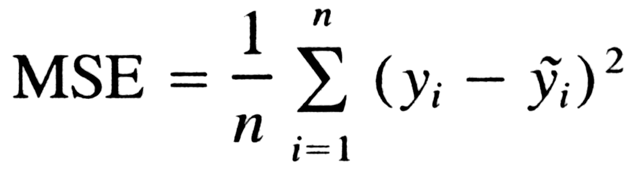

   di mana 𝑦𝑖 adalah nilai aktual dan 𝑦^𝑖 adalah prediksi model.

2. Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE, memberikan nilai yang lebih mudah diinterpretasikan karena berada pada satuan yang sama dengan data asli (misalnya, rating).

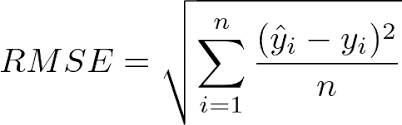

RMSE memberi gambaran tentang seberapa besar kesalahan model dalam skala yang sama dengan data asli. Nilai RMSE yang lebih rendah menunjukkan prediksi yang lebih akurat.

3. Mean Absolute Error (MAE) mengukur rata-rata absolut dari selisih antara nilai prediksi dan nilai aktual. Berbeda dengan MSE, MAE tidak memberikan penalti lebih besar pada kesalahan besar dan lebih mudah dipahami secara intuitif.

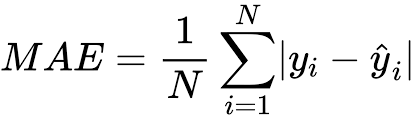

MAE memberikan gambaran tentang seberapa jauh prediksi model dari nilai sebenarnya, tanpa memperbesar kesalahan yang lebih besar seperti pada MSE.


Dari hasil pelatihan model yang ditampilkan, kita bisa melihat beberapa metrik yang terukur pada setiap epoch, baik pada data pelatihan (train) maupun data validasi (validation):
- Loss (MSE) berkurang secara keseluruhan, yang menunjukkan bahwa model semakin baik dalam meminimalkan kesalahan prediksi antara prediksi dan nilai aktual.
- Root Mean Squared Error (RMSE) menunjukkan penurunan dari 0.3158 pada epoch pertama menjadi 0.2803 pada epoch terakhir, yang menandakan bahwa kesalahan prediksi semakin kecil seiring berjalannya waktu.
- Mean Absolute Error (MAE) juga mengalami penurunan yang menunjukkan perbaikan akurasi prediksi, dengan nilai berkurang dari 0.1486 pada epoch pertama menjadi 0.1202 pada epoch terakhir.


Namun, meskipun ada penurunan yang konsisten pada MSE, RMSE, dan MAE, nilai val_loss, val_rmse, dan val_mae relatif stabil, yang menunjukkan bahwa model mulai mengalami overfitting setelah beberapa epoch. Hal ini terlihat pada epoch ke-7 di mana val_loss mulai meningkat meskipun metrik pelatihan terus menurun.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

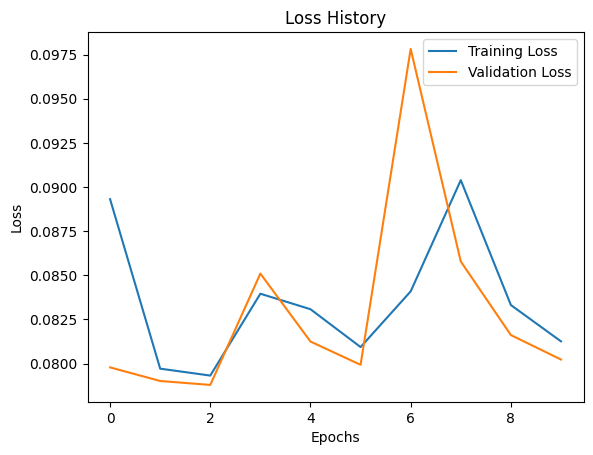

In [210]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

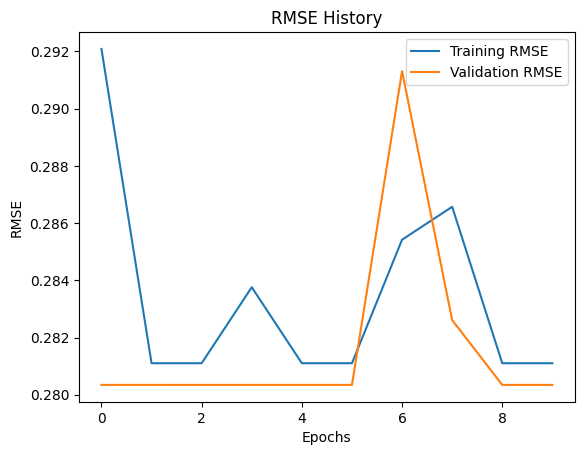

In [211]:
plt.plot(history2.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history2.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('RMSE History')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Conclusion & Result
1. Content-Based Filtering menunjukkan keterbatasan besar dalam relevansi rekomendasi (MAP@40 = 0.0395) meskipun ada beberapa rekomendasi yang baik. Precision dan Recall yang rendah pada sebagian besar resep mengindikasikan bahwa model ini perlu diperbaiki lebih lanjut untuk meningkatkan kualitas rekomendasi secara keseluruhan.

2. Collaborative Filtering, meskipun menunjukkan penurunan yang baik pada MSE, RMSE, dan MAE, juga menunjukkan tanda-tanda overfitting pada data validasi. Hal ini menandakan bahwa meskipun model ini lebih baik dalam hal prediksi akurasi, ia mungkin tidak cukup generalizable tanpa tambahan penyesuaian.

3. Dengan mempertimbangkan penurunan kesalahan prediksi yang lebih signifikan pada Collaborative Filtering, dan meskipun terdapat indikasi overfitting pada data validasi, model CF tetap menunjukkan hasil yang lebih baik dari sisi akurasi prediksi dibandingkan dengan model CBF yang memiliki MAP yang sangat rendah.
- RMSE turun dari 0.3158 pada epoch pertama menjadi 0.2803 pada epoch terakhir.
- MAE berkurang dari 0.1486 menjadi 0.1202.

Namun tentu harus dilakukan perbaikan terhadap Collaborative Filtering dengan penyesuaian parameter untuk mengurangi overfitting, seperti penerapan regularisasi lebih kuat atau early stopping, serta fine-tuning untuk memperbaiki generalizability dan mengoptimalkan performa pada data validasi.